### Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read the dataset

In [2]:
df = pd.read_excel(io='Customer Churn Data.xlsx', sheet_name='Data for DSBA')
df.head(10)

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY           Payment  \
0      20000      1      4        3.0              6.0        Debit Card   
1      20001      1      0        1.0              8.0               UPI   
2      20002      1      0        1.0             30.0        Debit Card   
3      20003      1      0        3.0             15.0        Debit Card   
4      20004      1      0        1.0             12.0       Credit Card   
5      20005      1      0        1.0             22.0        Debit Card   
6      20006      1      2        3.0             11.0  Cash on Delivery   
7      20007      1      0        1.0              6.0       Credit Card   
8      20008      1     13        3.0              9.0          E wallet   
9      20009      1      0        1.0             31.0        Debit Card   

   Gender  Service_Score Account_user_count account_segment  CC_Agent_Score  \
0  Female            3.0                  3           Super             2.0   
1    Male            3.0                  4    Regular Plus             3.0   
2    Male            2.0                  4    Regular Plus             3.0   
3    Male            2.0                  4           Super             5.0   
4    Male            2.0                  3    Regular Plus             5.0   
5  Female            3.0                NaN    Regular Plus             5.0   
6    Male            2.0                  3           Super             2.0   
7    Male            3.0                  3    Regular Plus             2.0   
8    Male            2.0                  4    Regular Plus             3.0   
9    Male            2.0                  5    Regular Plus             3.0   

  Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
0         Single             9          1.0             11   
1         Single             7          1.0             15   
2         Single             6          1.0             14   
3         Single             8          0.0             23   
4         Single             3          0.0             11   
5         Single             2          1.0             22   
6       Divorced             4          0.0             14   
7       Divorced             3          1.0             16   
8       Divorced             2          1.0             14   
9         Single             2          0.0             12   

  coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
0                       1                    5   159.93       Mobile  
1                       0                    0    120.9       Mobile  
2                       0                    3      NaN       Mobile  
3                       0                    3   134.07       Mobile  
4                       1                    3    129.6       Mobile  
5                       4                    7   139.19     Computer  
6                       0                    0   120.86       Mobile  
7                       2                    0   122.93       Mobile  
8                       0                    2   126.83       Mobile  
9                       1                    1   122.93       Mobile

In [3]:
# Checking the shape of the dataset
df.shape

(11260, 19)

In [4]:
# Check Duplicates
dups = df.duplicated().sum()
print('There are {} duplicate rows in the dataset'.format(dups))

There are 0 duplicate rows in the dataset


In [5]:
# Checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [6]:
# Describe the variables
df.describe(include='all')

AccountID         Churn   Tenure     City_Tier  CC_Contacted_LY  \
count   11260.00000  11260.000000  11158.0  11148.000000     11158.000000   
unique          NaN           NaN     38.0           NaN              NaN   
top             NaN           NaN      1.0           NaN              NaN   
freq            NaN           NaN   1351.0           NaN              NaN   
mean    25629.50000      0.168384      NaN      1.653929        17.867091   
std      3250.62635      0.374223      NaN      0.915015         8.853269   
min     20000.00000      0.000000      NaN      1.000000         4.000000   
25%     22814.75000      0.000000      NaN      1.000000        11.000000   
50%     25629.50000      0.000000      NaN      1.000000        16.000000   
75%     28444.25000      0.000000      NaN      3.000000        23.000000   
max     31259.00000      1.000000      NaN      3.000000       132.000000   

           Payment Gender  Service_Score  Account_user_count account_segment  \
count        11151  11152   11162.000000             11148.0           11163   
unique           5      4            NaN                 7.0               7   
top     Debit Card   Male            NaN                 4.0           Super   
freq          4587   6328            NaN              4569.0            4062   
mean           NaN    NaN       2.902526                 NaN             NaN   
std            NaN    NaN       0.725584                 NaN             NaN   
min            NaN    NaN       0.000000                 NaN             NaN   
25%            NaN    NaN       2.000000                 NaN             NaN   
50%            NaN    NaN       3.000000                 NaN             NaN   
75%            NaN    NaN       3.000000                 NaN             NaN   
max            NaN    NaN       5.000000                 NaN             NaN   

        CC_Agent_Score Marital_Status  rev_per_month   Complain_ly  \
count     11144.000000          11048        11158.0  10903.000000   
unique             NaN              3           59.0           NaN   
top                NaN        Married            3.0           NaN   
freq               NaN           5860         1746.0           NaN   
mean          3.066493            NaN            NaN      0.285334   
std           1.379772            NaN            NaN      0.451594   
min           1.000000            NaN            NaN      0.000000   
25%           2.000000            NaN            NaN      0.000000   
50%           3.000000            NaN            NaN      0.000000   
75%           4.000000            NaN            NaN      1.000000   
max           5.000000            NaN            NaN      1.000000   

        rev_growth_yoy  coupon_used_for_payment  Day_Since_CC_connect  \
count          11260.0                  11260.0               10903.0   
unique            20.0                     20.0                  24.0   
top               14.0                      1.0                   3.0   
freq            1524.0                   4373.0                1816.0   
mean               NaN                      NaN                   NaN   
std                NaN                      NaN                   NaN   
min                NaN                      NaN                   NaN   
25%                NaN                      NaN                   NaN   
50%                NaN                      NaN                   NaN   
75%                NaN                      NaN                   NaN   
max                NaN                      NaN                   NaN   

        cashback Login_device  
count   10789.00        11039  
unique   5693.00            3  
top       155.62       Mobile  
freq       10.00         7482  
mean         NaN          NaN  
std          NaN          NaN  
min          NaN          NaN  
25%          NaN          NaN  
50%          NaN          NaN  
75%          NaN          NaN  
max          NaN          NaN

## Cleaning Dataset

### Convert garbage values into NaN

In [7]:
df.replace(to_replace=('#','@','+','$','*','&&&&','&'),value=np.NaN,inplace=True)

### Convert words with same meaning but different spelling

In [8]:
# Clean Gender column
df['Gender'].replace(to_replace=('F','f','female'), value='Female', inplace=True)
df['Gender'].replace(to_replace=('M','m','male'), value='Male', inplace=True)
df['Gender'].value_counts()

Male      6704
Female    4448
Name: Gender, dtype: int64

In [9]:
# Clean account_segment column
df['account_segment'].replace(to_replace=('Regular +'), value='Regular Plus', inplace=True)
df['account_segment'].replace(to_replace=('Super +'), value='Super Plus', inplace=True)
df['account_segment'].value_counts()

Regular Plus    4124
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: account_segment, dtype: int64

### Convert the scale to logical number units

In [10]:
# Assumptions :
# 1. Revenue is given in 'INR'
# 2. Revenue per month can't be INR 1,2,3 etc. Therefore convert the 'rev_growth_yoy' by multiplying it by 10.
df['rev_per_month'] = df['rev_per_month']*100

# 3. Convert Revenue Growth Percentage which is in number format to decimal format.
df['rev_growth_yoy'] = df['rev_growth_yoy']/100

In [11]:
df.head(10)

AccountID  Churn  Tenure  City_Tier  CC_Contacted_LY           Payment  \
0      20000      1     4.0        3.0              6.0        Debit Card   
1      20001      1     0.0        1.0              8.0               UPI   
2      20002      1     0.0        1.0             30.0        Debit Card   
3      20003      1     0.0        3.0             15.0        Debit Card   
4      20004      1     0.0        1.0             12.0       Credit Card   
5      20005      1     0.0        1.0             22.0        Debit Card   
6      20006      1     2.0        3.0             11.0  Cash on Delivery   
7      20007      1     0.0        1.0              6.0       Credit Card   
8      20008      1    13.0        3.0              9.0          E wallet   
9      20009      1     0.0        1.0             31.0        Debit Card   

   Gender  Service_Score  Account_user_count account_segment  CC_Agent_Score  \
0  Female            3.0                 3.0           Super             2.0   
1    Male            3.0                 4.0    Regular Plus             3.0   
2    Male            2.0                 4.0    Regular Plus             3.0   
3    Male            2.0                 4.0           Super             5.0   
4    Male            2.0                 3.0    Regular Plus             5.0   
5  Female            3.0                 NaN    Regular Plus             5.0   
6    Male            2.0                 3.0           Super             2.0   
7    Male            3.0                 3.0    Regular Plus             2.0   
8    Male            2.0                 4.0    Regular Plus             3.0   
9    Male            2.0                 5.0    Regular Plus             3.0   

  Marital_Status  rev_per_month  Complain_ly  rev_growth_yoy  \
0         Single          900.0          1.0            0.11   
1         Single          700.0          1.0            0.15   
2         Single          600.0          1.0            0.14   
3         Single          800.0          0.0            0.23   
4         Single          300.0          0.0            0.11   
5         Single          200.0          1.0            0.22   
6       Divorced          400.0          0.0            0.14   
7       Divorced          300.0          1.0            0.16   
8       Divorced          200.0          1.0            0.14   
9         Single          200.0          0.0            0.12   

   coupon_used_for_payment  Day_Since_CC_connect  cashback Login_device  
0                      1.0                   5.0    159.93       Mobile  
1                      0.0                   0.0    120.90       Mobile  
2                      0.0                   3.0       NaN       Mobile  
3                      0.0                   3.0    134.07       Mobile  
4                      1.0                   3.0    129.60       Mobile  
5                      4.0                   7.0    139.19     Computer  
6                      0.0                   0.0    120.86       Mobile  
7                      2.0                   0.0    122.93       Mobile  
8                      0.0                   2.0    126.83       Mobile  
9                      1.0                   1.0    122.93       Mobile

## Converting the datatypes

In [12]:
# 'object' datatype
df[['AccountID','Service_Score','CC_Agent_Score']] = df[['AccountID','Service_Score','CC_Agent_Score']].astype("object")
# 'category' datatype
df[['City_Tier','Churn','Payment','Gender','Marital_Status','Login_device','Complain_ly']] = df[['City_Tier','Churn','Payment','Gender','Marital_Status','Login_device','Complain_ly']].astype("category")
# 'float' datatype
df[['Tenure','CC_Contacted_LY','rev_per_month','coupon_used_for_payment','Day_Since_CC_connect','cashback','rev_growth_yoy']] = df[['Tenure','CC_Contacted_LY','rev_per_month','coupon_used_for_payment','Day_Since_CC_connect','cashback','rev_growth_yoy']].astype("float")


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   AccountID                11260 non-null  object  
 1   Churn                    11260 non-null  category
 2   Tenure                   11042 non-null  float64 
 3   City_Tier                11148 non-null  category
 4   CC_Contacted_LY          11158 non-null  float64 
 5   Payment                  11151 non-null  category
 6   Gender                   11152 non-null  category
 7   Service_Score            11162 non-null  object  
 8   Account_user_count       10816 non-null  float64 
 9   account_segment          11163 non-null  object  
 10  CC_Agent_Score           11144 non-null  object  
 11  Marital_Status           11048 non-null  category
 12  rev_per_month            10469 non-null  float64 
 13  Complain_ly              10903 non-null  category
 14  rev_gr

In [14]:
df.describe(include='all')

AccountID    Churn        Tenure  City_Tier  CC_Contacted_LY  \
count     11260.0  11260.0  11042.000000    11148.0     11158.000000   
unique    11260.0      2.0           NaN        3.0              NaN   
top       20000.0      0.0           NaN        1.0              NaN   
freq          1.0   9364.0           NaN     7263.0              NaN   
mean          NaN      NaN     11.025086        NaN        17.867091   
std           NaN      NaN     12.879782        NaN         8.853269   
min           NaN      NaN      0.000000        NaN         4.000000   
25%           NaN      NaN      2.000000        NaN        11.000000   
50%           NaN      NaN      9.000000        NaN        16.000000   
75%           NaN      NaN     16.000000        NaN        23.000000   
max           NaN      NaN     99.000000        NaN       132.000000   

           Payment Gender  Service_Score  Account_user_count account_segment  \
count        11151  11152        11162.0        10816.000000           11163   
unique           5      2            6.0                 NaN               5   
top     Debit Card   Male            3.0                 NaN    Regular Plus   
freq          4587   6704         5490.0                 NaN            4124   
mean           NaN    NaN            NaN            3.692862             NaN   
std            NaN    NaN            NaN            1.022976             NaN   
min            NaN    NaN            NaN            1.000000             NaN   
25%            NaN    NaN            NaN            3.000000             NaN   
50%            NaN    NaN            NaN            4.000000             NaN   
75%            NaN    NaN            NaN            4.000000             NaN   
max            NaN    NaN            NaN            6.000000             NaN   

        CC_Agent_Score Marital_Status  rev_per_month  Complain_ly  \
count          11144.0          11048   10469.000000      10903.0   
unique             5.0              3            NaN          2.0   
top                3.0        Married            NaN          0.0   
freq            3360.0           5860            NaN       7792.0   
mean               NaN            NaN     636.259433          NaN   
std                NaN            NaN    1190.968590          NaN   
min                NaN            NaN     100.000000          NaN   
25%                NaN            NaN     300.000000          NaN   
50%                NaN            NaN     500.000000          NaN   
75%                NaN            NaN     700.000000          NaN   
max                NaN            NaN   14000.000000          NaN   

        rev_growth_yoy  coupon_used_for_payment  Day_Since_CC_connect  \
count     11257.000000             11257.000000          10902.000000   
unique             NaN                      NaN                   NaN   
top                NaN                      NaN                   NaN   
freq               NaN                      NaN                   NaN   
mean          0.161934                 1.790619              4.633187   
std           0.037577                 1.969551              3.697637   
min           0.040000                 0.000000              0.000000   
25%           0.130000                 1.000000              2.000000   
50%           0.150000                 1.000000              3.000000   
75%           0.190000                 2.000000              8.000000   
max           0.280000                16.000000             47.000000   

            cashback Login_device  
count   10787.000000        10500  
unique           NaN            2  
top              NaN       Mobile  
freq             NaN         7482  
mean      196.236370          NaN  
std       178.660514          NaN  
min         0.000000          NaN  
25%       147.210000          NaN  
50%       165.250000          NaN  
75%       200.010000          NaN  
max      1997.000000          NaN

In [15]:
list_of_num_var = ['Tenure','CC_Contacted_LY','Account_user_count','rev_per_month','rev_growth_yoy','coupon_used_for_payment','Day_Since_CC_connect','cashback']

### Univariate Analysis before Missing Value Treatment

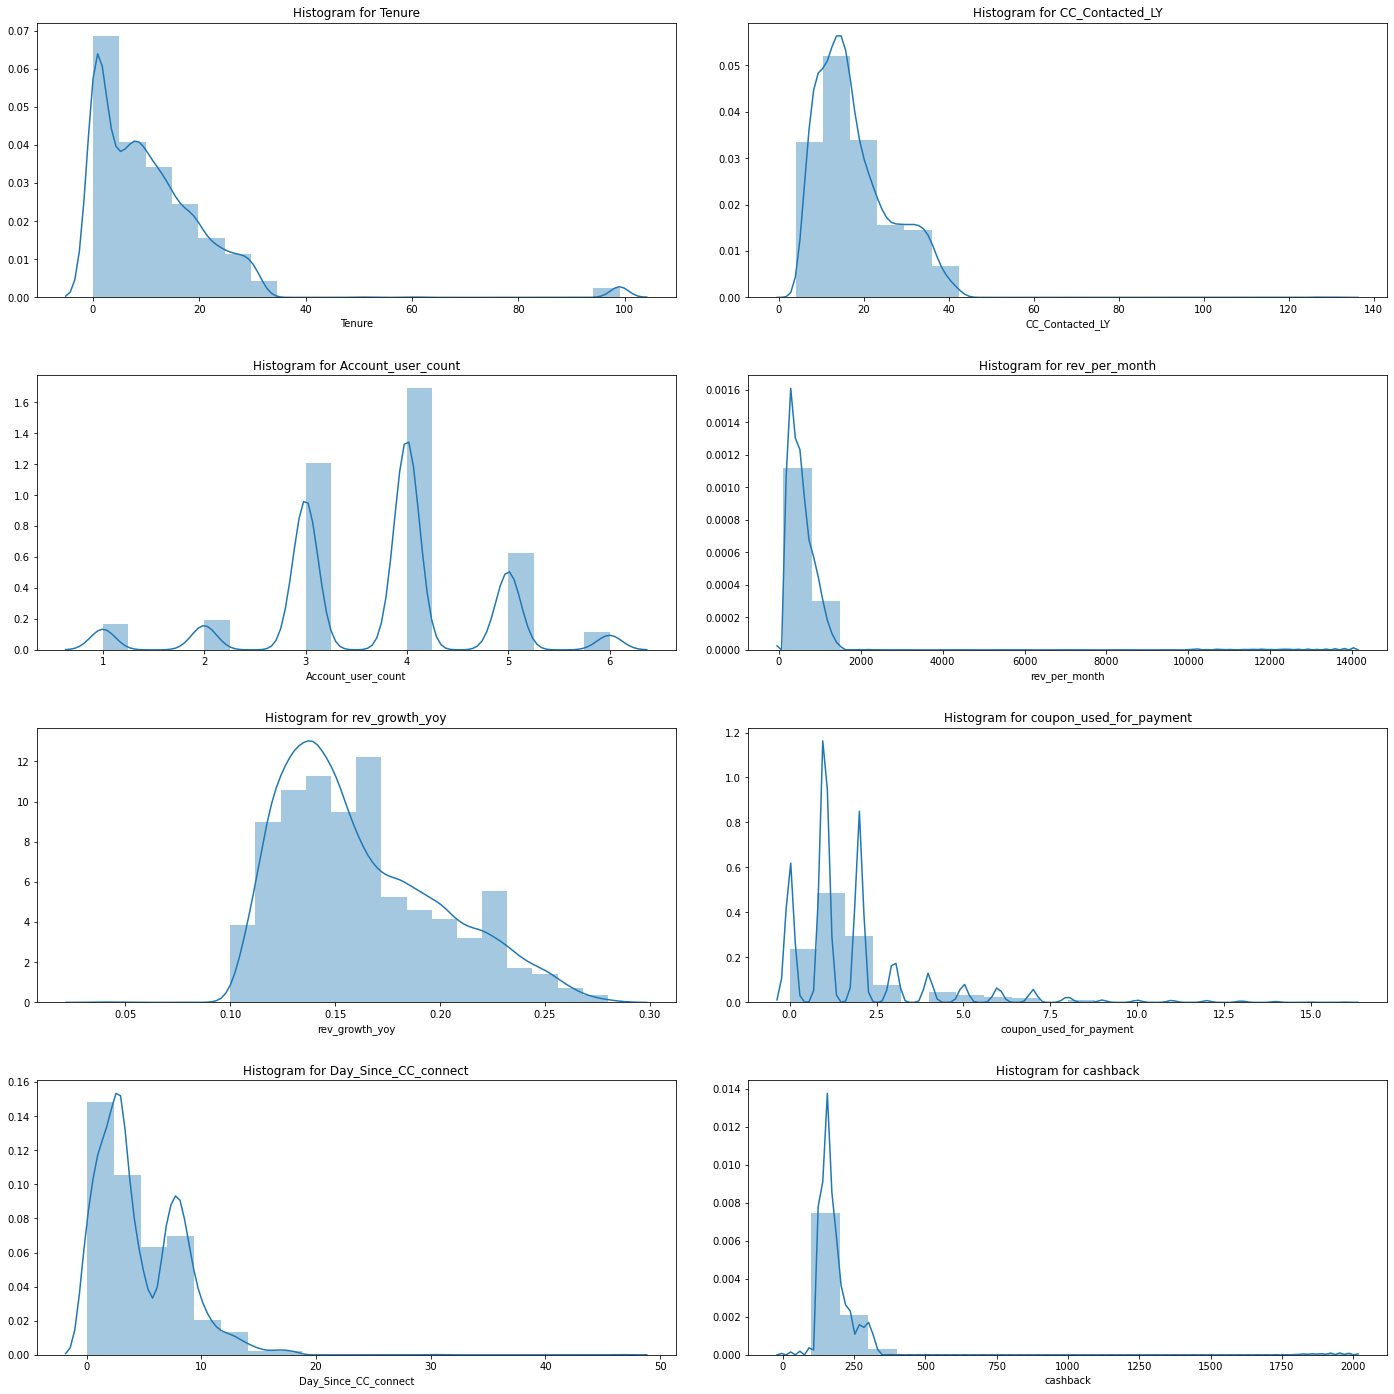

In [16]:
# Plot Histograms
plt.figure(figsize=(20,20))
for i in range(len(list_of_num_var)):
    plt.subplot(4,2,i+1)
    sns.distplot(df[list_of_num_var[i]],bins=20)
    plt.title('Histogram for {}'.format(list_of_num_var[i]))
    plt.tight_layout(pad=3)

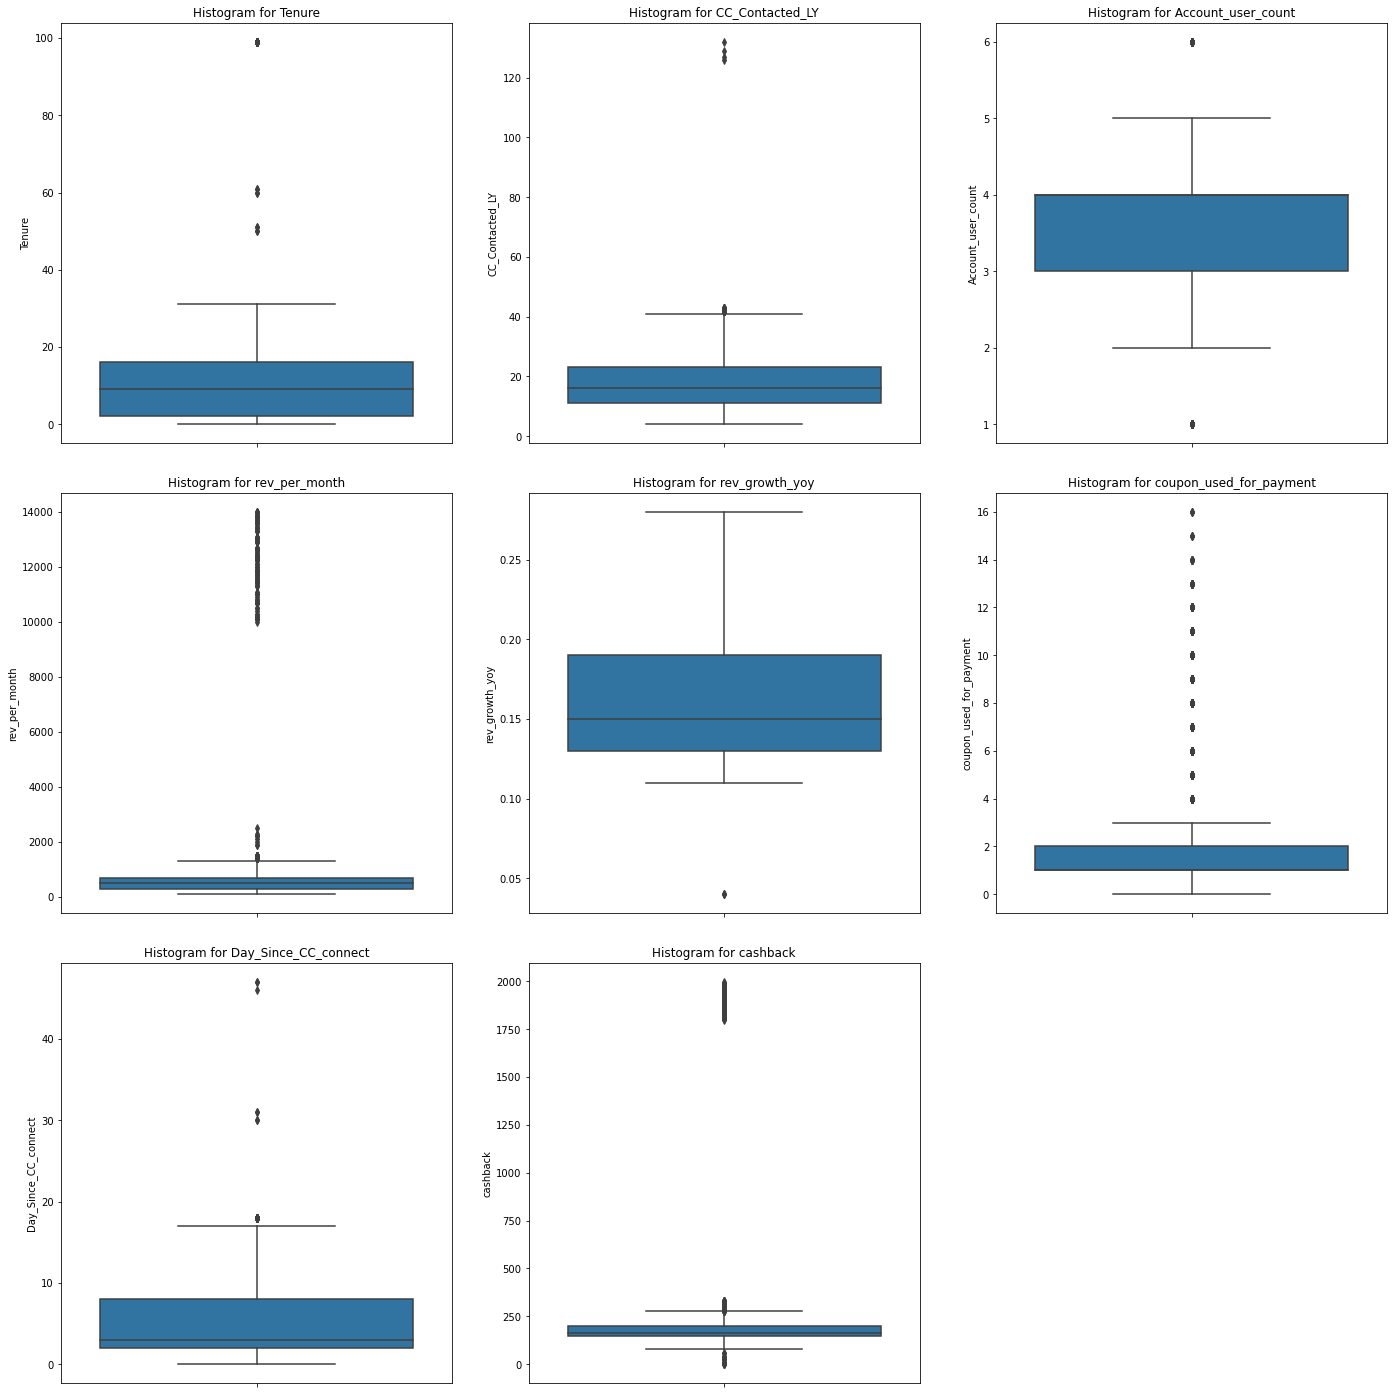

In [17]:
# Plot Boxplot
plt.figure(figsize=(20,20))
for i in range(len(list_of_num_var)):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=df[list_of_num_var[i]])
    plt.title('Histogram for {}'.format(list_of_num_var[i]))
    plt.tight_layout(pad=3)

## Checking on Target Variable

In [18]:
df['Churn'].value_counts()

0    9364
1    1896
Name: Churn, dtype: int64

In [19]:
df['Churn'].value_counts(1)

0    0.831616
1    0.168384
Name: Churn, dtype: float64

## Missing Value Treatment

In [20]:
df.isna().sum().sort_values(ascending=False)

rev_per_month              791
Login_device               760
cashback                   473
Account_user_count         444
Day_Since_CC_connect       358
Complain_ly                357
Tenure                     218
Marital_Status             212
CC_Agent_Score             116
City_Tier                  112
Payment                    109
Gender                     108
CC_Contacted_LY            102
Service_Score               98
account_segment             97
coupon_used_for_payment      3
rev_growth_yoy               3
Churn                        0
AccountID                    0
dtype: int64

In [21]:
df.isna().sum().sum()

4361

In [22]:
total_values= (df.shape[0]) * (df.shape[1])
print(total_values)

213940


In [23]:
per_NaN_val = ((df.isna().sum().sum())/total_values)*100
per_NaN_val

2.0384219874731233

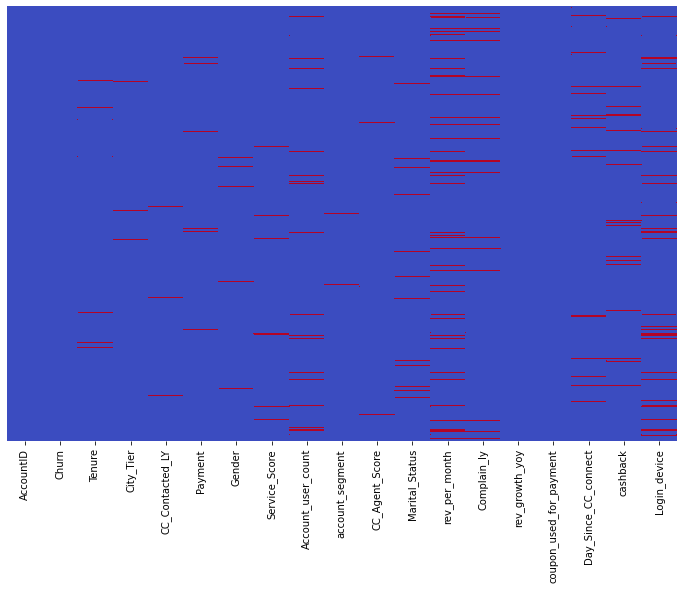

In [24]:
### Let's visualize the NaN/missing values
plt.figure(figsize = (12,8))
sns.heatmap(df.isna(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

## Impute the Missing Values

### Impute the Object/Categorical Values

In [25]:
# Define a function to retrieve count of levels within each category
def value_counts_before_imp(i):
    print(df[i].value_counts())

In [26]:
def value_counts_1_before_imp(i):
    print(df[i].value_counts(1))

In [27]:
#Object/Categorical Variables
list_of_cat_var = ['Login_device','Complain_ly','Marital_Status','CC_Agent_Score','City_Tier','Payment','Gender','Service_Score','account_segment']

In [28]:
# Displaying Value counts in nos. & percentage decimal format for each of the categorical variables before treating missing values
for cat_var in list_of_cat_var:
    print('>>',cat_var)
    print('Value Counts')
    print('')
    value_counts_before_imp(cat_var)
    print('')
    print('-'*80)
    print('Value Counts in percentage decimal')
    print('')
    value_counts_1_before_imp(cat_var)
    print('')
    print('*'*80)

>> Login_device
Value Counts

Mobile      7482
Computer    3018
Name: Login_device, dtype: int64

--------------------------------------------------------------------------------
Value Counts in percentage decimal

Mobile      0.712571
Computer    0.287429
Name: Login_device, dtype: float64

********************************************************************************
>> Complain_ly
Value Counts

0.0    7792
1.0    3111
Name: Complain_ly, dtype: int64

--------------------------------------------------------------------------------
Value Counts in percentage decimal

0.0    0.714666
1.0    0.285334
Name: Complain_ly, dtype: float64

********************************************************************************
>> Marital_Status
Value Counts

Married     5860
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64

--------------------------------------------------------------------------------
Value Counts in percentage decimal

Married     0.530413
Single      0.3186

In [29]:
df_imp_cat=df.copy()

In [30]:
# Login_device - imputation with most frequent occurances
df_imp_cat['Login_device'] = df_imp_cat['Login_device'].fillna('Mobile')

# Complain_ly - - imputation with most frequent occurances
df_imp_cat['Complain_ly'] = df_imp_cat['Complain_ly'].fillna(0.0)

# Marital_Status - imputation with most frequent occurances
df_imp_cat['Marital_Status'] = df_imp_cat['Marital_Status'].fillna('Married')

# CC_Agent_Score - imputation with most frequent occurances
df_imp_cat['CC_Agent_Score'] = df_imp_cat['CC_Agent_Score'].fillna(3.0)

# City_Tier - imputation with most frequent occurances
df_imp_cat['City_Tier'] = df_imp_cat['City_Tier'].fillna(1.0)

# Payment - imputation with most frequent occurances
df_imp_cat['Payment'] = df_imp_cat['Payment'].fillna('Debit Card')

# Gender - imputation with most frequent occurances
df_imp_cat['Gender'] = df_imp_cat['Gender'].fillna('Male')

# Service_Score - imputation with most frequent occurances
df_imp_cat['Service_Score'] = df_imp_cat['Service_Score'].fillna(3.0)

# account_segment - imputation with most frequent occurances
df_imp_cat['account_segment'] = df_imp_cat['account_segment'].fillna('Regular Plus')

In [31]:
# Define a function to retrieve count of levels within each category
def value_counts_after_imp(i):
    print(df_imp_cat[i].value_counts())

In [32]:
# Define a function to retrieve count of levels within each category
def value_counts_1_after_imp(i):
    print(df_imp_cat[i].value_counts(1))

In [33]:
# Displaying Value counts in nos. & percentage decimal format for each of the categorical variables after treating missing values
for cat_var in list_of_cat_var:
    print('>>',cat_var)
    print('Value Counts after treatment')
    print('')
    value_counts_after_imp(cat_var)
    print('')
    print('-'*80)
    print('Value Counts in percentage decimal after treatment')
    print('')
    value_counts_1_after_imp(cat_var)
    print('')
    print('*'*80)

>> Login_device
Value Counts after treatment

Mobile      8242
Computer    3018
Name: Login_device, dtype: int64

--------------------------------------------------------------------------------
Value Counts in percentage decimal after treatment

Mobile      0.731972
Computer    0.268028
Name: Login_device, dtype: float64

********************************************************************************
>> Complain_ly
Value Counts after treatment

0.0    8149
1.0    3111
Name: Complain_ly, dtype: int64

--------------------------------------------------------------------------------
Value Counts in percentage decimal after treatment

0.0    0.723712
1.0    0.276288
Name: Complain_ly, dtype: float64

********************************************************************************
>> Marital_Status
Value Counts after treatment

Married     6072
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64

----------------------------------------------------------------------------

### Impute the Numerical Values

In [34]:
df_imp_num= df.copy()

In [35]:
from sklearn.impute import KNNImputer #MICE FancyImpute
imputer = KNNImputer(n_neighbors=20)
df_imp_num[list_of_num_var] = pd.DataFrame(imputer.fit_transform(df_imp_num[list_of_num_var]), columns = list_of_num_var)

In [36]:
df_imp_num.head(10)

AccountID Churn  Tenure City_Tier  CC_Contacted_LY           Payment  \
0     20000     1     4.0       3.0              6.0        Debit Card   
1     20001     1     0.0       1.0              8.0               UPI   
2     20002     1     0.0       1.0             30.0        Debit Card   
3     20003     1     0.0       3.0             15.0        Debit Card   
4     20004     1     0.0       1.0             12.0       Credit Card   
5     20005     1     0.0       1.0             22.0        Debit Card   
6     20006     1     2.0       3.0             11.0  Cash on Delivery   
7     20007     1     0.0       1.0              6.0       Credit Card   
8     20008     1    13.0       3.0              9.0          E wallet   
9     20009     1     0.0       1.0             31.0        Debit Card   

   Gender Service_Score  Account_user_count account_segment CC_Agent_Score  \
0  Female           3.0                 3.0           Super            2.0   
1    Male           3.0                 4.0    Regular Plus            3.0   
2    Male           2.0                 4.0    Regular Plus            3.0   
3    Male           2.0                 4.0           Super            5.0   
4    Male           2.0                 3.0    Regular Plus            5.0   
5  Female           3.0                 3.6    Regular Plus            5.0   
6    Male           2.0                 3.0           Super            2.0   
7    Male           3.0                 3.0    Regular Plus            2.0   
8    Male           2.0                 4.0    Regular Plus            3.0   
9    Male           2.0                 5.0    Regular Plus            3.0   

  Marital_Status  rev_per_month Complain_ly  rev_growth_yoy  \
0         Single          900.0         1.0            0.11   
1         Single          700.0         1.0            0.15   
2         Single          600.0         1.0            0.14   
3         Single          800.0         0.0            0.23   
4         Single          300.0         0.0            0.11   
5         Single          200.0         1.0            0.22   
6       Divorced          400.0         0.0            0.14   
7       Divorced          300.0         1.0            0.16   
8       Divorced          200.0         1.0            0.14   
9         Single          200.0         0.0            0.12   

   coupon_used_for_payment  Day_Since_CC_connect  cashback Login_device  
0                      1.0                   5.0   159.930       Mobile  
1                      0.0                   0.0   120.900       Mobile  
2                      0.0                   3.0   146.103       Mobile  
3                      0.0                   3.0   134.070       Mobile  
4                      1.0                   3.0   129.600       Mobile  
5                      4.0                   7.0   139.190     Computer  
6                      0.0                   0.0   120.860       Mobile  
7                      2.0                   0.0   122.930       Mobile  
8                      0.0                   2.0   126.830       Mobile  
9                      1.0                   1.0   122.930       Mobile

In [37]:
df_imp_num.isna().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                  112
CC_Contacted_LY              0
Payment                    109
Gender                     108
Service_Score               98
Account_user_count           0
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month                0
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect         0
cashback                     0
Login_device               760
dtype: int64

In [38]:
df_final = df_imp_num.copy()

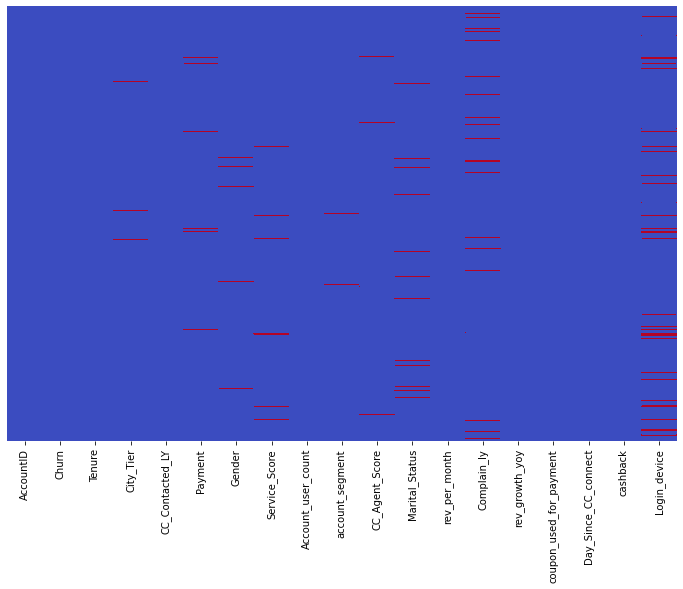

In [39]:
### Let's visualize the data set now
plt.figure(figsize = (12,8))
sns.heatmap(df_final.isna(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

# There seems to be no missing values in the dataset

### Outlier Treatment

In [40]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [41]:
list_of_num_var = ['Tenure','CC_Contacted_LY','Account_user_count','rev_per_month','rev_growth_yoy','coupon_used_for_payment','Day_Since_CC_connect','cashback']

In [42]:
for column in df_final[list_of_num_var].columns:
    lr,ur=remove_outlier(df_final[column])
    df_final[column]=np.where(df_final[column]>ur,ur,df_final[column])
    df_final[column]=np.where(df_final[column]<lr,lr,df_final[column])

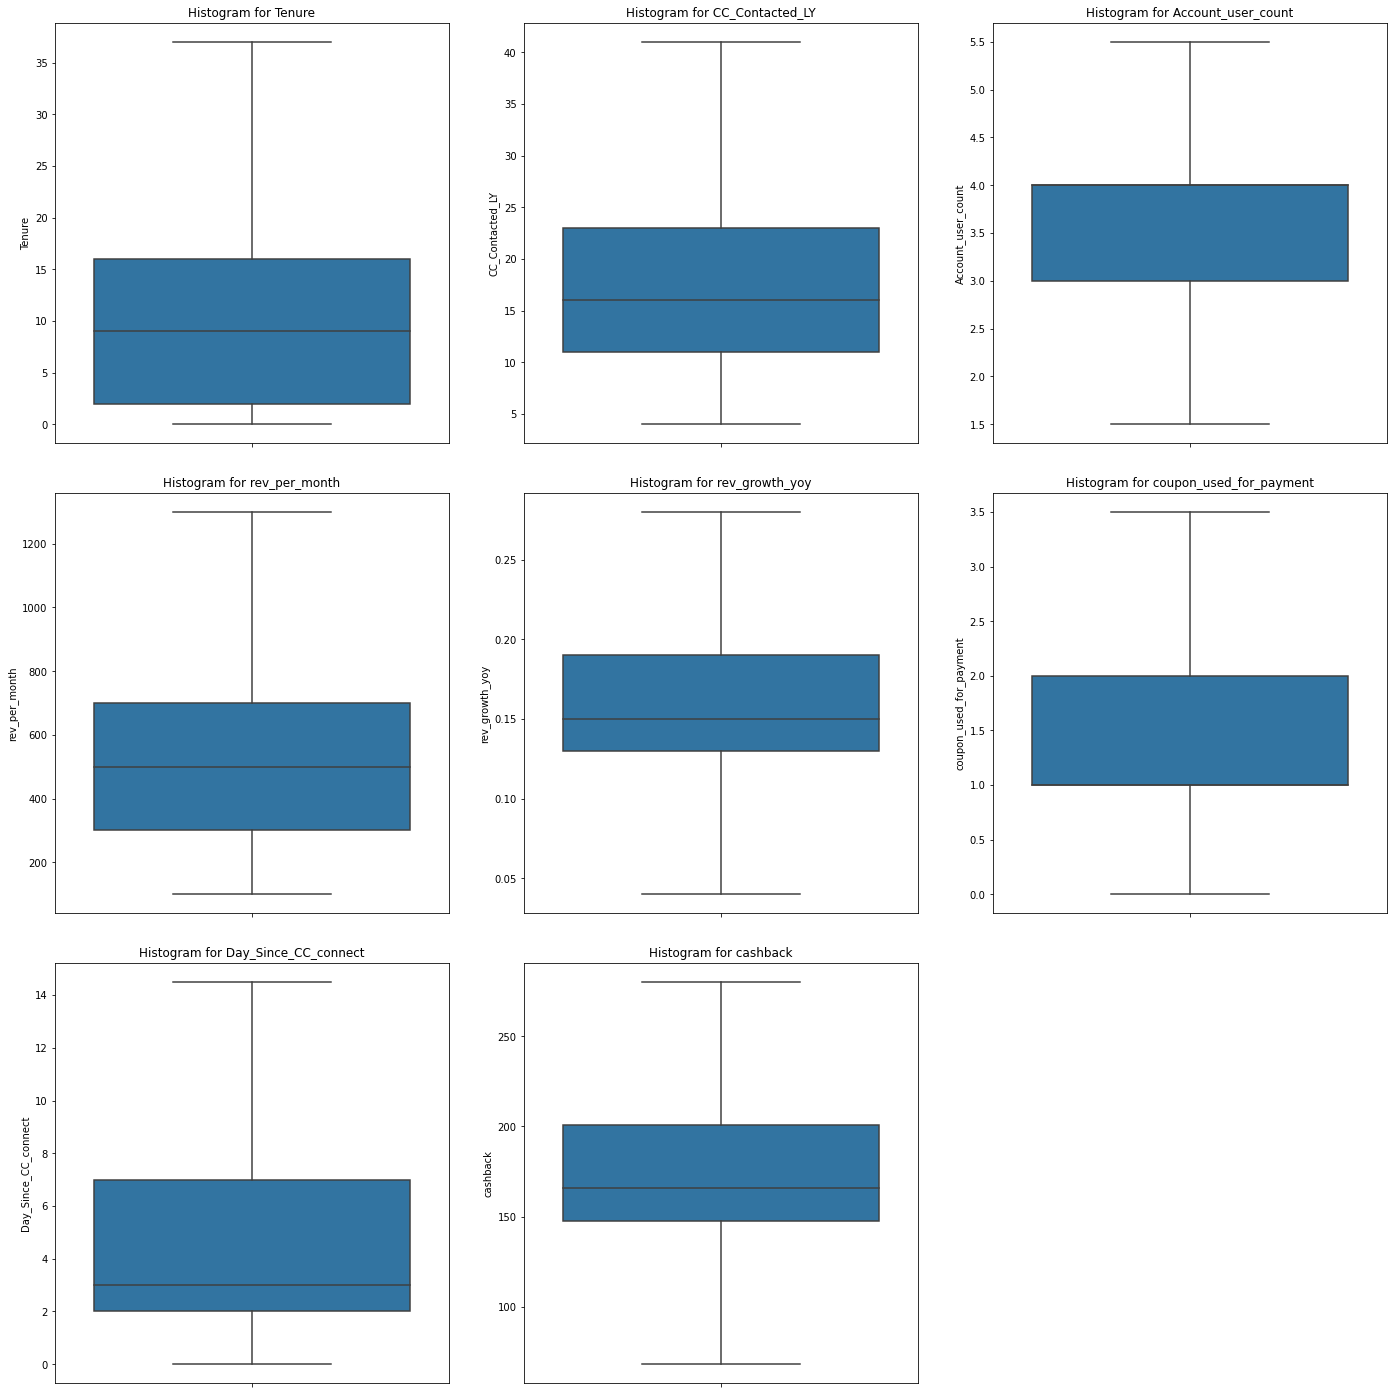

In [43]:
# Plot Boxplot
plt.figure(figsize=(20,20))
for i in range(len(list_of_num_var)):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=df_final[list_of_num_var[i]])
    plt.title('Histogram for {}'.format(list_of_num_var[i]))
    plt.tight_layout(pad=3)

In [44]:
# To address the data skewness, we shall be performing

## Univariate Analysis after treating missing values and outliers

### Categorical Variable

#### Count Plots

In [45]:
plt.figure(figsize=(20,15))
for i in range(len(list_of_cat_var)):
    plt.subplot(3,3,i+1)
    sns.countplot(df_final[list_of_cat_var[i]])
    plt.title('Countplot for {}'.format(list_of_cat_var[i]))
    plt.tight_layout(pad=3)

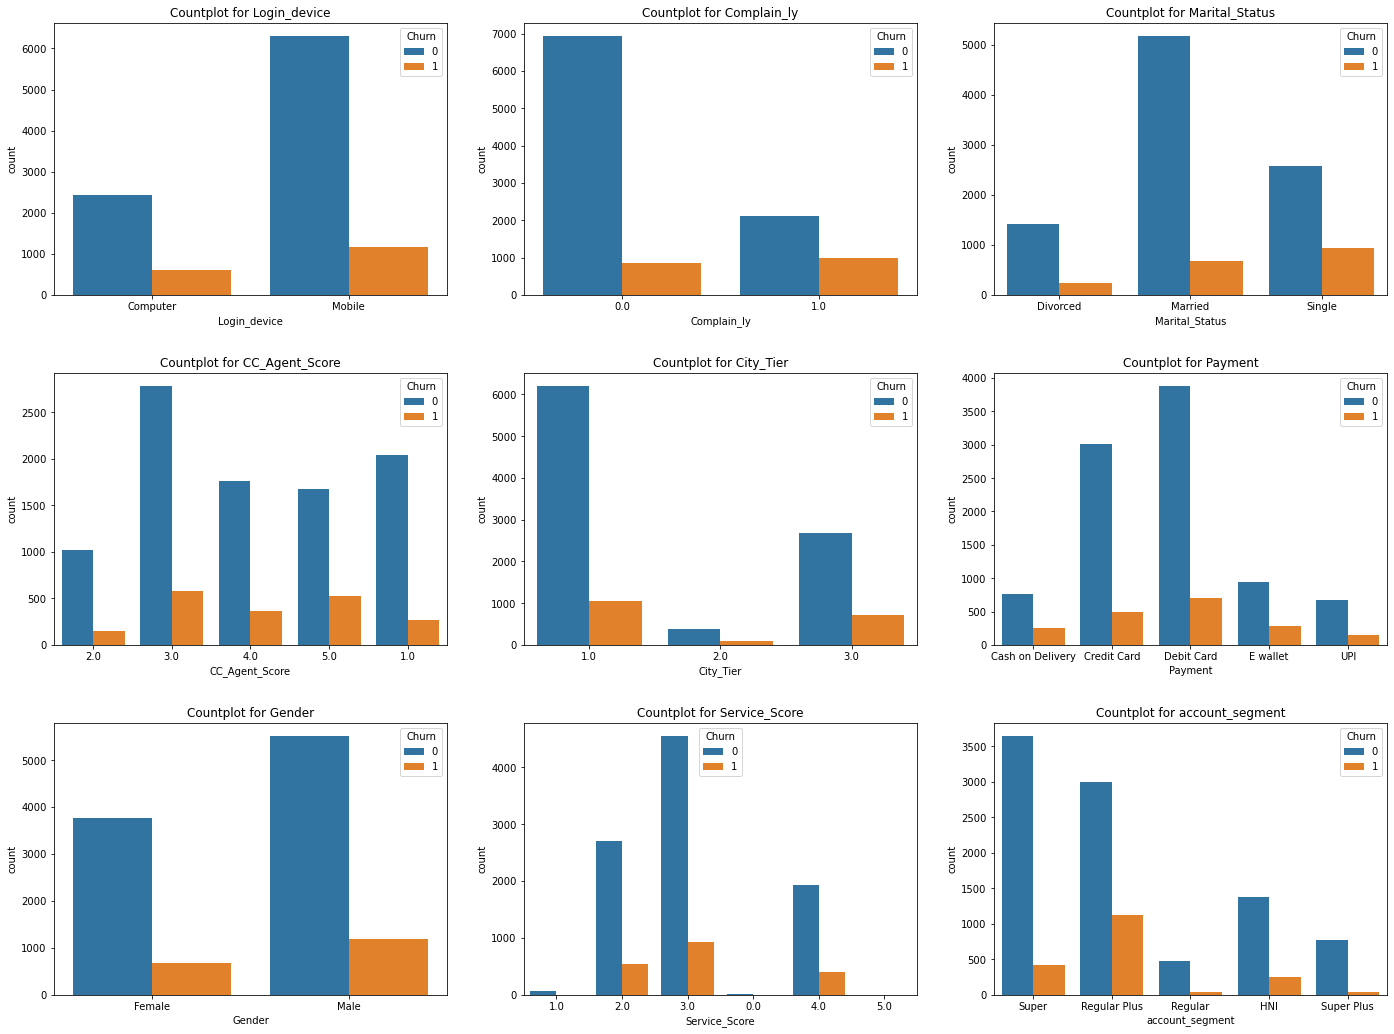

In [46]:
plt.figure(figsize=(20,15))
for i in range(len(list_of_cat_var)):
    plt.subplot(3,3,i+1)
    sns.countplot(df_final[list_of_cat_var[i]],hue=df_final['Churn'])
    plt.title('Countplot for {}'.format(list_of_cat_var[i]))
    plt.tight_layout(pad=3)

### Numerical Variables

#### Histograms

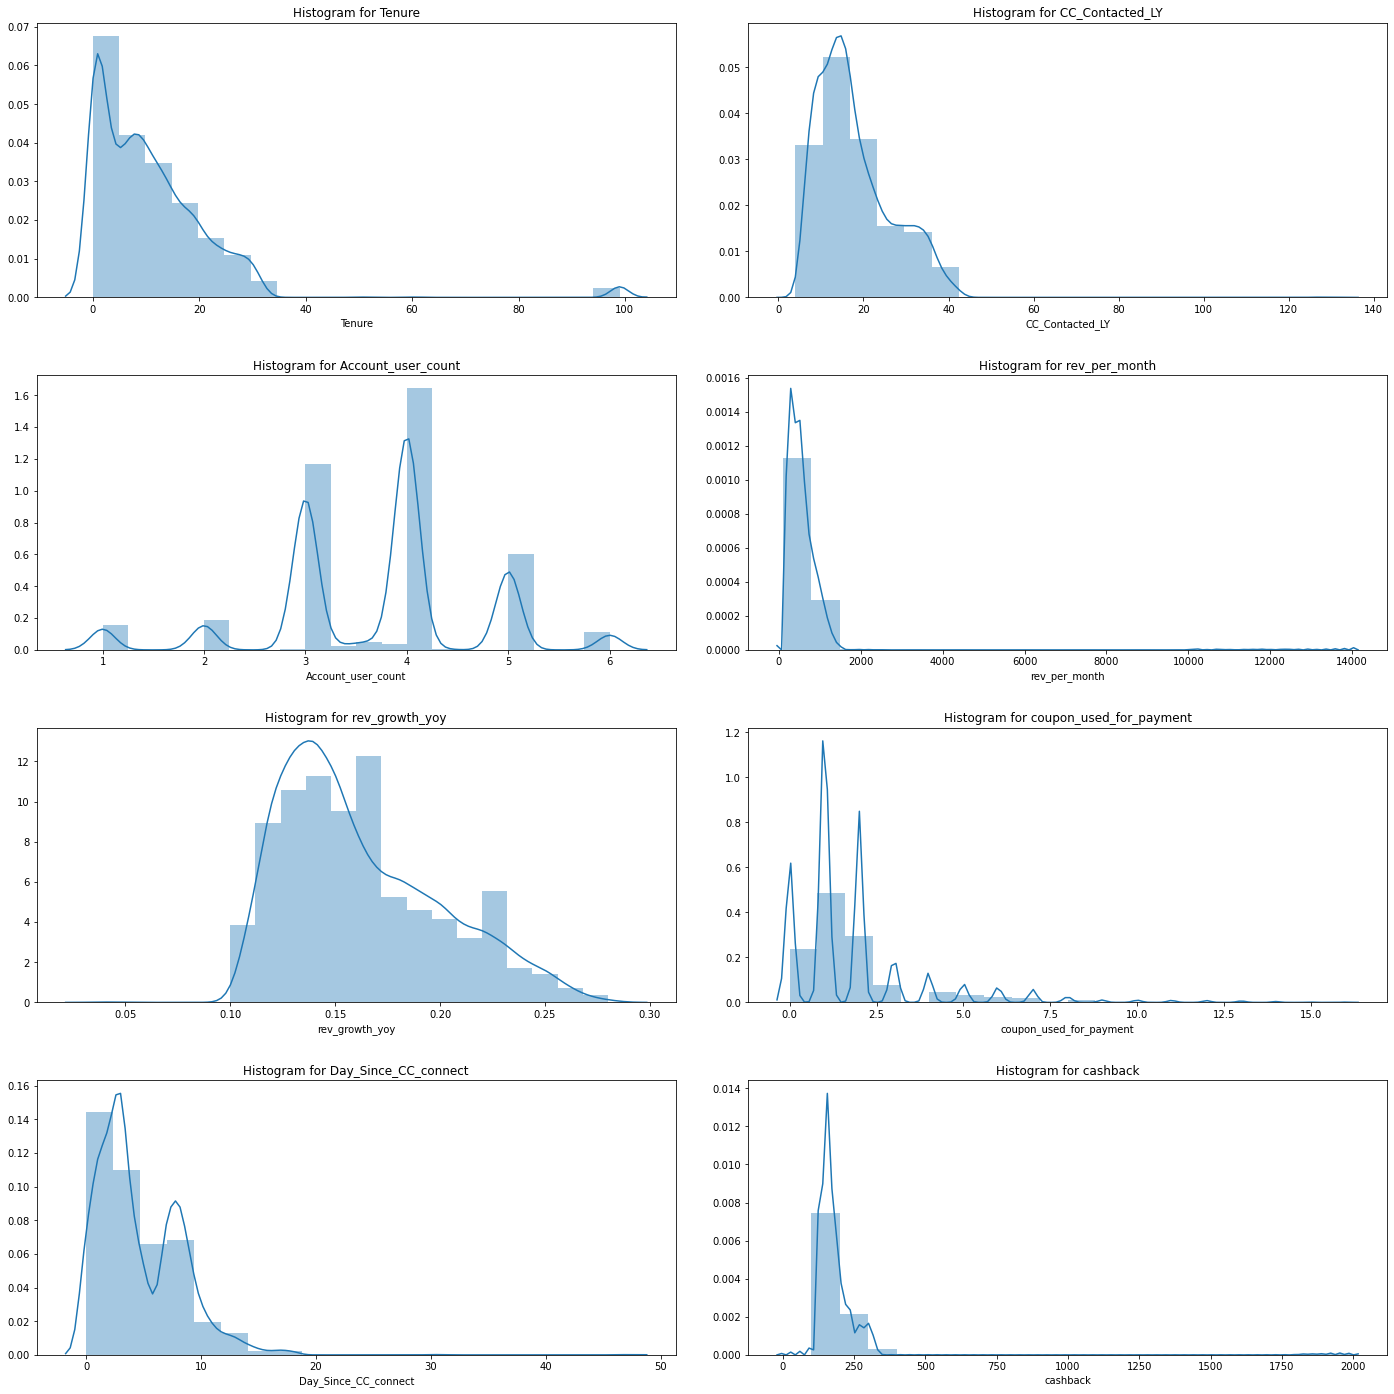

In [47]:
# Plot Histograms
plt.figure(figsize=(20,20))
for i in range(len(list_of_num_var)):
    plt.subplot(4,2,i+1)
    sns.distplot(df_imp_num[list_of_num_var[i]],bins=20)
    plt.title('Histogram for {}'.format(list_of_num_var[i]))
    plt.tight_layout(pad=3)

#### Boxplots

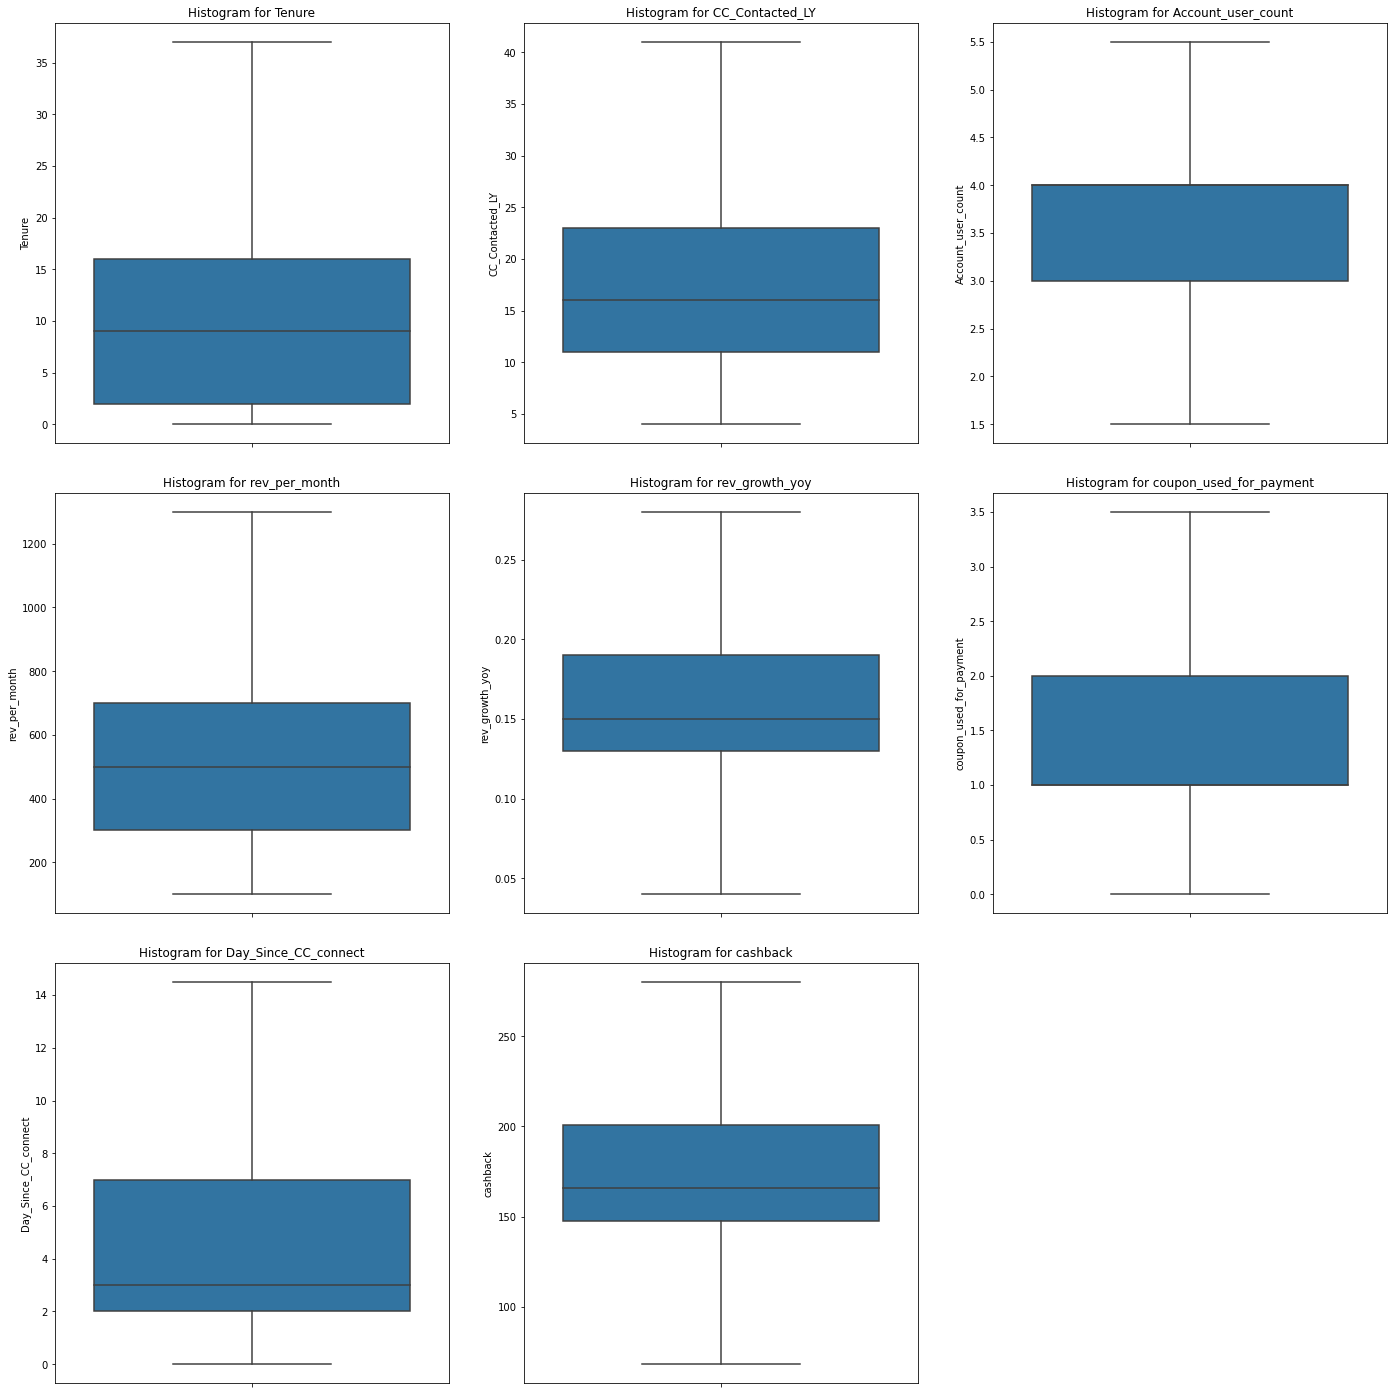

In [48]:
# Plot Boxplot
plt.figure(figsize=(20,20))
for i in range(len(list_of_num_var)):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=df_final[list_of_num_var[i]])
    plt.title('Histogram for {}'.format(list_of_num_var[i]))
    plt.tight_layout(pad=3)

## Bivariate Analysis after treating missing values and outliers

#### Bar Plots

In [49]:
plt.figure(figsize=(20,20))

plt.subplot(4,3,1)
plt.title('Churn VS Revenue per Month')
sns.barplot(df_final['Churn'],df_final['rev_per_month'], ci=False, estimator=np.mean);

plt.subplot(4,3,2)
plt.title('Login Device VS Revenue per Month')
sns.barplot(df_final['Login_device'],df_final['rev_per_month'],hue=df_final['Churn'], ci=False, estimator=np.mean);

plt.subplot(4,3,3)
plt.title('Marital Status VS Revenue per Month')
sns.barplot(df_final['Marital_Status'],df_final['rev_per_month'],hue=df_final['Churn'], ci=False, estimator=np.mean);

plt.subplot(4,3,4)
plt.title('CC Agent Score VS Revenue per Month')
sns.barplot(df_final['CC_Agent_Score'],df_final['rev_per_month'],hue=df_final['Churn'], ci=False, estimator=np.mean);

plt.subplot(4,3,5)
plt.title('City Tier VS Revenue per Month')
sns.barplot(df_final['City_Tier'],df_final['rev_per_month'],hue=df_final['Churn'], ci=False, estimator=np.mean);

plt.subplot(4,3,6)
plt.title('Payment VS Revenue per Month')
sns.barplot(df_final['Payment'],df_final['rev_per_month'],hue=df_final['Churn'], ci=False, estimator=np.mean);

plt.subplot(4,3,7)
plt.title('Gender VS Revenue per Month')
sns.barplot(df_final['Gender'],df_final['rev_per_month'],hue=df_final['Churn'], ci=False, estimator=np.mean);

plt.subplot(4,3,8)
plt.title('Service Score VS Revenue per Month')
sns.barplot(df_final['Service_Score'],df_final['rev_per_month'],hue=df_final['Churn'], ci=False, estimator=np.mean);

plt.subplot(4,3,9)
plt.title('Account Segment VS Revenue per Month')
sns.barplot(df_final['account_segment'],df_final['rev_per_month'],hue=df_final['Churn'], ci=False, estimator=np.mean);

plt.tight_layout(pad=3)

#### Scatter Plots

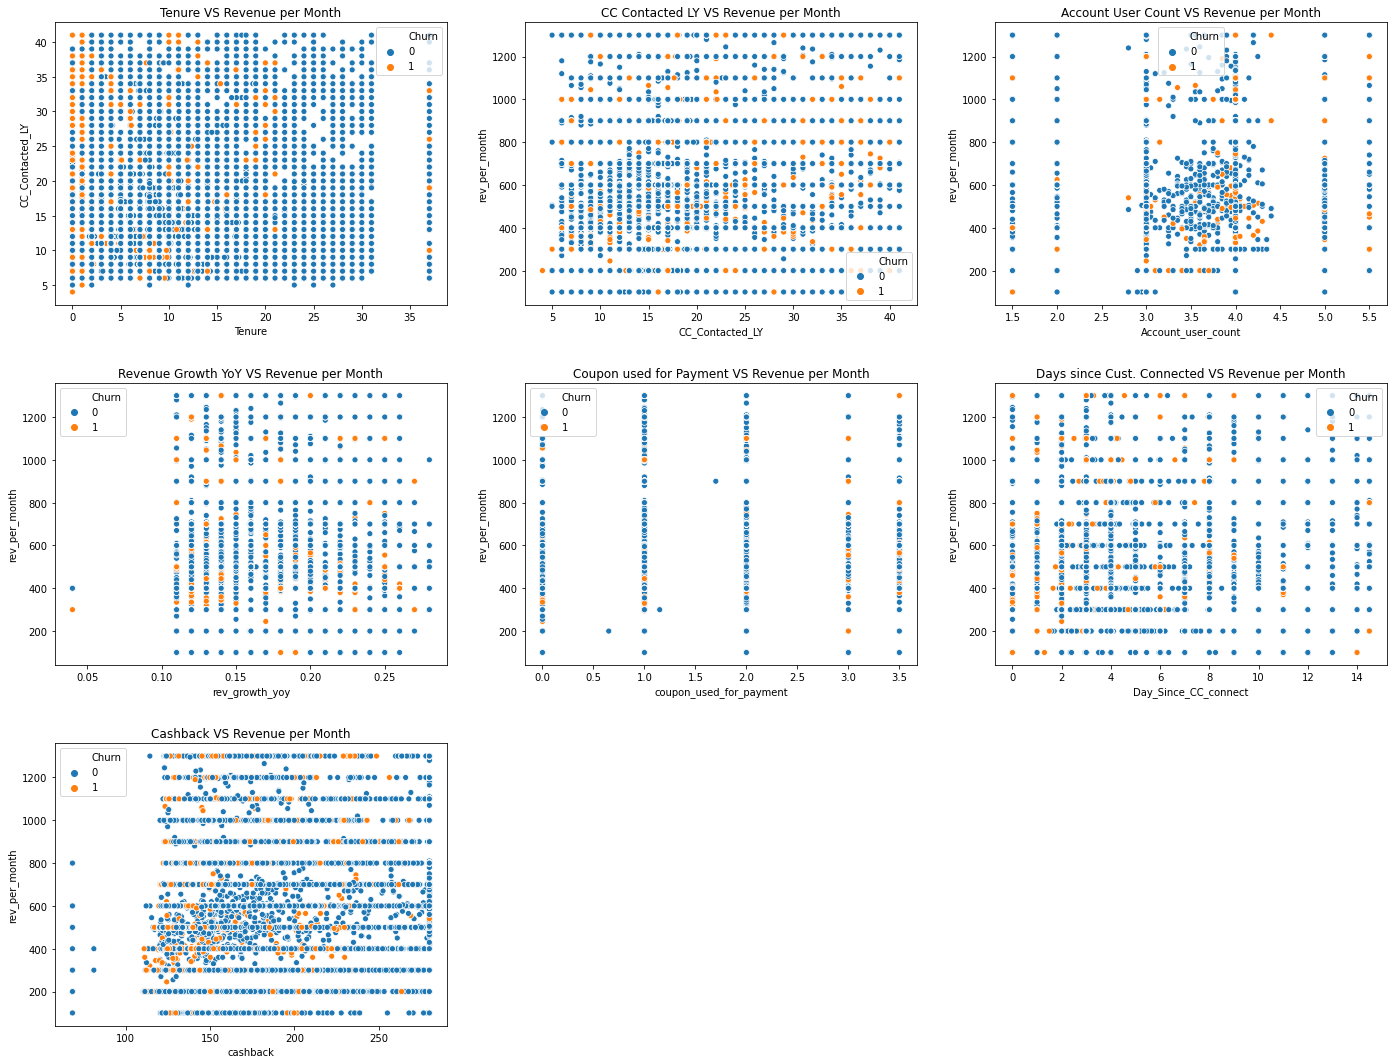

In [50]:
plt.figure(figsize=(20,20))

plt.subplot(4,3,1)
plt.title('Tenure VS Revenue per Month')
sns.scatterplot(df_final['Tenure'],df_final['CC_Contacted_LY'], hue=df_final['Churn'], ci=False, estimator=np.mean);

plt.subplot(4,3,2)
plt.title('CC Contacted LY VS Revenue per Month')
sns.scatterplot(df_final['CC_Contacted_LY'],df_final['rev_per_month'],hue=df_final['Churn'], ci=False, estimator=np.mean);

plt.subplot(4,3,3)
plt.title('Account User Count VS Revenue per Month')
sns.scatterplot(df_final['Account_user_count'],df_final['rev_per_month'],hue=df_final['Churn'], ci=False, estimator=np.mean);

plt.subplot(4,3,4)
plt.title('Revenue Growth YoY VS Revenue per Month')
sns.scatterplot(df_final['rev_growth_yoy'],df_final['rev_per_month'],hue=df_final['Churn'], ci=False, estimator=np.mean);

plt.subplot(4,3,5)
plt.title('Coupon used for Payment VS Revenue per Month')
sns.scatterplot(df_final['coupon_used_for_payment'],df_final['rev_per_month'],hue=df_final['Churn'], ci=False, estimator=np.mean);

plt.subplot(4,3,6)
plt.title('Days since Cust. Connected VS Revenue per Month')
sns.scatterplot(df_final['Day_Since_CC_connect'],df_final['rev_per_month'],hue=df_final['Churn'], ci=False, estimator=np.mean);

plt.subplot(4,3,7)
plt.title('Cashback VS Revenue per Month')
sns.scatterplot(df_final['cashback'],df_final['rev_per_month'],hue=df_final['Churn'], ci=False, estimator=np.mean);


plt.tight_layout(pad=3)

## Multivariate Analysis after treating missing values and outliers

#### Pair Plot

In [51]:
sns.pairplot(df_final, hue='Churn')

#### Heat Map

In [52]:
plt.figure(figsize=(15,10))
sns.heatmap(df_final[list_of_num_var].corr(), annot=True, mask=np.triu(np.ones_like(df_final[list_of_num_var].corr())));

## Clustering - Form the Clusters using numeric variables

#### Scale the data

In [53]:
# Make a copy of dataset
df_cluster = df_final[list_of_num_var].copy()

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
x=StandardScaler()

In [56]:
scaled_array = x.fit_transform(df_cluster)

In [57]:
column_names= df_cluster.columns

In [58]:
scaled_df_cluster = pd.DataFrame(scaled_array, columns=column_names)
scaled_df_cluster

Tenure  CC_Contacted_LY  Account_user_count  rev_per_month  \
0     -0.702852        -1.380893           -0.754251       1.252885   
1     -1.152179        -1.147378            0.327250       0.572906   
2     -1.152179         1.421290            0.327250       0.232917   
3     -1.152179        -0.330074            0.327250       0.912896   
4     -1.152179        -0.680347           -0.754251      -0.787051   
...         ...              ...                 ...            ...   
11255 -0.028862         1.888321           -1.835753       1.252885   
11256  0.308134         0.136956            1.408752       0.572906   
11257 -1.039848        -0.446832           -1.835753       0.572906   
11258  1.431452        -0.797105            1.408752       0.572906   
11259 -0.253525         0.487229           -1.835753      -0.107073   

       rev_growth_yoy  coupon_used_for_payment  Day_Since_CC_connect  cashback  
0           -1.382293                -0.431276              0.117578 -0.414524  
1           -0.317630                -1.338548             -1.314145 -1.268110  
2           -0.583796                -1.338548             -0.455111 -0.716920  
3            1.811697                -1.338548             -0.455111 -0.980082  
4           -1.382293                -0.431276             -0.455111 -1.077841  
...               ...                      ...                   ...       ...  
11255        0.747034                -0.431276             -0.168767 -0.550555  
11256       -0.051464                -0.431276              0.976612  1.050329  
11257        1.545531                -0.431276             -0.168767  0.274163  
11258       -0.051464                 0.475995              1.262956  0.022220  
11259       -0.849961                 0.475995             -0.455111 -0.084068  

[11260 rows x 8 columns]

#### Perform the K-means clustering

In [59]:
from sklearn.cluster import KMeans

In [60]:
# Calculating the WSS against each cluster numbers
wss=[]

In [61]:
for i in range(1,15):
    KM = KMeans(n_clusters=i,random_state=0)
    KM.fit(scaled_df_cluster)
    wss.append(KM.inertia_)

In [62]:
wss

[90079.99999999997,
 75345.28543592712,
 68631.23082599315,
 63613.7297036564,
 59716.72897946902,
 56386.29216770697,
 53695.98374920913,
 51290.191663617086,
 49609.865625654216,
 48072.75386022356,
 46705.982102971844,
 45440.36367361776,
 44344.74620887624,
 43401.564715315515]

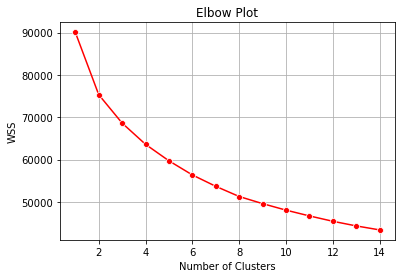

In [63]:
# Plotting the Elbow PLot
sns.lineplot(range(1,15), wss, marker='o',color='red' )
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.grid()
plt.show()

In [64]:
# Calculating the Silhoutte Score
from sklearn.metrics import silhouette_samples, silhouette_score

ss =[]
for i in range(2,15):
    KM = KMeans(n_clusters=i,random_state=0)
    KM.fit(scaled_df_cluster)
    ss.append(silhouette_score(scaled_df_cluster,KM.labels_))

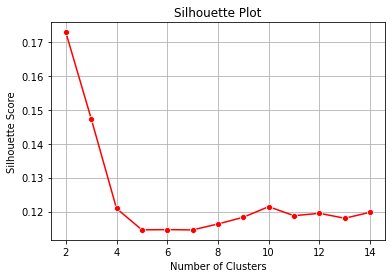

In [65]:
# plotting the Silhoutte Score
sns.lineplot(range(2,15), ss, marker='o',color='red' )
plt.title('Silhouette Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

In [66]:
# Claculating the Silhouette Coefficient
ssamples =[]
for i in range(2,15):
    KM = KMeans(n_clusters=i,random_state=0)
    KM.fit(scaled_df_cluster)
    ssamples.append(silhouette_samples(scaled_df_cluster,KM.labels_).min())

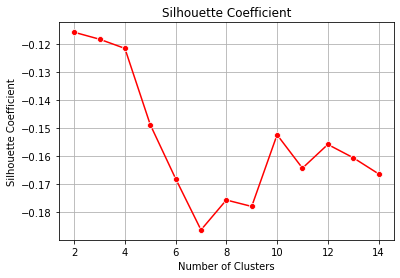

In [67]:
# Plotting the Silhouette Coefficient
sns.lineplot(range(2,15), ssamples, marker='o',color='red' )
plt.title('Silhouette Coefficient')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid()
plt.show()

In [68]:
# Cluster labels_2
k_means2 = KMeans(n_clusters = 2,random_state=0)
k_means2.fit(scaled_df_cluster)
km2_labels = k_means2.labels_
km2_labels

array([1, 1, 1, ..., 1, 0, 1])

In [69]:
# Silhouette score for 2 number of cluster
silhouette_score(scaled_df_cluster,km2_labels)

0.17288954121908262

In [70]:
# Cluster labels_3
k_means3 = KMeans(n_clusters = 3,random_state=0)
k_means3.fit(scaled_df_cluster)
km3_labels = k_means3.labels_
km3_labels

array([2, 2, 2, ..., 2, 1, 2])

In [71]:
# Silhouette score for 3 number of cluster
silhouette_score(scaled_df_cluster,km3_labels)

0.1474254524200242

In [72]:
# Cluster labels_4
k_means4 = KMeans(n_clusters = 4,random_state=0)
k_means4.fit(scaled_df_cluster)
km4_labels = k_means4.labels_
km4_labels

array([0, 0, 1, ..., 0, 3, 0])

In [73]:
# Silhouette score for 4 number of cluster
silhouette_score(scaled_df_cluster,km4_labels)

0.12089224152355371

In [74]:
# Adding the cluster nos to the dataframe
df_cluster['cluster_no'] = km2_labels

#### Calculating the Basis Stats on CLusters

In [75]:
# Calculating the cluster mean
df_cluster.groupby('cluster_no').mean()

Tenure  CC_Contacted_LY  Account_user_count  rev_per_month  \
cluster_no                                                                  
0           16.064414        18.175995            3.905858     605.829773   
1            6.466256        17.599207            3.561353     482.971525   

            rev_growth_yoy  coupon_used_for_payment  Day_Since_CC_connect  \
cluster_no                                                                  
0                 0.163832                 2.169631              6.857499   
1                 0.160694                 1.022186              3.108931   

              cashback  
cluster_no              
0           215.514039  
1           154.974707

In [76]:
# Calculating the cluster Standard deviation
df_cluster.groupby('cluster_no').std()

Tenure  CC_Contacted_LY  Account_user_count  rev_per_month  \
cluster_no                                                                 
0           8.754569         8.822638            0.878330     304.254577   
1           6.677193         8.385614            0.928885     276.800349   

            rev_growth_yoy  coupon_used_for_payment  Day_Since_CC_connect  \
cluster_no                                                                  
0                 0.038811                 1.105704              3.591759   
1                 0.036691                 0.830728              2.487861   

             cashback  
cluster_no             
0           45.579911  
1           25.540767

In [77]:
# Checking the clustering with categorical variables
df_cluster_2 = df_final.copy()

In [78]:
df_cluster_2['cluster_no'] = km2_labels
df_cluster_2

AccountID Churn  Tenure City_Tier  CC_Contacted_LY      Payment  Gender  \
0         20000     1     4.0       3.0              6.0   Debit Card  Female   
1         20001     1     0.0       1.0              8.0          UPI    Male   
2         20002     1     0.0       1.0             30.0   Debit Card    Male   
3         20003     1     0.0       3.0             15.0   Debit Card    Male   
4         20004     1     0.0       1.0             12.0  Credit Card    Male   
...         ...   ...     ...       ...              ...          ...     ...   
11255     31255     0    10.0       1.0             34.0  Credit Card    Male   
11256     31256     0    13.0       1.0             19.0  Credit Card    Male   
11257     31257     0     1.0       1.0             14.0   Debit Card    Male   
11258     31258     0    23.0       3.0             11.0  Credit Card    Male   
11259     31259     0     8.0       1.0             22.0  Credit Card    Male   

      Service_Score  Account_user_count account_segment CC_Agent_Score  \
0               3.0                 3.0           Super            2.0   
1               3.0                 4.0    Regular Plus            3.0   
2               2.0                 4.0    Regular Plus            3.0   
3               2.0                 4.0           Super            5.0   
4               2.0                 3.0    Regular Plus            5.0   
...             ...                 ...             ...            ...   
11255           3.0                 2.0           Super            1.0   
11256           3.0                 5.0             HNI            5.0   
11257           3.0                 2.0           Super            4.0   
11258           4.0                 5.0           Super            4.0   
11259           3.0                 2.0           Super            3.0   

      Marital_Status  rev_per_month Complain_ly  rev_growth_yoy  \
0             Single          900.0         1.0            0.11   
1             Single          700.0         1.0            0.15   
2             Single          600.0         1.0            0.14   
3             Single          800.0         0.0            0.23   
4             Single          300.0         0.0            0.11   
...              ...            ...         ...             ...   
11255        Married          900.0         0.0            0.19   
11256        Married          700.0         0.0            0.16   
11257        Married          700.0         1.0            0.22   
11258        Married          700.0         0.0            0.16   
11259        Married          500.0         0.0            0.13   

       coupon_used_for_payment  Day_Since_CC_connect  cashback Login_device  \
0                          1.0                   5.0   159.930       Mobile   
1                          0.0                   0.0   120.900       Mobile   
2                          0.0                   3.0   146.103       Mobile   
3                          0.0                   3.0   134.070       Mobile   
4                          1.0                   3.0   129.600       Mobile   
...                        ...                   ...       ...          ...   
11255                      1.0                   4.0   153.710     Computer   
11256                      1.0                   8.0   226.910       Mobile   
11257                      1.0                   4.0   191.420       Mobile   
11258                      2.0                   9.0   179.900     Computer   
11259                      2.0                   3.0   175.040       Mobile   

       cluster_no  
0               1  
1               1  
2               1  
3               1  
4               1  
...           ...  
11255           1  
11256           0  
11257           1  
11258           0  
11259           1  

[11260 rows x 20 columns]

#### Visualize the Churners VS Clusters

In [79]:
# Visualizing Churner VS Clusters
plt.figure(figsize=(20,15))
sns.stripplot(df_cluster_2['cluster_no'], df_cluster_2['rev_per_month'], hue=df_cluster_2['Churn'])

In [80]:
churn_cluster = pd.pivot_table(df_cluster_2, values='AccountID', index='Churn', columns='cluster_no', aggfunc='count', margins=True)
churn_cluster

cluster_no     0     1    All
Churn                        
0           4046  5318   9364
1            401  1495   1896
All         4447  6813  11260

In [81]:
# Now that we have done with the clustering, we must add the cluster numbers to df_final dataframe
df_final['cluster_no'] = km2_labels
df_final

AccountID Churn  Tenure City_Tier  CC_Contacted_LY      Payment  Gender  \
0         20000     1     4.0       3.0              6.0   Debit Card  Female   
1         20001     1     0.0       1.0              8.0          UPI    Male   
2         20002     1     0.0       1.0             30.0   Debit Card    Male   
3         20003     1     0.0       3.0             15.0   Debit Card    Male   
4         20004     1     0.0       1.0             12.0  Credit Card    Male   
...         ...   ...     ...       ...              ...          ...     ...   
11255     31255     0    10.0       1.0             34.0  Credit Card    Male   
11256     31256     0    13.0       1.0             19.0  Credit Card    Male   
11257     31257     0     1.0       1.0             14.0   Debit Card    Male   
11258     31258     0    23.0       3.0             11.0  Credit Card    Male   
11259     31259     0     8.0       1.0             22.0  Credit Card    Male   

      Service_Score  Account_user_count account_segment CC_Agent_Score  \
0               3.0                 3.0           Super            2.0   
1               3.0                 4.0    Regular Plus            3.0   
2               2.0                 4.0    Regular Plus            3.0   
3               2.0                 4.0           Super            5.0   
4               2.0                 3.0    Regular Plus            5.0   
...             ...                 ...             ...            ...   
11255           3.0                 2.0           Super            1.0   
11256           3.0                 5.0             HNI            5.0   
11257           3.0                 2.0           Super            4.0   
11258           4.0                 5.0           Super            4.0   
11259           3.0                 2.0           Super            3.0   

      Marital_Status  rev_per_month Complain_ly  rev_growth_yoy  \
0             Single          900.0         1.0            0.11   
1             Single          700.0         1.0            0.15   
2             Single          600.0         1.0            0.14   
3             Single          800.0         0.0            0.23   
4             Single          300.0         0.0            0.11   
...              ...            ...         ...             ...   
11255        Married          900.0         0.0            0.19   
11256        Married          700.0         0.0            0.16   
11257        Married          700.0         1.0            0.22   
11258        Married          700.0         0.0            0.16   
11259        Married          500.0         0.0            0.13   

       coupon_used_for_payment  Day_Since_CC_connect  cashback Login_device  \
0                          1.0                   5.0   159.930       Mobile   
1                          0.0                   0.0   120.900       Mobile   
2                          0.0                   3.0   146.103       Mobile   
3                          0.0                   3.0   134.070       Mobile   
4                          1.0                   3.0   129.600       Mobile   
...                        ...                   ...       ...          ...   
11255                      1.0                   4.0   153.710     Computer   
11256                      1.0                   8.0   226.910       Mobile   
11257                      1.0                   4.0   191.420       Mobile   
11258                      2.0                   9.0   179.900     Computer   
11259                      2.0                   3.0   175.040       Mobile   

       cluster_no  
0               1  
1               1  
2               1  
3               1  
4               1  
...           ...  
11255           1  
11256           0  
11257           1  
11258           0  
11259           1  

[11260 rows x 20 columns]

### Combining the correlated variables

In [82]:
# Cashback and coupon used are more or less same thing
# We will convert them into a single variable 'Cashback per coupon'

df_final['Cashback_per_coupon'] = df_final['cashback']/df_final['coupon_used_for_payment']

In [83]:
df_final.head()

AccountID Churn  Tenure City_Tier  CC_Contacted_LY      Payment  Gender  \
0     20000     1     4.0       3.0              6.0   Debit Card  Female   
1     20001     1     0.0       1.0              8.0          UPI    Male   
2     20002     1     0.0       1.0             30.0   Debit Card    Male   
3     20003     1     0.0       3.0             15.0   Debit Card    Male   
4     20004     1     0.0       1.0             12.0  Credit Card    Male   

  Service_Score  Account_user_count account_segment  ... Marital_Status  \
0           3.0                 3.0           Super  ...         Single   
1           3.0                 4.0    Regular Plus  ...         Single   
2           2.0                 4.0    Regular Plus  ...         Single   
3           2.0                 4.0           Super  ...         Single   
4           2.0                 3.0    Regular Plus  ...         Single   

  rev_per_month  Complain_ly rev_growth_yoy  coupon_used_for_payment  \
0         900.0          1.0           0.11                      1.0   
1         700.0          1.0           0.15                      0.0   
2         600.0          1.0           0.14                      0.0   
3         800.0          0.0           0.23                      0.0   
4         300.0          0.0           0.11                      1.0   

   Day_Since_CC_connect  cashback  Login_device cluster_no  \
0                   5.0   159.930        Mobile          1   
1                   0.0   120.900        Mobile          1   
2                   3.0   146.103        Mobile          1   
3                   3.0   134.070        Mobile          1   
4                   3.0   129.600        Mobile          1   

   Cashback_per_coupon  
0               159.93  
1                  inf  
2                  inf  
3                  inf  
4               129.60  

[5 rows x 21 columns]

In [84]:
df_final['Cashback_per_coupon'].value_counts()

inf           2150
280.072500     281
80.020714      212
140.036250     210
93.357500       66
              ... 
82.675000        1
126.230000       1
51.031429        1
75.375000        1
96.940000        1
Name: Cashback_per_coupon, Length: 6224, dtype: int64

In [85]:
# We can see few 'inf' terms which is because we have divided numerical value by 0
df_final['Cashback_per_coupon'].replace(to_replace=np.inf, value=0, inplace=True)


In [86]:
df_final.head(10)

AccountID Churn  Tenure City_Tier  CC_Contacted_LY           Payment  \
0     20000     1     4.0       3.0              6.0        Debit Card   
1     20001     1     0.0       1.0              8.0               UPI   
2     20002     1     0.0       1.0             30.0        Debit Card   
3     20003     1     0.0       3.0             15.0        Debit Card   
4     20004     1     0.0       1.0             12.0       Credit Card   
5     20005     1     0.0       1.0             22.0        Debit Card   
6     20006     1     2.0       3.0             11.0  Cash on Delivery   
7     20007     1     0.0       1.0              6.0       Credit Card   
8     20008     1    13.0       3.0              9.0          E wallet   
9     20009     1     0.0       1.0             31.0        Debit Card   

   Gender Service_Score  Account_user_count account_segment  ...  \
0  Female           3.0                 3.0           Super  ...   
1    Male           3.0                 4.0    Regular Plus  ...   
2    Male           2.0                 4.0    Regular Plus  ...   
3    Male           2.0                 4.0           Super  ...   
4    Male           2.0                 3.0    Regular Plus  ...   
5  Female           3.0                 3.6    Regular Plus  ...   
6    Male           2.0                 3.0           Super  ...   
7    Male           3.0                 3.0    Regular Plus  ...   
8    Male           2.0                 4.0    Regular Plus  ...   
9    Male           2.0                 5.0    Regular Plus  ...   

  Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
0         Single         900.0          1.0           0.11   
1         Single         700.0          1.0           0.15   
2         Single         600.0          1.0           0.14   
3         Single         800.0          0.0           0.23   
4         Single         300.0          0.0           0.11   
5         Single         200.0          1.0           0.22   
6       Divorced         400.0          0.0           0.14   
7       Divorced         300.0          1.0           0.16   
8       Divorced         200.0          1.0           0.14   
9         Single         200.0          0.0           0.12   

   coupon_used_for_payment  Day_Since_CC_connect  cashback  Login_device  \
0                      1.0                   5.0   159.930        Mobile   
1                      0.0                   0.0   120.900        Mobile   
2                      0.0                   3.0   146.103        Mobile   
3                      0.0                   3.0   134.070        Mobile   
4                      1.0                   3.0   129.600        Mobile   
5                      3.5                   7.0   139.190      Computer   
6                      0.0                   0.0   120.860        Mobile   
7                      2.0                   0.0   122.930        Mobile   
8                      0.0                   2.0   126.830        Mobile   
9                      1.0                   1.0   122.930        Mobile   

  cluster_no  Cashback_per_coupon  
0          1           159.930000  
1          1             0.000000  
2          1             0.000000  
3          1             0.000000  
4          1           129.600000  
5          1            39.768571  
6          1             0.000000  
7          1            61.465000  
8          1             0.000000  
9          1           122.930000  

[10 rows x 21 columns]

### Data Transformation

In [87]:
# Create a copy of dataset
df_log = df_final.copy()

In [88]:
# Before feeding the data to the models we shall address the data skewness. 
# Therefore, we will be performing data transformation for variables with skewness
var_to_transform = ['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'rev_growth_yoy',
                    'Day_Since_CC_connect','cashback','coupon_used_for_payment','Cashback_per_coupon']
df_log[var_to_transform] = df_log[var_to_transform].applymap(lambda x: np.log(x+1))


In [89]:
df_log[var_to_transform].head(10)

Tenure  CC_Contacted_LY  rev_per_month  rev_growth_yoy  \
0  1.609438         1.945910       6.803505        0.104360   
1  0.000000         2.197225       6.552508        0.139762   
2  0.000000         3.433987       6.398595        0.131028   
3  0.000000         2.772589       6.685861        0.207014   
4  0.000000         2.564949       5.707110        0.104360   
5  0.000000         3.135494       5.303305        0.198851   
6  1.098612         2.484907       5.993961        0.131028   
7  0.000000         1.945910       5.707110        0.148420   
8  2.639057         2.302585       5.303305        0.131028   
9  0.000000         3.465736       5.303305        0.113329   

   Day_Since_CC_connect  cashback  coupon_used_for_payment  \
0              1.791759  5.080969                 0.693147   
1              0.000000  4.803201                 0.000000   
2              1.386294  4.991133                 0.000000   
3              1.386294  4.905793                 0.000000   
4              1.386294  4.872139                 0.693147   
5              2.079442  4.942999                 1.504077   
6              0.000000  4.802873                 0.000000   
7              0.000000  4.819717                 1.098612   
8              1.098612  4.850701                 0.000000   
9              0.693147  4.819717                 0.693147   

   Cashback_per_coupon  
0             5.080969  
1             0.000000  
2             0.000000  
3             0.000000  
4             4.872139  
5             3.707911  
6             0.000000  
7             4.134606  
8             0.000000  
9             4.819717

In [90]:
# Plot Boxplot
plt.figure(figsize=(20,20))
for i in range(len(var_to_transform)):
    plt.subplot(4,2,i+1)
    sns.distplot(df_log[var_to_transform[i]],bins=20)
    plt.title('Histogram for {}'.format(var_to_transform[i]))
    plt.tight_layout(pad=3)

### Scaling the data

In [91]:
list_two_of_num_var = ['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'rev_growth_yoy', 'Day_Since_CC_connect',
                       'cashback','coupon_used_for_payment','Cashback_per_coupon']

In [92]:
df_scaled = df_log.copy()

In [93]:
from scipy.stats import zscore

In [94]:
df_scaled[list_two_of_num_var] = df_scaled[list_two_of_num_var].apply(zscore)

In [95]:
df_scaled.head(10)

AccountID Churn    Tenure City_Tier  CC_Contacted_LY           Payment  \
0     20000     1 -0.357636       3.0        -1.971688        Debit Card   
1     20001     1 -1.881637       1.0        -1.414075               UPI   
2     20002     1 -1.881637       1.0         1.330033        Debit Card   
3     20003     1 -1.881637       3.0        -0.137467        Debit Card   
4     20004     1 -1.881637       1.0        -0.598174       Credit Card   
5     20005     1 -1.881637       1.0         0.667742        Debit Card   
6     20006     1 -0.841344       3.0        -0.775771  Cash on Delivery   
7     20007     1 -1.881637       1.0        -1.971688       Credit Card   
8     20008     1  0.617326       3.0        -1.180303          E wallet   
9     20009     1 -1.881637       1.0         1.400477        Debit Card   

   Gender Service_Score  Account_user_count account_segment  ...  \
0  Female           3.0                 3.0           Super  ...   
1    Male           3.0                 4.0    Regular Plus  ...   
2    Male           2.0                 4.0    Regular Plus  ...   
3    Male           2.0                 4.0           Super  ...   
4    Male           2.0                 3.0    Regular Plus  ...   
5  Female           3.0                 3.6    Regular Plus  ...   
6    Male           2.0                 3.0           Super  ...   
7    Male           3.0                 3.0    Regular Plus  ...   
8    Male           2.0                 4.0    Regular Plus  ...   
9    Male           2.0                 5.0    Regular Plus  ...   

  Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
0         Single      1.152034          1.0      -1.413876   
1         Single      0.733171          1.0      -0.306743   
2         Single      0.476322          1.0      -0.579874   
3         Single      0.955710          0.0       1.796451   
4         Single     -0.677623          0.0      -1.413876   
5         Single     -1.351491          1.0       1.541158   
6       Divorced     -0.198927          0.0      -0.579874   
7       Divorced     -0.677623          1.0      -0.035978   
8       Divorced     -1.351491          1.0      -0.579874   
9         Single     -1.351491          0.0      -1.133397   

   coupon_used_for_payment  Day_Since_CC_connect  cashback  Login_device  \
0                -0.220439              0.413599 -0.340400        Mobile   
1                -1.666559             -2.094405 -1.498952        Mobile   
2                -1.666559             -0.153948 -0.715102        Mobile   
3                -1.666559             -0.153948 -1.071048        Mobile   
4                -0.220439             -0.153948 -1.211416        Mobile   
5                 1.471413              0.816280 -0.915867      Computer   
6                -1.666559             -2.094405 -1.500321        Mobile   
7                 0.625487             -2.094405 -1.430066        Mobile   
8                -1.666559             -0.556629 -1.300832        Mobile   
9                -0.220439             -1.124177 -1.430066        Mobile   

  cluster_no  Cashback_per_coupon  
0          1             0.665638  
1          1            -2.002900  
2          1            -2.002900  
3          1            -2.002900  
4          1             0.555960  
5          1            -0.055495  
6          1            -2.002900  
7          1             0.168606  
8          1            -2.002900  
9          1             0.528427  

[10 rows x 21 columns]

In [96]:
# Unscaled Data
df_unscaled = df_log.copy()

#### Creating dummy variables

In [97]:
# for scaled dataframe

In [98]:
df_scaled.drop('AccountID',axis=1, inplace=True)

In [99]:
df_scaled = pd.get_dummies(df_scaled,drop_first=True)
df_scaled.head()

Tenure  CC_Contacted_LY  Account_user_count  rev_per_month  \
0 -0.357636        -1.971688                 3.0       1.152034   
1 -1.881637        -1.414075                 4.0       0.733171   
2 -1.881637         1.330033                 4.0       0.476322   
3 -1.881637        -0.137467                 4.0       0.955710   
4 -1.881637        -0.598174                 3.0      -0.677623   

   rev_growth_yoy  coupon_used_for_payment  Day_Since_CC_connect  cashback  \
0       -1.413876                -0.220439              0.413599 -0.340400   
1       -0.306743                -1.666559             -2.094405 -1.498952   
2       -0.579874                -1.666559             -0.153948 -0.715102   
3        1.796451                -1.666559             -0.153948 -1.071048   
4       -1.413876                -0.220439             -0.153948 -1.211416   

   cluster_no  Cashback_per_coupon  ...  account_segment_Super  \
0           1             0.665638  ...                      1   
1           1            -2.002900  ...                      0   
2           1            -2.002900  ...                      0   
3           1            -2.002900  ...                      1   
4           1             0.555960  ...                      0   

   account_segment_Super Plus  CC_Agent_Score_2.0  CC_Agent_Score_3.0  \
0                           0                   1                   0   
1                           0                   0                   1   
2                           0                   0                   1   
3                           0                   0                   0   
4                           0                   0                   0   

   CC_Agent_Score_4.0  CC_Agent_Score_5.0  Marital_Status_Married  \
0                   0                   0                       0   
1                   0                   0                       0   
2                   0                   0                       0   
3                   0                   1                       0   
4                   0                   1                       0   

   Marital_Status_Single  Complain_ly_1.0  Login_device_Mobile  
0                      1                1                    1  
1                      1                1                    1  
2                      1                1                    1  
3                      1                0                    1  
4                      1                0                    1  

[5 rows x 35 columns]

In [100]:
# for unscaled dataframe

In [101]:
df_unscaled.drop('AccountID',axis=1, inplace=True)

In [102]:
df_unscaled = pd.get_dummies(df_unscaled,drop_first=True)
df_unscaled.head()

Tenure  CC_Contacted_LY  Account_user_count  rev_per_month  \
0  1.609438         1.945910                 3.0       6.803505   
1  0.000000         2.197225                 4.0       6.552508   
2  0.000000         3.433987                 4.0       6.398595   
3  0.000000         2.772589                 4.0       6.685861   
4  0.000000         2.564949                 3.0       5.707110   

   rev_growth_yoy  coupon_used_for_payment  Day_Since_CC_connect  cashback  \
0        0.104360                 0.693147              1.791759  5.080969   
1        0.139762                 0.000000              0.000000  4.803201   
2        0.131028                 0.000000              1.386294  4.991133   
3        0.207014                 0.000000              1.386294  4.905793   
4        0.104360                 0.693147              1.386294  4.872139   

   cluster_no  Cashback_per_coupon  ...  account_segment_Super  \
0           1             5.080969  ...                      1   
1           1             0.000000  ...                      0   
2           1             0.000000  ...                      0   
3           1             0.000000  ...                      1   
4           1             4.872139  ...                      0   

   account_segment_Super Plus  CC_Agent_Score_2.0  CC_Agent_Score_3.0  \
0                           0                   1                   0   
1                           0                   0                   1   
2                           0                   0                   1   
3                           0                   0                   0   
4                           0                   0                   0   

   CC_Agent_Score_4.0  CC_Agent_Score_5.0  Marital_Status_Married  \
0                   0                   0                       0   
1                   0                   0                       0   
2                   0                   0                       0   
3                   0                   1                       0   
4                   0                   1                       0   

   Marital_Status_Single  Complain_ly_1.0  Login_device_Mobile  
0                      1                1                    1  
1                      1                1                    1  
2                      1                1                    1  
3                      1                0                    1  
4                      1                0                    1  

[5 rows x 35 columns]

## Model Building

### Level 1 Un-tuned Models

#### 1. Linear Models

#### 1.a Logistic Regression

In [103]:
X_scaled = df_scaled.drop('Churn_1',axis=1)
y = df_scaled.pop('Churn_1')

In [104]:
# Split the data into train and test dataset
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30 , random_state=1)

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [106]:
LR_model_level_1 = LogisticRegression(penalty='l1',solver='saga',max_iter=100,random_state=1)

In [107]:
LR_model_level_1.fit(X_train, y_train)

C:\Users\91866\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='l1', random_state=1, solver='saga')

In [108]:
# Prediction on the training and testing set

ytrain_predict = LR_model_level_1.predict(X_train)
ytest_predict = LR_model_level_1.predict(X_test)

In [109]:
## Getting the predicted classes and probs

ytest_predict_prob=LR_model_level_1.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.410488  0.589512
1  0.128863  0.871137
2  0.880924  0.119076
3  0.660285  0.339715
4  0.995213  0.004787

In [110]:
# Accuracy - Train Data 
lr_l1_train_acc=LR_model_level_1.score(X_train, y_train)
lr_l1_train_acc

0.8993910175082467

AUC_train: 0.899


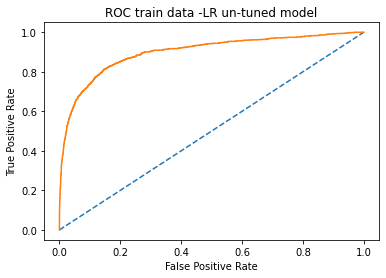

In [111]:
# AUC for the training data

# predict probabilities
probs = LR_model_level_1.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_l1_train_probs = probs[:, 1]
# calculate AUC
lr_l1_auc_train = roc_auc_score(y_train, lr_l1_train_probs)
print('AUC_train: %.3f' % lr_l1_auc_train)

# calculate roc curve
lr_l1_train_fpr,lr_l1_train_tpr,lr_l1_train_thresholds = roc_curve(y_train, lr_l1_train_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_l1_train_fpr,lr_l1_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC train data -LR un-tuned model')
plt.show()

In [112]:
# Accuracy - Test Data
lr_l1_test_acc=LR_model_level_1.score(X_test, y_test)
lr_l1_test_acc

0.8996447602131439

AUC_train: 0.887


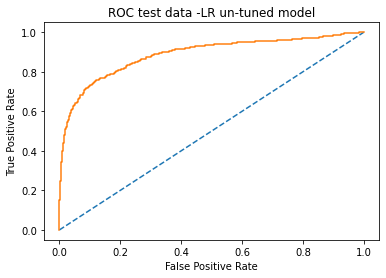

In [113]:
# AUC for the training data

# predict probabilities
probs = LR_model_level_1.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_l1_test_probs = probs[:, 1]
# calculate AUC
lr_l1_auc_test = roc_auc_score(y_test, lr_l1_test_probs)
print('AUC_train: %.3f' % lr_l1_auc_test)

# calculate roc curve
lr_l1_test_fpr,lr_l1_test_tpr,lr_l1_test_thresholds = roc_curve(y_test, lr_l1_test_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_l1_test_fpr,lr_l1_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC test data -LR un-tuned model')
plt.show()

In [114]:
## Confusion matrix on the training data

plot_confusion_matrix(LR_model_level_1,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

C:\Users\91866\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.92      0.96      0.94      6556
           1       0.76      0.58      0.66      1326

    accuracy                           0.90      7882
   macro avg       0.84      0.77      0.80      7882
weighted avg       0.89      0.90      0.89      7882
 



C:\Users\91866\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2808
           1       0.78      0.57      0.66       570

    accuracy                           0.90      3378
   macro avg       0.85      0.77      0.80      3378
weighted avg       0.89      0.90      0.89      3378
 



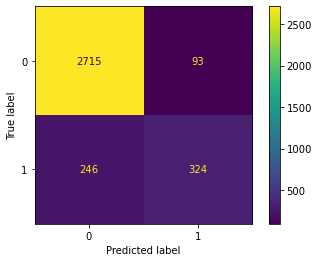

In [115]:
## Confusion matrix on the test data

plot_confusion_matrix(LR_model_level_1,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

#### 1.b Linear Discriminent Analysis (LDA)

In [116]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [117]:
#Build LDA Model
lda = LinearDiscriminantAnalysis()
LDA_model_level_1 = lda.fit(X_train,y_train)

In [118]:
# Training Data Class Prediction with a cut-off value of 0.5
ytrain_predict = LDA_model_level_1.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
ytest_predict = LDA_model_level_1.predict(X_test)

In [119]:
## Getting the predicted classes and probs

ytest_predict_prob=LDA_model_level_1.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.210961  0.789039
1  0.070697  0.929303
2  0.924311  0.075689
3  0.496343  0.503657
4  0.995939  0.004061

In [120]:
# Accuracy - Train Data 
lda_l1_train_acc=LDA_model_level_1.score(X_train, y_train)
lda_l1_train_acc

0.8948236488200965

AUC_train: 0.895


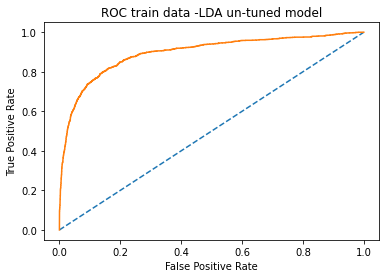

In [121]:
# AUC for the training data

# predict probabilities
probs = LDA_model_level_1.predict_proba(X_train)
# keep probabilities for the positive outcome only
lda_l1_train_probs = probs[:, 1]
# calculate AUC
lda_l1_auc_train = roc_auc_score(y_train, lda_l1_train_probs)
print('AUC_train: %.3f' % lda_l1_auc_train)

# calculate roc curve
lda_l1_train_fpr,lda_l1_train_tpr,lda_l1_train_thresholds = roc_curve(y_train, lda_l1_train_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_l1_train_fpr,lda_l1_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC train data -LDA un-tuned model')
plt.show()

In [122]:
# Accuracy - Test Data 
lda_l1_test_acc=LDA_model_level_1.score(X_test, y_test)
lda_l1_test_acc

0.8952042628774423

AUC_test: 0.883


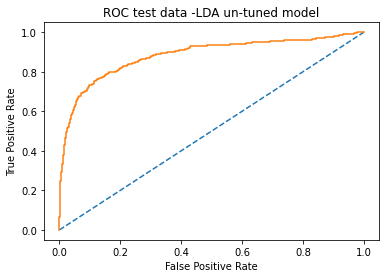

In [123]:
# AUC for the test data

# predict probabilities
probs = LDA_model_level_1.predict_proba(X_test)
# keep probabilities for the positive outcome only
lda_l1_test_probs = probs[:, 1]
# calculate AUC
lda_l1_auc_test = roc_auc_score(y_test, lda_l1_test_probs)
print('AUC_test: %.3f' % lda_l1_auc_test)

# calculate roc curve
lda_l1_test_fpr,lda_l1_test_tpr,lda_l1_test_thresholds = roc_curve(y_test, lda_l1_test_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_l1_test_fpr,lda_l1_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC test data -LDA un-tuned model')
plt.show()

C:\Users\91866\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.92      0.95      0.94      6556
           1       0.72      0.62      0.66      1326

    accuracy                           0.89      7882
   macro avg       0.82      0.78      0.80      7882
weighted avg       0.89      0.89      0.89      7882
 



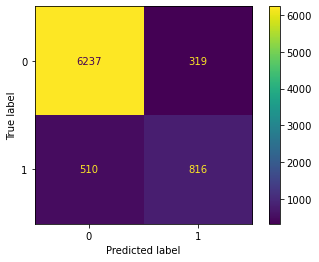

In [124]:
## Confusion matrix on the training data

plot_confusion_matrix(LDA_model_level_1,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

C:\Users\91866\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2808
           1       0.73      0.60      0.66       570

    accuracy                           0.90      3378
   macro avg       0.83      0.78      0.80      3378
weighted avg       0.89      0.90      0.89      3378
 



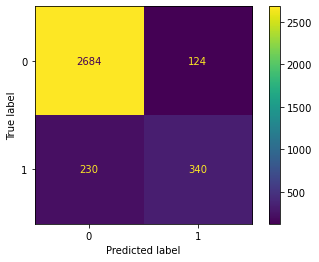

In [125]:
## Confusion matrix on the test data

plot_confusion_matrix(LDA_model_level_1,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

#### 2. Non-linear Models

#### 2.a Random Forest Classifier

In [126]:
X_unscaled = df_unscaled.drop('Churn_1',axis=1)
y = df_unscaled.pop('Churn_1')

In [127]:
# Split the data into train and test dataset
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_unscaled, y, test_size=0.30 , random_state=1)

In [128]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
#Build rfcl Model
rfcl = RandomForestClassifier(max_depth=10,n_estimators=501,random_state=1)
rfcl_model_level_1 = rfcl.fit(X_train,y_train)

In [130]:
# Training Data Class Prediction
ytrain_predict = rfcl_model_level_1.predict(X_train)

# Test Data Class Prediction
ytest_predict = rfcl_model_level_1.predict(X_test)

In [131]:
## Getting the predicted classes and probs

ytest_predict_prob=rfcl_model_level_1.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.441215  0.558785
1  0.211350  0.788650
2  0.967849  0.032151
3  0.726305  0.273695
4  0.987264  0.012736

In [132]:
# Accuracy - Train Data 
rfcl_l1_train_acc=rfcl_model_level_1.score(X_train, y_train)
rfcl_l1_train_acc

0.961557980208069

AUC_train: 0.994


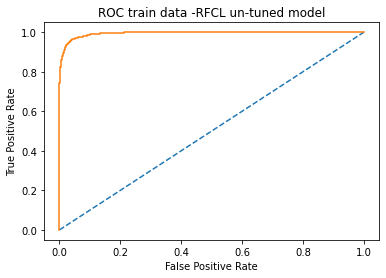

In [133]:
# AUC for the training data

# predict probabilities
probs = rfcl_model_level_1.predict_proba(X_train)
# keep probabilities for the positive outcome only
rfcl_l1_train_probs = probs[:, 1]
# calculate AUC
rfcl_l1_auc_train = roc_auc_score(y_train, rfcl_l1_train_probs)
print('AUC_train: %.3f' % rfcl_l1_auc_train)

# calculate roc curve
rfcl_l1_train_fpr,rfcl_l1_train_tpr,rfcl_l1_train_thresholds = roc_curve(y_train, rfcl_l1_train_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rfcl_l1_train_fpr,rfcl_l1_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC train data -RFCL un-tuned model')
plt.show()

In [134]:
# Accuracy - Test Data 
rfcl_l1_test_acc=rfcl_model_level_1.score(X_test, y_test)
rfcl_l1_test_acc

0.9336885731201895

AUC_test: 0.971


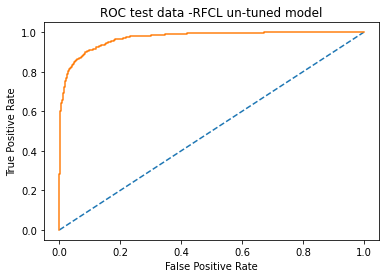

In [135]:
# AUC for the test data

# predict probabilities
probs = rfcl_model_level_1.predict_proba(X_test)
# keep probabilities for the positive outcome only
rfcl_l1_test_probs = probs[:, 1]
# calculate AUC
rfcl_l1_auc_test = roc_auc_score(y_test, rfcl_l1_test_probs)
print('AUC_test: %.3f' % rfcl_l1_auc_test)

# calculate roc curve
rfcl_l1_test_fpr,rfcl_l1_test_tpr,rfcl_l1_test_thresholds = roc_curve(y_test, rfcl_l1_test_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rfcl_l1_test_fpr,rfcl_l1_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC test data -RFCL un-tuned model')
plt.show()

C:\Users\91866\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6556
           1       0.99      0.78      0.87      1326

    accuracy                           0.96      7882
   macro avg       0.97      0.89      0.92      7882
weighted avg       0.96      0.96      0.96      7882
 



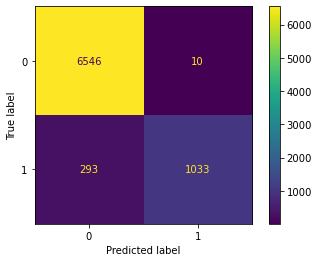

In [136]:
## Confusion matrix on the training data

plot_confusion_matrix(rfcl_model_level_1,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

C:\Users\91866\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2808
           1       0.95      0.64      0.77       570

    accuracy                           0.93      3378
   macro avg       0.94      0.82      0.86      3378
weighted avg       0.93      0.93      0.93      3378
 



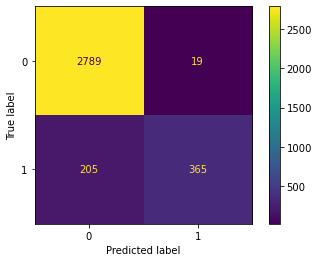

In [137]:
## Confusion matrix on the test data

plot_confusion_matrix(rfcl_model_level_1,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

#### 2.b MLP CLassifier (ANN)

In [138]:
from sklearn.neural_network import MLPClassifier

In [139]:
# Split the data into train and test dataset
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30 , random_state=1)

In [140]:
#Build rfcl Model
mlp = MLPClassifier(hidden_layer_sizes=(100),random_state=1)
mlp_model_level_1 = mlp.fit(X_train,y_train)

C:\Users\91866\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [141]:
# Training Data Class Prediction
ytrain_predict = mlp_model_level_1.predict(X_train)

# Test Data Class Prediction
ytest_predict = mlp_model_level_1.predict(X_test)

In [142]:
## Getting the predicted classes and probs

ytest_predict_prob=mlp_model_level_1.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.962171  0.037829
1  0.002735  0.997265
2  0.999993  0.000007
3  0.752764  0.247236
4  0.999997  0.000003

In [143]:
# Accuracy - Train Data 
mlp_l1_train_acc=mlp_model_level_1.score(X_train, y_train)
mlp_l1_train_acc

0.9914996193859427

AUC_train: 0.999


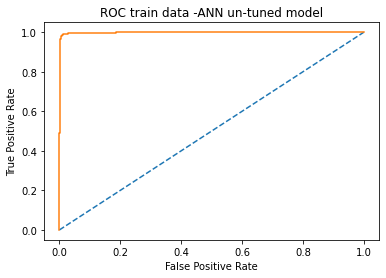

In [144]:
# AUC for the training data

# predict probabilities
probs = mlp_model_level_1.predict_proba(X_train)
# keep probabilities for the positive outcome only
mlp_l1_train_probs = probs[:, 1]
# calculate AUC
mlp_l1_auc_train = roc_auc_score(y_train, mlp_l1_train_probs)
print('AUC_train: %.3f' % mlp_l1_auc_train)

# calculate roc curve
mlp_l1_train_fpr,mlp_l1_train_tpr,mlp_l1_train_thresholds = roc_curve(y_train, mlp_l1_train_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(mlp_l1_train_fpr,mlp_l1_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC train data -ANN un-tuned model')
plt.show()

In [145]:
# Accuracy - Test Data 
mlp_l1_test_acc=mlp_model_level_1.score(X_test, y_test)
mlp_l1_test_acc

0.9573712255772646

AUC_test: 0.983


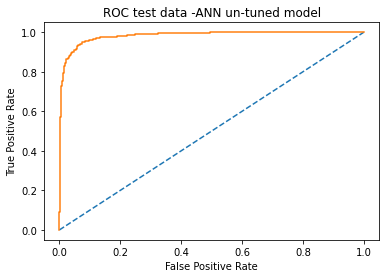

In [146]:
# AUC for the test data

# predict probabilities
probs = mlp_model_level_1.predict_proba(X_test)
# keep probabilities for the positive outcome only
mlp_l1_test_probs = probs[:, 1]
# calculate AUC
mlp_l1_auc_test = roc_auc_score(y_test, mlp_l1_test_probs)
print('AUC_test: %.3f' % mlp_l1_auc_test)

# calculate roc curve
mlp_l1_test_fpr,mlp_l1_test_tpr,mlp_l1_test_thresholds = roc_curve(y_test, mlp_l1_test_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(mlp_l1_test_fpr,mlp_l1_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC test data -ANN un-tuned model')
plt.show()

C:\Users\91866\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6556
           1       0.98      0.97      0.97      1326

    accuracy                           0.99      7882
   macro avg       0.99      0.98      0.98      7882
weighted avg       0.99      0.99      0.99      7882
 



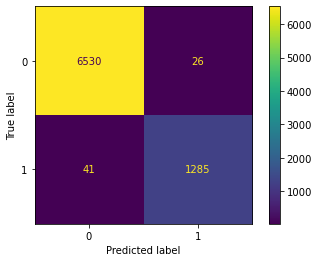

In [147]:
## Confusion matrix on the training data

plot_confusion_matrix(mlp_model_level_1,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

C:\Users\91866\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2808
           1       0.90      0.84      0.87       570

    accuracy                           0.96      3378
   macro avg       0.93      0.91      0.92      3378
weighted avg       0.96      0.96      0.96      3378
 



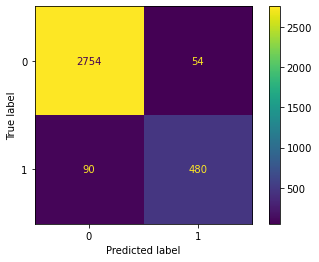

In [148]:
## Confusion matrix on the test data

plot_confusion_matrix(mlp_model_level_1,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

#### 3. Emsemble Models

#### 3.a Ada Boost

In [149]:
# Split the data into train and test dataset
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_unscaled, y, test_size=0.30 , random_state=1)

In [150]:
from sklearn.ensemble import AdaBoostClassifier

ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
adb_model_level_1 = ADB_model.fit(X_train,y_train)

In [151]:
# Training Data Class Prediction
ytrain_predict = adb_model_level_1.predict(X_train)

# Test Data Class Prediction
ytest_predict = adb_model_level_1.predict(X_test)

In [152]:
## Getting the predicted classes and probs

ytest_predict_prob=adb_model_level_1.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.498466  0.501534
1  0.494581  0.505419
2  0.506702  0.493298
3  0.500975  0.499025
4  0.515695  0.484305

In [153]:
# Accuracy - Train Data 
adb_l1_train_acc=adb_model_level_1.score(X_train, y_train)
adb_l1_train_acc

0.9007866023851814

AUC_train: 0.923


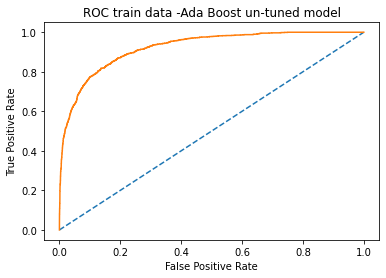

In [154]:
# AUC for the training data

# predict probabilities
probs = adb_model_level_1.predict_proba(X_train)
# keep probabilities for the positive outcome only
adb_l1_train_probs = probs[:, 1]
# calculate AUC
adb_l1_auc_train = roc_auc_score(y_train, adb_l1_train_probs)
print('AUC_train: %.3f' % adb_l1_auc_train)

# calculate roc curve
adb_l1_train_fpr,adb_l1_train_tpr,adb_l1_train_thresholds = roc_curve(y_train, adb_l1_train_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adb_l1_train_fpr,adb_l1_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC train data -Ada Boost un-tuned model')
plt.show()

In [155]:
# Accuracy - Test Data 
adb_l1_test_acc=adb_model_level_1.score(X_test, y_test)
adb_l1_test_acc

0.9002368265245707

AUC_test: 0.910


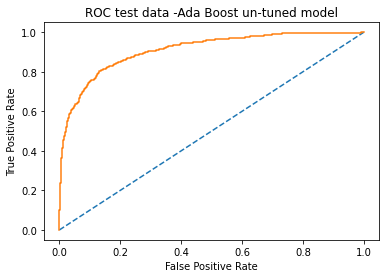

In [156]:
# AUC for the test data

# predict probabilities
probs = adb_model_level_1.predict_proba(X_test)
# keep probabilities for the positive outcome only
adb_l1_test_probs = probs[:, 1]
# calculate AUC
adb_l1_auc_test = roc_auc_score(y_test, adb_l1_test_probs)
print('AUC_test: %.3f' % adb_l1_auc_test)

# calculate roc curve
adb_l1_test_fpr,adb_l1_test_tpr,adb_l1_test_thresholds = roc_curve(y_test, adb_l1_test_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adb_l1_test_fpr,adb_l1_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC test data -Ada Boost un-tuned model')
plt.show()

C:\Users\91866\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.92      0.96      0.94      6556
           1       0.76      0.59      0.67      1326

    accuracy                           0.90      7882
   macro avg       0.84      0.78      0.81      7882
weighted avg       0.89      0.90      0.90      7882
 



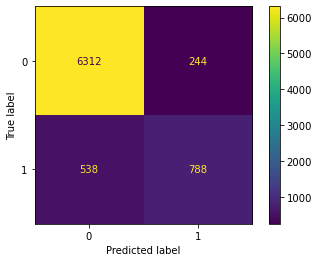

In [157]:
## Confusion matrix on the training data

plot_confusion_matrix(adb_model_level_1,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

C:\Users\91866\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2808
           1       0.76      0.59      0.67       570

    accuracy                           0.90      3378
   macro avg       0.84      0.78      0.80      3378
weighted avg       0.89      0.90      0.89      3378
 



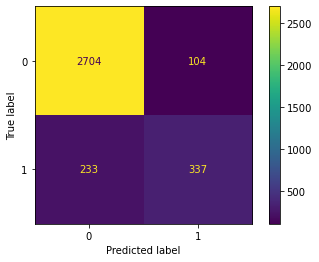

In [158]:
## Confusion matrix on the test data

plot_confusion_matrix(adb_model_level_1,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

#### 3.b XG Boost

In [159]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, random_state=1)
xgb_model_level_1 = xgb.fit(X_train, y_train)

In [160]:
# Training Data Class Prediction
ytrain_predict = xgb_model_level_1.predict(X_train)

# Test Data Class Prediction
ytest_predict = xgb_model_level_1.predict(X_test)

In [161]:
## Getting the predicted classes and probs

ytest_predict_prob=xgb_model_level_1.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.789595  0.210405
1  0.048173  0.951827
2  0.996945  0.003055
3  0.959881  0.040119
4  0.999985  0.000015

In [162]:
# Accuracy - Train Data 
xgb_l1_train_acc=xgb_model_level_1.score(X_train, y_train)
xgb_l1_train_acc

0.9998731286475514

AUC_train: 1.000


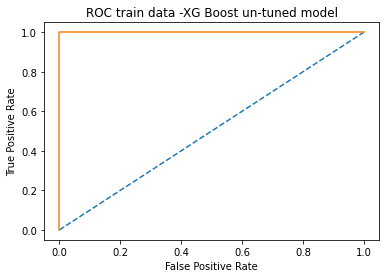

In [163]:
# AUC for the training data

# predict probabilities
probs = xgb_model_level_1.predict_proba(X_train)
# keep probabilities for the positive outcome only
xgb_l1_train_probs = probs[:, 1]
# calculate AUC
xgb_l1_auc_train = roc_auc_score(y_train, xgb_l1_train_probs)
print('AUC_train: %.3f' % xgb_l1_auc_train)

# calculate roc curve
xgb_l1_train_fpr,xgb_l1_train_tpr,xgb_l1_train_thresholds = roc_curve(y_train, xgb_l1_train_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(xgb_l1_train_fpr,xgb_l1_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC train data -XG Boost un-tuned model')
plt.show()

In [164]:
# Accuracy - Test Data 
xgb_l1_test_acc=xgb_model_level_1.score(X_test, y_test)
xgb_l1_test_acc

0.9683244523386619

AUC_test: 0.989


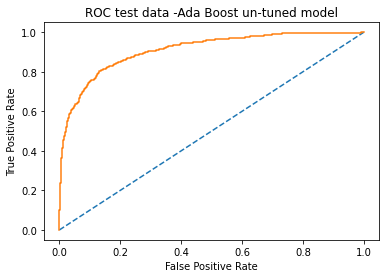

In [165]:
# AUC for the test data

# predict probabilities
probs = xgb_model_level_1.predict_proba(X_test)
# keep probabilities for the positive outcome only
xgb_l1_test_probs = probs[:, 1]
# calculate AUC
xgb_l1_auc_test = roc_auc_score(y_test, xgb_l1_test_probs)
print('AUC_test: %.3f' % xgb_l1_auc_test)

# calculate roc curve
xgb_l1_test_fpr,xgb_l1_test_tpr,xgb_l1_test_thresholds = roc_curve(y_test, xgb_l1_test_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adb_l1_test_fpr,adb_l1_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC test data -Ada Boost un-tuned model')
plt.show()

C:\Users\91866\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6556
           1       1.00      1.00      1.00      1326

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882
 



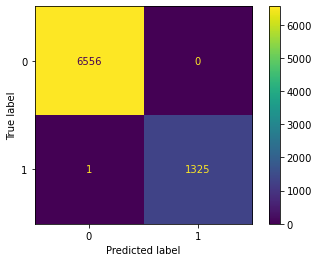

In [166]:
## Confusion matrix on the training data

plot_confusion_matrix(xgb_model_level_1,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

C:\Users\91866\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2808
           1       0.96      0.85      0.90       570

    accuracy                           0.97      3378
   macro avg       0.96      0.92      0.94      3378
weighted avg       0.97      0.97      0.97      3378
 



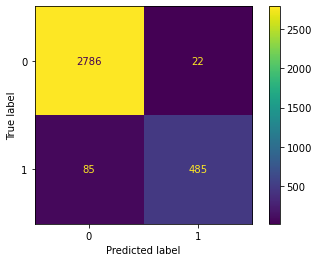

In [167]:
## Confusion matrix on the test data

plot_confusion_matrix(xgb_model_level_1,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

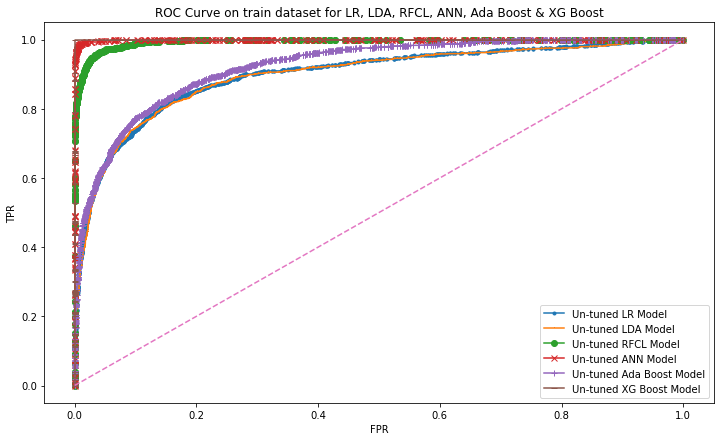

In [168]:
# ROC Curves for all un-tuned models on train dataset
# AUC Comparison
models=[LR_model_level_1 , LDA_model_level_1, rfcl_model_level_1, mlp_model_level_1, adb_model_level_1, xgb_model_level_1]

models_names={LR_model_level_1 : 'Un-tuned LR Model', LDA_model_level_1 : 'Un-tuned LDA Model', 
              rfcl_model_level_1 : 'Un-tuned RFCL Model', mlp_model_level_1 : 'Un-tuned ANN Model', 
              adb_model_level_1 : 'Un-tuned Ada Boost Model', xgb_model_level_1 : 'Un-tuned XG Boost Model'}

plt.figure(figsize=(12,7))
lr_l1_train_fpr,lr_l1_train_tpr,lr_l1_train_thresholds = roc_curve(y_train, lr_l1_train_probs)
plt.plot(lr_l1_train_fpr,lr_l1_train_tpr,marker='.')

lda_l1_train_fpr,lda_l1_train_tpr,lda_l1_train_thresholds = roc_curve(y_train, lda_l1_train_probs)
plt.plot(lda_l1_train_fpr,lda_l1_train_tpr,marker=',')

rfcl_l1_train_fpr,rfcl_l1_train_tpr,rfcl_l1_train_thresholds = roc_curve(y_train, rfcl_l1_train_probs)
plt.plot(rfcl_l1_train_fpr,rfcl_l1_train_tpr,marker='o')

mlp_l1_train_fpr,mlp_l1_train_tpr,mlp_l1_train_thresholds = roc_curve(y_train, mlp_l1_train_probs)
plt.plot(mlp_l1_train_fpr,mlp_l1_train_tpr,marker='x')

adb_l1_train_fpr,adb_l1_train_tpr,adb_l1_train_thresholds = roc_curve(y_train, adb_l1_train_probs)
plt.plot(adb_l1_train_fpr,adb_l1_train_tpr,marker='+')

xgb_l1_train_fpr,xgb_l1_train_tpr,xgb_l1_train_thresholds = roc_curve(y_train, xgb_l1_train_probs)
plt.plot(xgb_l1_train_fpr,xgb_l1_train_tpr,marker='_')

plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC Curve on train dataset for {}'.format('LR, LDA, RFCL, ANN, Ada Boost & XG Boost'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()

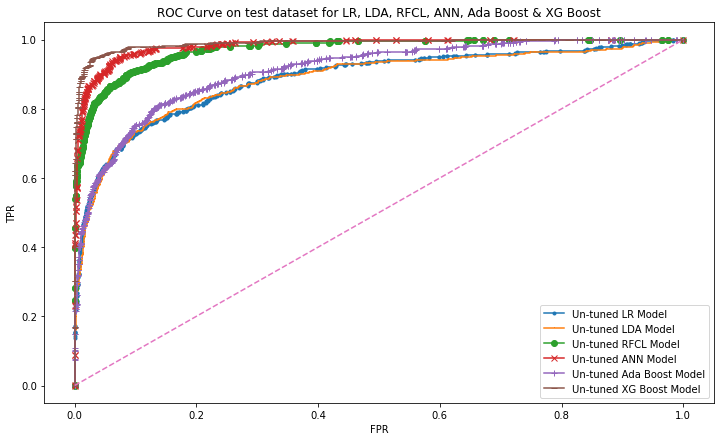

In [169]:
# ROC Curves for all un-tuned models on test dataset
# AUC Comparison
models=[LR_model_level_1 , LDA_model_level_1, rfcl_model_level_1, mlp_model_level_1, adb_model_level_1, xgb_model_level_1]

models_names={LR_model_level_1 : 'Un-tuned LR Model', LDA_model_level_1 : 'Un-tuned LDA Model', 
              rfcl_model_level_1 : 'Un-tuned RFCL Model', mlp_model_level_1 : 'Un-tuned ANN Model', 
              adb_model_level_1 : 'Un-tuned Ada Boost Model', xgb_model_level_1 : 'Un-tuned XG Boost Model'}

plt.figure(figsize=(12,7))
lr_l1_test_fpr,lr_l1_test_tpr,lr_l1_test_thresholds = roc_curve(y_test, lr_l1_test_probs)
plt.plot(lr_l1_test_fpr,lr_l1_test_tpr,marker='.')

lda_l1_test_fpr,lda_l1_test_tpr,lda_l1_test_thresholds = roc_curve(y_test, lda_l1_test_probs)
plt.plot(lda_l1_test_fpr,lda_l1_test_tpr,marker=',')

rfcl_l1_test_fpr,rfcl_l1_test_tpr,rfcl_l1_test_thresholds = roc_curve(y_test, rfcl_l1_test_probs)
plt.plot(rfcl_l1_test_fpr,rfcl_l1_test_tpr,marker='o')

mlp_l1_test_fpr,mlp_l1_test_tpr,mlp_l1_test_thresholds = roc_curve(y_test, mlp_l1_test_probs)
plt.plot(mlp_l1_test_fpr,mlp_l1_test_tpr,marker='x')

adb_l1_test_fpr,adb_l1_test_tpr,adb_l1_test_thresholds = roc_curve(y_test, adb_l1_test_probs)
plt.plot(adb_l1_test_fpr,adb_l1_test_tpr,marker='+')

xgb_l1_test_fpr,xgb_l1_test_tpr,xgb_l1_test_thresholds = roc_curve(y_test, xgb_l1_test_probs)
plt.plot(xgb_l1_test_fpr,xgb_l1_test_tpr,marker='_')

plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC Curve on test dataset for {}'.format('LR, LDA, RFCL, ANN, Ada Boost & XG Boost'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()

### Level 2 Tuned Models

#### 1. Tuned Linear Models

#### 1.a Tuned Logistic Regression Model

In [170]:
# Checking the VIF

In [171]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [172]:
calc_vif(df_scaled).sort_values(by = 'VIF', ascending = False)

variables        VIF
19             Service_Score_3.0  19.823725
2             Account_user_count  18.025669
18             Service_Score_2.0  11.266275
20             Service_Score_4.0   9.803416
23  account_segment_Regular Plus   7.212836
8                     cluster_no   6.641859
13            Payment_Debit Card   4.881401
7                       cashback   4.499748
30        Marital_Status_Married   4.375385
24         account_segment_Super   4.361188
12           Payment_Credit Card   3.961675
33           Login_device_Mobile   3.067880
31         Marital_Status_Single   2.958072
16                   Gender_Male   2.482127
14              Payment_E wallet   2.447687
5        coupon_used_for_payment   2.430654
27            CC_Agent_Score_3.0   2.381865
11                 City_Tier_3.0   2.175944
9            Cashback_per_coupon   1.980724
29            CC_Agent_Score_5.0   1.894195
28            CC_Agent_Score_4.0   1.881057
15                   Payment_UPI   1.839133
25    account_segment_Super Plus   1.775460
22       account_segment_Regular   1.614229
26            CC_Agent_Score_2.0   1.600424
0                         Tenure   1.532895
6           Day_Since_CC_connect   1.427449
32               Complain_ly_1.0   1.396169
17             Service_Score_1.0   1.233362
10                 City_Tier_2.0   1.201199
3                  rev_per_month   1.166983
1                CC_Contacted_LY   1.043495
4                 rev_growth_yoy   1.033668
21             Service_Score_5.0   1.021540

In [173]:
X_lr = df_scaled.copy()
X_lr = X_lr.drop('Account_user_count', axis=1)

In [174]:
calc_vif(X_lr).sort_values(by = 'VIF', ascending = False)

variables        VIF
18             Service_Score_3.0  14.651351
17             Service_Score_2.0   8.840599
19             Service_Score_4.0   7.233112
22  account_segment_Regular Plus   7.059264
7                     cluster_no   6.617368
12            Payment_Debit Card   4.853440
6                       cashback   4.398799
29        Marital_Status_Married   4.343006
23         account_segment_Super   4.301247
11           Payment_Credit Card   3.939489
32           Login_device_Mobile   3.066479
30         Marital_Status_Single   2.919241
15                   Gender_Male   2.480224
13              Payment_E wallet   2.436583
4        coupon_used_for_payment   2.423743
26            CC_Agent_Score_3.0   2.370871
10                 City_Tier_3.0   2.173795
8            Cashback_per_coupon   1.977596
28            CC_Agent_Score_5.0   1.890719
27            CC_Agent_Score_4.0   1.873558
14                   Payment_UPI   1.831691
24    account_segment_Super Plus   1.767770
21       account_segment_Regular   1.612523
25            CC_Agent_Score_2.0   1.589779
0                         Tenure   1.529286
5           Day_Since_CC_connect   1.424836
31               Complain_ly_1.0   1.395662
9                  City_Tier_2.0   1.201153
16             Service_Score_1.0   1.175337
2                  rev_per_month   1.166834
1                CC_Contacted_LY   1.043250
3                 rev_growth_yoy   1.032975
20             Service_Score_5.0   1.014970

In [175]:
X_lr = X_lr.drop('cluster_no', axis=1)

In [176]:
calc_vif(X_lr).sort_values(by = 'VIF', ascending = False)

variables        VIF
17             Service_Score_3.0  13.826731
16             Service_Score_2.0   8.368006
21  account_segment_Regular Plus   6.944092
18             Service_Score_4.0   6.839174
11            Payment_Debit Card   4.839605
28        Marital_Status_Married   4.339686
22         account_segment_Super   4.228470
6                       cashback   4.183592
10           Payment_Credit Card   3.926101
31           Login_device_Mobile   3.066247
29         Marital_Status_Single   2.918501
14                   Gender_Male   2.477525
12              Payment_E wallet   2.431728
25            CC_Agent_Score_3.0   2.369082
9                  City_Tier_3.0   2.173271
4        coupon_used_for_payment   2.071958
7            Cashback_per_coupon   1.920262
27            CC_Agent_Score_5.0   1.889348
26            CC_Agent_Score_4.0   1.871910
13                   Payment_UPI   1.828279
23    account_segment_Super Plus   1.767441
20       account_segment_Regular   1.612407
24            CC_Agent_Score_2.0   1.589540
0                         Tenure   1.404827
30               Complain_ly_1.0   1.395591
5           Day_Since_CC_connect   1.323320
8                  City_Tier_2.0   1.200855
15             Service_Score_1.0   1.164406
2                  rev_per_month   1.153161
1                CC_Contacted_LY   1.042540
3                 rev_growth_yoy   1.032391
19             Service_Score_5.0   1.014463

In [177]:
X_lr.head()

Tenure  CC_Contacted_LY  rev_per_month  rev_growth_yoy  \
0 -0.357636        -1.971688       1.152034       -1.413876   
1 -1.881637        -1.414075       0.733171       -0.306743   
2 -1.881637         1.330033       0.476322       -0.579874   
3 -1.881637        -0.137467       0.955710        1.796451   
4 -1.881637        -0.598174      -0.677623       -1.413876   

   coupon_used_for_payment  Day_Since_CC_connect  cashback  \
0                -0.220439              0.413599 -0.340400   
1                -1.666559             -2.094405 -1.498952   
2                -1.666559             -0.153948 -0.715102   
3                -1.666559             -0.153948 -1.071048   
4                -0.220439             -0.153948 -1.211416   

   Cashback_per_coupon  City_Tier_2.0  City_Tier_3.0  ...  \
0             0.665638              0              1  ...   
1            -2.002900              0              0  ...   
2            -2.002900              0              0  ...   
3            -2.002900              0              1  ...   
4             0.555960              0              0  ...   

   account_segment_Super  account_segment_Super Plus  CC_Agent_Score_2.0  \
0                      1                           0                   1   
1                      0                           0                   0   
2                      0                           0                   0   
3                      1                           0                   0   
4                      0                           0                   0   

   CC_Agent_Score_3.0  CC_Agent_Score_4.0  CC_Agent_Score_5.0  \
0                   0                   0                   0   
1                   1                   0                   0   
2                   1                   0                   0   
3                   0                   0                   1   
4                   0                   0                   1   

   Marital_Status_Married  Marital_Status_Single  Complain_ly_1.0  \
0                       0                      1                1   
1                       0                      1                1   
2                       0                      1                1   
3                       0                      1                0   
4                       0                      1                0   

   Login_device_Mobile  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  

[5 rows x 32 columns]

In [178]:
from sklearn.model_selection import GridSearchCV

In [179]:
# Split the data into train and test dataset
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_lr, y, test_size=0.30 , random_state=1)

In [180]:
# Applying GridSearchCV for Logistic Regression
grid={'penalty':['l1','l2','none'],
      'solver':['newton-cg','sag','saga','lbfgs','liblinear'],
      'tol':[0.1]}

In [181]:
lr_l2_model = LogisticRegression(max_iter=1000,random_state=1)

In [182]:
lr_grid_search = GridSearchCV(estimator = lr_l2_model, param_grid = grid, cv =10,n_jobs=2)

In [183]:
lr_grid_search.fit(X_train, y_train)

C:\Users\91866\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\91866\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91866\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\91866\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Val

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000, random_state=1),
             n_jobs=2,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['newton-cg', 'sag', 'saga', 'lbfgs',
                                    'liblinear'],
                         'tol': [0.1]})

In [184]:
print(lr_grid_search.best_params_,'\n')
print(lr_grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.1} 

LogisticRegression(max_iter=1000, penalty='none', random_state=1,
                   solver='newton-cg', tol=0.1)


In [185]:
lr_model_level_2 = lr_grid_search.best_estimator_

In [186]:
# Training Data Class Prediction
ytrain_predict = lr_model_level_2.predict(X_train)

# Test Data Class Prediction
ytest_predict = lr_model_level_2.predict(X_test)

In [187]:
## Getting the predicted classes and probs

ytest_predict_prob=lr_model_level_2.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.244958  0.755042
1  0.114936  0.885064
2  0.921627  0.078373
3  0.634212  0.365788
4  0.991410  0.008590

In [188]:
# Accuracy - Train Data 
lr_l2_train_acc=lr_model_level_2.score(X_train, y_train)
lr_l2_train_acc

0.8963461050494799

AUC_train: 0.899


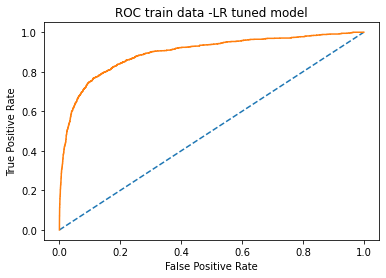

In [189]:
# AUC for the training data

# predict probabilities
probs = lr_model_level_2.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_l2_train_probs = probs[:, 1]
# calculate AUC
lr_l2_auc_train = roc_auc_score(y_train, lr_l2_train_probs)
print('AUC_train: %.3f' % lr_l1_auc_train)

# calculate roc curve
lr_l2_train_fpr,lr_l2_train_tpr,lr_l2_train_thresholds = roc_curve(y_train, lr_l2_train_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_l2_train_fpr,lr_l2_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC train data -LR tuned model')
plt.show()

In [190]:
# Accuracy - Test Data 
lr_l2_test_acc=lr_model_level_2.score(X_test, y_test)
lr_l2_test_acc

0.8969804618117229

AUC_test: 0.882


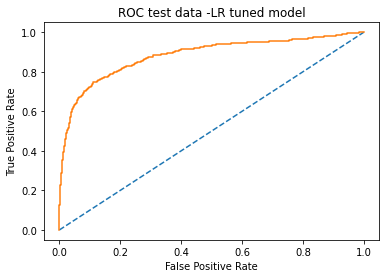

In [191]:
# AUC for the test data

# predict probabilities
probs = lr_model_level_2.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_l2_test_probs = probs[:, 1]
# calculate AUC
lr_l2_auc_test = roc_auc_score(y_test, lr_l2_test_probs)
print('AUC_test: %.3f' % lr_l2_auc_test)

# calculate roc curve
lr_l2_test_fpr,lr_l2_test_tpr,lr_l2_test_thresholds = roc_curve(y_test, lr_l2_test_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_l2_test_fpr,lr_l2_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC test data -LR tuned model')
plt.show()

C:\Users\91866\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.92      0.96      0.94      6556
           1       0.76      0.56      0.65      1326

    accuracy                           0.90      7882
   macro avg       0.84      0.76      0.79      7882
weighted avg       0.89      0.90      0.89      7882
 



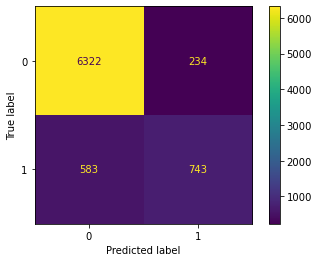

In [192]:
## Confusion matrix on the training data

plot_confusion_matrix(lr_model_level_2,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

C:\Users\91866\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2808
           1       0.76      0.56      0.65       570

    accuracy                           0.90      3378
   macro avg       0.84      0.76      0.79      3378
weighted avg       0.89      0.90      0.89      3378
 



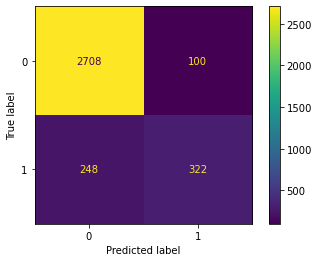

In [193]:
## Confusion matrix on the test data

plot_confusion_matrix(lr_model_level_2,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

#### 1.b Tuned LDA Model

In [194]:
# Checking the VIF
calc_vif(X_lr).sort_values(by = 'VIF', ascending = False)

variables        VIF
17             Service_Score_3.0  13.826731
16             Service_Score_2.0   8.368006
21  account_segment_Regular Plus   6.944092
18             Service_Score_4.0   6.839174
11            Payment_Debit Card   4.839605
28        Marital_Status_Married   4.339686
22         account_segment_Super   4.228470
6                       cashback   4.183592
10           Payment_Credit Card   3.926101
31           Login_device_Mobile   3.066247
29         Marital_Status_Single   2.918501
14                   Gender_Male   2.477525
12              Payment_E wallet   2.431728
25            CC_Agent_Score_3.0   2.369082
9                  City_Tier_3.0   2.173271
4        coupon_used_for_payment   2.071958
7            Cashback_per_coupon   1.920262
27            CC_Agent_Score_5.0   1.889348
26            CC_Agent_Score_4.0   1.871910
13                   Payment_UPI   1.828279
23    account_segment_Super Plus   1.767441
20       account_segment_Regular   1.612407
24            CC_Agent_Score_2.0   1.589540
0                         Tenure   1.404827
30               Complain_ly_1.0   1.395591
5           Day_Since_CC_connect   1.323320
8                  City_Tier_2.0   1.200855
15             Service_Score_1.0   1.164406
2                  rev_per_month   1.153161
1                CC_Contacted_LY   1.042540
3                 rev_growth_yoy   1.032391
19             Service_Score_5.0   1.014463

In [195]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [196]:
# Applying GridSearchCV for Logistic Regression
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'tol' : [0.0001,0.0002,0.0003],
    'shrinkage' : ['auto', 'float', 'None']
}

lda = LinearDiscriminantAnalysis()

lda_grid_search = GridSearchCV(estimator = lda, param_grid = param_grid, cv = 10, n_jobs=2)

In [197]:
lda_grid_search.fit(X_train, y_train)

C:\Users\91866\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
210 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\91866\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91866\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 583, in fit
    raise NotImplementedError("shrinkage not supported")
NotImplementedError: shrinkage not supported

--------------------------------------------------------------------------------
60 fits failed with t

GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(), n_jobs=2,
             param_grid={'shrinkage': ['auto', 'float', 'None'],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 0.0002, 0.0003]})

In [198]:
print(lda_grid_search.best_params_,'\n')
print(lda_grid_search.best_estimator_)

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.0001} 

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')


In [199]:
lda_model_level_2 = lda_grid_search.best_estimator_

In [200]:
# Training Data Class Prediction
ytrain_predict = lda_model_level_2.predict(X_train)

# Test Data Class Prediction
ytest_predict = lda_model_level_2.predict(X_test)

In [201]:
## Getting the predicted classes and probs

ytest_predict_prob=lda_model_level_2.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.130568  0.869432
1  0.078008  0.921992
2  0.950515  0.049485
3  0.493333  0.506667
4  0.993581  0.006419

In [202]:
# Accuracy - Train Data 
lda_l2_train_acc=lda_model_level_2.score(X_train, y_train)
lda_l2_train_acc

0.8936818066480589

AUC_train: 0.895


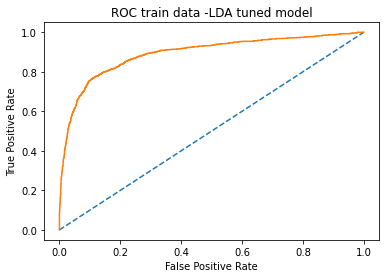

In [203]:
# AUC for the training data

# predict probabilities
probs = lda_model_level_2.predict_proba(X_train)
# keep probabilities for the positive outcome only
lda_l2_train_probs = probs[:, 1]
# calculate AUC
lda_l2_auc_train = roc_auc_score(y_train, lda_l2_train_probs)
print('AUC_train: %.3f' % lda_l1_auc_train)

# calculate roc curve
lda_l2_train_fpr,lda_l2_train_tpr,lda_l2_train_thresholds = roc_curve(y_train, lda_l2_train_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_l2_train_fpr,lda_l2_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC train data -LDA tuned model')
plt.show()

In [204]:
# Accuracy - Test Data 
lda_l2_test_acc=lda_model_level_2.score(X_test, y_test)
lda_l2_test_acc

0.8934280639431617

AUC_test: 0.878


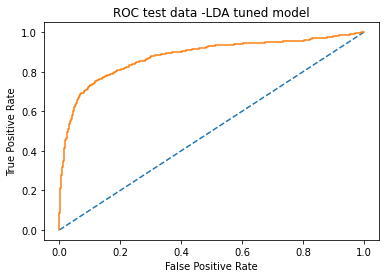

In [205]:
# AUC for the test data

# predict probabilities
probs = lda_model_level_2.predict_proba(X_test)
# keep probabilities for the positive outcome only
lda_l2_test_probs = probs[:, 1]
# calculate AUC
lda_l2_auc_test = roc_auc_score(y_test, lda_l2_test_probs)
print('AUC_test: %.3f' % lda_l2_auc_test)

# calculate roc curve
lda_l2_test_fpr,lda_l2_test_tpr,lda_l2_test_thresholds = roc_curve(y_test, lda_l2_test_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_l2_test_fpr,lda_l2_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC test data -LDA tuned model')
plt.show()

In [206]:
## Confusion matrix on the training data

plot_confusion_matrix(lda_model_level_2,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

C:\Users\91866\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.92      0.95      0.94      6556
           1       0.72      0.60      0.66      1326

    accuracy                           0.89      7882
   macro avg       0.82      0.78      0.80      7882
weighted avg       0.89      0.89      0.89      7882
 



C:\Users\91866\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2808
           1       0.73      0.58      0.65       570

    accuracy                           0.89      3378
   macro avg       0.82      0.77      0.79      3378
weighted avg       0.89      0.89      0.89      3378
 



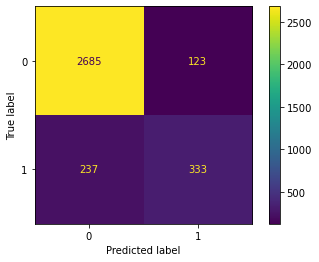

In [207]:
## Confusion matrix on the test data

plot_confusion_matrix(lda_model_level_2,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

#### 2. Tuned non-linear Models

#### 2.a Random Forest Classifier

In [208]:
X_rfcl = df_unscaled.copy()
X_rfcl = X_rfcl.drop(['Account_user_count','cluster_no'], axis=1)

In [209]:
# Split the data into train and test dataset
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_rfcl, y, test_size=0.30 , random_state=1)

In [210]:
param_grid = {
    'max_depth': [20],
    'max_features': [8],
    'min_samples_leaf': [1],
    'min_samples_split': [1,2,3,4],
    'n_estimators': [301]
}

rfcl = RandomForestClassifier(random_state=1)

rfcl_grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [211]:
# Fitting the data
rfcl_grid_search.fit(X_train, y_train)

C:\Users\91866\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\91866\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91866\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 442, in fit
    trees = Parallel(
  File "C:\Users\91866\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\91866\anaconda3\lib\site-packages\jobl

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [20], 'max_features': [8],
                         'min_samples_leaf': [1],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [301]})

In [212]:
print(rfcl_grid_search.best_params_,'\n')
print(rfcl_grid_search.best_estimator_)

{'max_depth': 20, 'max_features': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 301} 

RandomForestClassifier(max_depth=20, max_features=8, n_estimators=301,
                       random_state=1)


In [213]:
rfcl_model_level_2 = rfcl_grid_search.best_estimator_

In [214]:
# Training Data Class Prediction
ytrain_predict = rfcl_model_level_2.predict(X_train)

# Test Data Class Prediction
ytest_predict = rfcl_model_level_2.predict(X_test)

In [215]:
## Getting the predicted classes and probs

ytest_predict_prob=rfcl_model_level_2.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.365449  0.634551
1  0.076412  0.923588
2  0.990033  0.009967
3  0.920266  0.079734
4  0.996678  0.003322

In [216]:
# Accuracy - Train Data 
rfcl_l2_train_acc=rfcl_model_level_2.score(X_train, y_train)
rfcl_l2_train_acc

1.0

AUC_train: 0.994


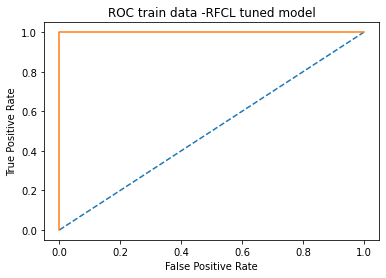

In [217]:
# AUC for the training data

# predict probabilities
probs = rfcl_model_level_2.predict_proba(X_train)
# keep probabilities for the positive outcome only
rfcl_l2_train_probs = probs[:, 1]
# calculate AUC
rfcl_l2_auc_train = roc_auc_score(y_train, rfcl_l2_train_probs)
print('AUC_train: %.3f' % rfcl_l1_auc_train)

# calculate roc curve
rfcl_l2_train_fpr,rfcl_l2_train_tpr,rfcl_l2_train_thresholds = roc_curve(y_train, rfcl_l2_train_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rfcl_l2_train_fpr,rfcl_l2_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC train data -RFCL tuned model')
plt.show()

In [218]:
# Accuracy - Test Data 
rfcl_l2_test_acc=rfcl_model_level_2.score(X_test, y_test)
rfcl_l2_test_acc

0.9689165186500888

AUC_test: 0.990


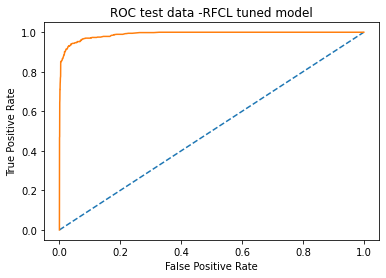

In [219]:
# AUC for the test data

# predict probabilities
probs = rfcl_model_level_2.predict_proba(X_test)
# keep probabilities for the positive outcome only
rfcl_l2_test_probs = probs[:, 1]
# calculate AUC
rfcl_l2_auc_test = roc_auc_score(y_test, rfcl_l2_test_probs)
print('AUC_test: %.3f' % rfcl_l2_auc_test)

# calculate roc curve
rfcl_l2_test_fpr,rfcl_l2_test_tpr,rfcl_l2_test_thresholds = roc_curve(y_test, rfcl_l2_test_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rfcl_l2_test_fpr,rfcl_l2_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC test data -RFCL tuned model')
plt.show()

In [220]:
## Confusion matrix on the training data

plot_confusion_matrix(rfcl_model_level_2,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

C:\Users\91866\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6556
           1       1.00      1.00      1.00      1326

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882
 



In [221]:
## Confusion matrix on the test data

plot_confusion_matrix(rfcl_model_level_2,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

C:\Users\91866\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2808
           1       0.98      0.84      0.90       570

    accuracy                           0.97      3378
   macro avg       0.97      0.92      0.94      3378
weighted avg       0.97      0.97      0.97      3378
 



#### 2.b MLP Classifier (ANN) 

In [222]:
# Split the data into train and test dataset
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_lr, y, test_size=0.30 , random_state=1)

In [223]:
param_grid = {
    'hidden_layer_sizes': [(500,500)],
    'activation': ['relu'],
    'solver': ['adam'],
    'tol': [0.01],
    'max_iter' : [1000]
}

mlp = MLPClassifier(random_state=1)

mlp_grid_search = GridSearchCV(estimator = mlp, param_grid = param_grid, cv = 10)

In [224]:
# Fitting the data
mlp_grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=1),
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [(500, 500)], 'max_iter': [1000],
                         'solver': ['adam'], 'tol': [0.01]})

In [225]:
print(mlp_grid_search.best_params_,'\n')
print(mlp_grid_search.best_estimator_)

{'activation': 'relu', 'hidden_layer_sizes': (500, 500), 'max_iter': 1000, 'solver': 'adam', 'tol': 0.01} 

MLPClassifier(hidden_layer_sizes=(500, 500), max_iter=1000, random_state=1,
              tol=0.01)


In [226]:
mlp_model_level_2 = mlp_grid_search.best_estimator_

In [227]:
# Training Data Class Prediction
ytrain_predict = mlp_model_level_2.predict(X_train)

# Test Data Class Prediction
ytest_predict = mlp_model_level_2.predict(X_test)

In [228]:
## Getting the predicted classes and probs

ytest_predict_prob=mlp_model_level_2.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0             1
0  0.999924  7.588724e-05
1  0.000006  9.999935e-01
2  1.000000  9.356349e-11
3  0.992644  7.356064e-03
4  1.000000  4.931816e-09

In [229]:
# Accuracy - Train Data 
mlp_l2_train_acc=mlp_model_level_2.score(X_train, y_train)
mlp_l2_train_acc

1.0

AUC_train: 0.999


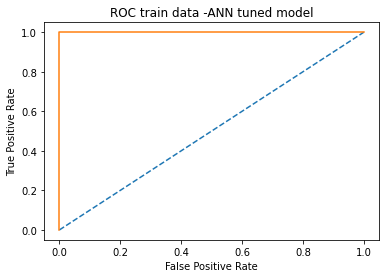

In [230]:
# AUC for the training data

# predict probabilities
probs = mlp_model_level_2.predict_proba(X_train)
# keep probabilities for the positive outcome only
mlp_l2_train_probs = probs[:, 1]
# calculate AUC
mlp_l2_auc_train = roc_auc_score(y_train, mlp_l2_train_probs)
print('AUC_train: %.3f' % mlp_l1_auc_train)

# calculate roc curve
mlp_l2_train_fpr,mlp_l2_train_tpr,mlp_l2_train_thresholds = roc_curve(y_train, mlp_l2_train_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(mlp_l2_train_fpr,mlp_l2_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC train data -ANN tuned model')
plt.show()

In [231]:
# Accuracy - Test Data 
mlp_l2_test_acc=mlp_model_level_2.score(X_test, y_test)
mlp_l2_test_acc

0.9689165186500888

AUC_test: 0.988


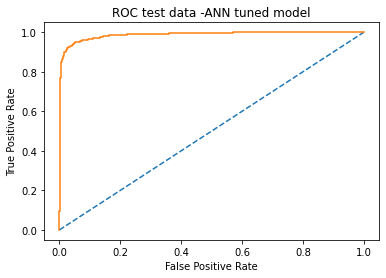

In [232]:
# AUC for the test data

# predict probabilities
probs = mlp_model_level_2.predict_proba(X_test)
# keep probabilities for the positive outcome only
mlp_l2_test_probs = probs[:, 1]
# calculate AUC
mlp_l2_auc_test = roc_auc_score(y_test, mlp_l2_test_probs)
print('AUC_test: %.3f' % mlp_l2_auc_test)

# calculate roc curve
mlp_l2_test_fpr,mlp_l2_test_tpr,mlp_l2_test_thresholds = roc_curve(y_test, mlp_l2_test_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(mlp_l2_test_fpr,mlp_l2_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC test data -ANN tuned model')
plt.show()

C:\Users\91866\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6556
           1       1.00      1.00      1.00      1326

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882
 



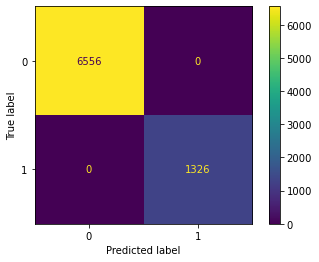

In [233]:
## Confusion matrix on the training data

plot_confusion_matrix(mlp_model_level_2,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

C:\Users\91866\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2808
           1       0.93      0.88      0.91       570

    accuracy                           0.97      3378
   macro avg       0.95      0.93      0.94      3378
weighted avg       0.97      0.97      0.97      3378
 



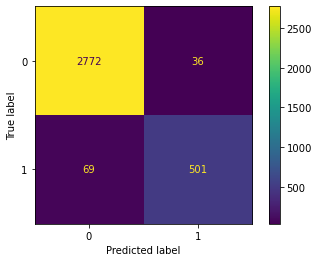

In [234]:
## Confusion matrix on the test data

plot_confusion_matrix(mlp_model_level_2,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

#### 3. Emsemble Models

#### 3.a Tuned Ada Boost

In [235]:
# Split the data into train and test dataset
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_unscaled, y, test_size=0.30 , random_state=1)

In [236]:
param_grid = {
    'n_estimators': [101],
    'algorithm': ['SAMME', 'SAMME.R'],
    'learning_rate' : [1]
}

adb = AdaBoostClassifier(random_state=1)

adb_grid_search = GridSearchCV(estimator = adb, param_grid = param_grid, cv = 5)

In [237]:
# Fitting the data
adb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [1], 'n_estimators': [101]})

In [238]:
print(adb_grid_search.best_params_,'\n')
print(adb_grid_search.best_estimator_)

{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 101} 

AdaBoostClassifier(learning_rate=1, n_estimators=101, random_state=1)


In [239]:
adb_model_level_2 = adb_grid_search.best_estimator_

In [240]:
# Training Data Class Prediction
ytrain_predict = adb_model_level_2.predict(X_train)

# Test Data Class Prediction
ytest_predict = adb_model_level_2.predict(X_test)

In [241]:
## Getting the predicted classes and probs

ytest_predict_prob=adb_model_level_2.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.498421  0.501579
1  0.494574  0.505426
2  0.506575  0.493425
3  0.500906  0.499094
4  0.515480  0.484520

In [242]:
# Accuracy - Train Data 
adb_l2_train_acc=adb_model_level_2.score(X_train, y_train)
adb_l2_train_acc

0.9012940877949759

AUC_train: 0.923


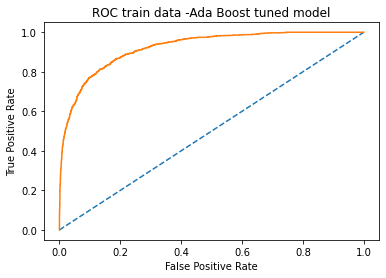

In [243]:
# AUC for the training data

# predict probabilities
probs = adb_model_level_2.predict_proba(X_train)
# keep probabilities for the positive outcome only
adb_l2_train_probs = probs[:, 1]
# calculate AUC
adb_l2_auc_train = roc_auc_score(y_train, adb_l2_train_probs)
print('AUC_train: %.3f' % adb_l1_auc_train)

# calculate roc curve
adb_l2_train_fpr,adb_l2_train_tpr,adb_l2_train_thresholds = roc_curve(y_train, adb_l2_train_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adb_l2_train_fpr,adb_l2_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC train data -Ada Boost tuned model')
plt.show()

In [244]:
# Accuracy - Test Data 
adb_l2_test_acc=adb_model_level_2.score(X_test, y_test)
adb_l2_test_acc

0.9005328596802842

AUC_test: 0.910


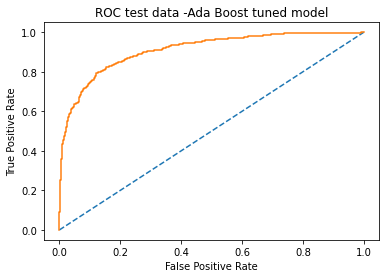

In [245]:
# AUC for the test data

# predict probabilities
probs = adb_model_level_2.predict_proba(X_test)
# keep probabilities for the positive outcome only
adb_l2_test_probs = probs[:, 1]
# calculate AUC
adb_l2_auc_test = roc_auc_score(y_test, adb_l2_test_probs)
print('AUC_test: %.3f' % adb_l2_auc_test)

# calculate roc curve
adb_l2_test_fpr,adb_l2_test_tpr,adb_l2_test_thresholds = roc_curve(y_test, adb_l2_test_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adb_l2_test_fpr,adb_l2_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC test data -Ada Boost tuned model')
plt.show()

C:\Users\91866\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.92      0.96      0.94      6556
           1       0.76      0.60      0.67      1326

    accuracy                           0.90      7882
   macro avg       0.84      0.78      0.81      7882
weighted avg       0.90      0.90      0.90      7882
 



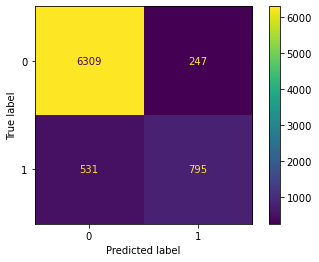

In [246]:
## Confusion matrix on the training data

plot_confusion_matrix(adb_model_level_2,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

C:\Users\91866\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2808
           1       0.76      0.59      0.67       570

    accuracy                           0.90      3378
   macro avg       0.84      0.78      0.80      3378
weighted avg       0.89      0.90      0.90      3378
 



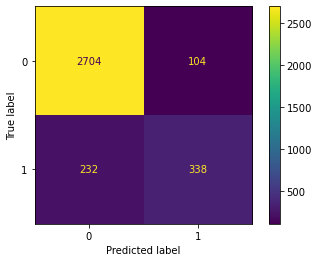

In [247]:
## Confusion matrix on the test data

plot_confusion_matrix(adb_model_level_2,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

#### 3.b Tuned XGBoost Model

In [248]:
# Split the data into train and test dataset
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_unscaled, y, test_size=0.30 , random_state=1)

In [249]:
param_grid = {
    'n_estimators': [701],
    'learning_rate':[0.1],
    'max_depth': [15],
    'min_child_weight':[1],
    'gamma':[0.5],
    'subsample':[0.8],
    'colsample':[0.8],
    'scale_pos_weight':[1]
}

xgb = XGBClassifier(random_state=1)

xgb_grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid, cv = 10)

In [250]:
# Fitting the data
xgb_grid_search.fit(X_train, y_train)

[11:35:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:36:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:36:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample" } might not be used.

  This could b

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                        

In [251]:
print(xgb_grid_search.best_params_,'\n')
print(xgb_grid_search.best_estimator_)

{'colsample': 0.8, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 15, 'min_child_weight': 1, 'n_estimators': 701, 'scale_pos_weight': 1, 'subsample': 0.8} 

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None, colsample=0.8,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=701,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, ...)


In [252]:
xgb_model_level_2 = xgb_grid_search.best_estimator_

In [253]:
# Training Data Class Prediction
ytrain_predict = xgb_model_level_2.predict(X_train)

# Test Data Class Prediction
ytest_predict = xgb_model_level_2.predict(X_test)

In [254]:
## Getting the predicted classes and probs

ytest_predict_prob=xgb_model_level_2.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.795478  0.204522
1  0.018513  0.981487
2  0.997493  0.002507
3  0.948890  0.051110
4  0.999847  0.000153

In [324]:
print (pd.DataFrame(xgb_model_level_2.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                   Imp
Tenure                        0.148372
Complain_ly_1.0               0.078922
Marital_Status_Married        0.057730
CC_Agent_Score_2.0            0.045585
account_segment_Regular Plus  0.044637
account_segment_Super         0.043551
Payment_E wallet              0.039239
Payment_UPI                   0.031564
City_Tier_3.0                 0.030256
Payment_Credit Card           0.030142
account_segment_Super Plus    0.029890
Login_device_Mobile           0.027340
rev_per_month                 0.026787
Account_user_count            0.025055
CC_Agent_Score_4.0            0.024756
cluster_no                    0.024726
City_Tier_2.0                 0.022510
Day_Since_CC_connect          0.022502
coupon_used_for_payment       0.022466
Payment_Debit Card            0.021407
CC_Agent_Score_5.0            0.021123
CC_Agent_Score_3.0            0.021010
account_segment_Regular       0.019929
Gender_Male                   0.019322
rev_growth_yoy           

In [255]:
# Accuracy - Train Data 
xgb_l2_train_acc=xgb_model_level_2.score(X_train, y_train)
xgb_l2_train_acc

1.0

AUC_train: 1.000


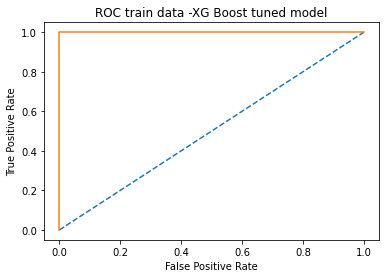

In [256]:
# AUC for the training data

# predict probabilities
probs = xgb_model_level_2.predict_proba(X_train)
# keep probabilities for the positive outcome only
xgb_l2_train_probs = probs[:, 1]
# calculate AUC
xgb_l2_auc_train = roc_auc_score(y_train, xgb_l2_train_probs)
print('AUC_train: %.3f' % xgb_l1_auc_train)

# calculate roc curve
xgb_l2_train_fpr,xgb_l2_train_tpr,xgb_l2_train_thresholds = roc_curve(y_train, xgb_l2_train_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(xgb_l2_train_fpr,xgb_l2_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC train data -XG Boost tuned model')
plt.show()

In [257]:
# Accuracy - Test Data 
xgb_l2_test_acc=xgb_model_level_2.score(X_test, y_test)
xgb_l2_test_acc

0.9757252812314979

AUC_test: 0.991


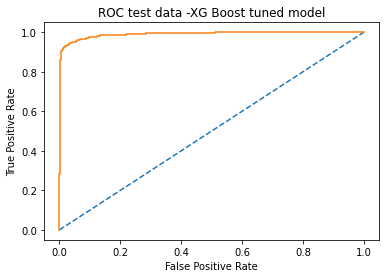

In [258]:
# AUC for the test data

# predict probabilities
probs = xgb_model_level_2.predict_proba(X_test)
# keep probabilities for the positive outcome only
xgb_l2_test_probs = probs[:, 1]
# calculate AUC
xgb_l2_auc_test = roc_auc_score(y_test, xgb_l2_test_probs)
print('AUC_test: %.3f' % xgb_l2_auc_test)

# calculate roc curve
xgb_l2_test_fpr,xgb_l2_test_tpr,xgb_l2_test_thresholds = roc_curve(y_test, xgb_l2_test_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(xgb_l2_test_fpr,xgb_l2_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC test data -XG Boost tuned model')
plt.show()

C:\Users\91866\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6556
           1       1.00      1.00      1.00      1326

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882
 



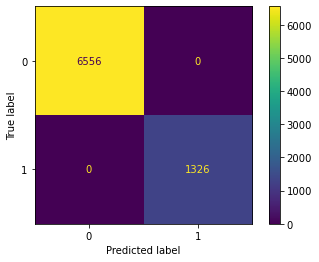

In [259]:
## Confusion matrix on the training data

plot_confusion_matrix(xgb_model_level_2,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

C:\Users\91866\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2808
           1       0.98      0.88      0.92       570

    accuracy                           0.98      3378
   macro avg       0.98      0.94      0.95      3378
weighted avg       0.98      0.98      0.98      3378
 



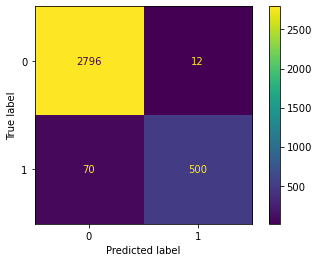

In [260]:
## Confusion matrix on the test data

plot_confusion_matrix(xgb_model_level_2,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

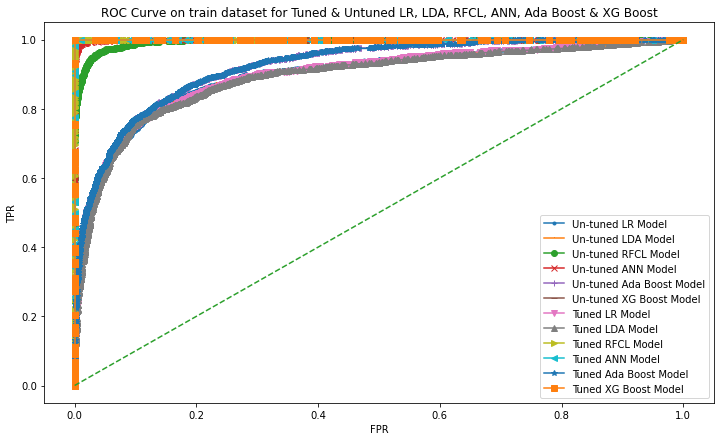

In [261]:
# ROC Curves for all un-tuned models on train dataset
# AUC Comparison
models=[LR_model_level_1 , LDA_model_level_1, rfcl_model_level_1, mlp_model_level_1, adb_model_level_1, xgb_model_level_1,
       lr_model_level_2 , lda_model_level_2, rfcl_model_level_2, mlp_model_level_2, adb_model_level_2, xgb_model_level_2]

models_names={LR_model_level_1 : 'Un-tuned LR Model', LDA_model_level_1 : 'Un-tuned LDA Model', 
              rfcl_model_level_1 : 'Un-tuned RFCL Model', mlp_model_level_1 : 'Un-tuned ANN Model', 
              adb_model_level_1 : 'Un-tuned Ada Boost Model', xgb_model_level_1 : 'Un-tuned XG Boost Model',
             lr_model_level_2 : 'Tuned LR Model', lda_model_level_2 : 'Tuned LDA Model', 
              rfcl_model_level_2 : 'Tuned RFCL Model', mlp_model_level_2 : 'Tuned ANN Model', 
              adb_model_level_2 : 'Tuned Ada Boost Model', xgb_model_level_2 : 'Tuned XG Boost Model'}

plt.figure(figsize=(12,7))
lr_l1_train_fpr,lr_l1_train_tpr,lr_l1_train_thresholds = roc_curve(y_train, lr_l1_train_probs)
plt.plot(lr_l1_train_fpr,lr_l1_train_tpr,marker='.')

lda_l1_train_fpr,lda_l1_train_tpr,lda_l1_train_thresholds = roc_curve(y_train, lda_l1_train_probs)
plt.plot(lda_l1_train_fpr,lda_l1_train_tpr,marker=',')

rfcl_l1_train_fpr,rfcl_l1_train_tpr,rfcl_l1_train_thresholds = roc_curve(y_train, rfcl_l1_train_probs)
plt.plot(rfcl_l1_train_fpr,rfcl_l1_train_tpr,marker='o')

mlp_l1_train_fpr,mlp_l1_train_tpr,mlp_l1_train_thresholds = roc_curve(y_train, mlp_l1_train_probs)
plt.plot(mlp_l1_train_fpr,mlp_l1_train_tpr,marker='x')

adb_l1_train_fpr,adb_l1_train_tpr,adb_l1_train_thresholds = roc_curve(y_train, adb_l1_train_probs)
plt.plot(adb_l1_train_fpr,adb_l1_train_tpr,marker='+')

xgb_l1_train_fpr,xgb_l1_train_tpr,xgb_l1_train_thresholds = roc_curve(y_train, xgb_l1_train_probs)
plt.plot(xgb_l1_train_fpr,xgb_l1_train_tpr,marker='_')

lr_l2_train_fpr,lr_l2_train_tpr,lr_l2_train_thresholds = roc_curve(y_train, lr_l2_train_probs)
plt.plot(lr_l2_train_fpr,lr_l2_train_tpr,marker='v')

lda_l2_train_fpr,lda_l2_train_tpr,lda_l2_train_thresholds = roc_curve(y_train, lda_l2_train_probs)
plt.plot(lda_l2_train_fpr,lda_l2_train_tpr,marker='^')

rfcl_l2_train_fpr,rfcl_l2_train_tpr,rfcl_l2_train_thresholds = roc_curve(y_train, rfcl_l2_train_probs)
plt.plot(rfcl_l2_train_fpr,rfcl_l2_train_tpr,marker='>')

mlp_l2_train_fpr,mlp_l2_train_tpr,mlp_l2_train_thresholds = roc_curve(y_train, mlp_l2_train_probs)
plt.plot(mlp_l2_train_fpr,mlp_l2_train_tpr,marker='<')

adb_l2_train_fpr,adb_l2_train_tpr,adb_l2_train_thresholds = roc_curve(y_train, adb_l2_train_probs)
plt.plot(adb_l2_train_fpr,adb_l2_train_tpr,marker='*')

xgb_l2_train_fpr,xgb_l2_train_tpr,xgb_l2_train_thresholds = roc_curve(y_train, xgb_l2_train_probs)
plt.plot(xgb_l2_train_fpr,xgb_l2_train_tpr,marker='s')


plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC Curve on train dataset for {}'.format('Tuned & Untuned LR, LDA, RFCL, ANN, Ada Boost & XG Boost'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()


In [262]:
# ROC Curves for all un-tuned models on test dataset
# AUC Comparison
models=[LR_model_level_1 , LDA_model_level_1, rfcl_model_level_1, mlp_model_level_1, adb_model_level_1, xgb_model_level_1,
       lr_model_level_2 , lda_model_level_2, rfcl_model_level_2, mlp_model_level_2, adb_model_level_2, xgb_model_level_2]

models_names={LR_model_level_1 : 'Un-tuned LR Model', LDA_model_level_1 : 'Un-tuned LDA Model', 
              rfcl_model_level_1 : 'Un-tuned RFCL Model', mlp_model_level_1 : 'Un-tuned ANN Model', 
              adb_model_level_1 : 'Un-tuned Ada Boost Model', xgb_model_level_1 : 'Un-tuned XG Boost Model',
             lr_model_level_2 : 'Tuned LR Model', lda_model_level_2 : 'Tuned LDA Model', 
              rfcl_model_level_2 : 'Tuned RFCL Model', mlp_model_level_2 : 'Tuned ANN Model', 
              adb_model_level_2 : 'Tuned Ada Boost Model', xgb_model_level_2 : 'Tuned XG Boost Model'}

plt.figure(figsize=(12,7))
lr_l1_test_fpr,lr_l1_test_tpr,lr_l1_test_thresholds = roc_curve(y_test, lr_l1_test_probs)
plt.plot(lr_l1_test_fpr,lr_l1_test_tpr,marker='.')

lda_l1_test_fpr,lda_l1_test_tpr,lda_l1_test_thresholds = roc_curve(y_test, lda_l1_test_probs)
plt.plot(lda_l1_test_fpr,lda_l1_test_tpr,marker=',')

rfcl_l1_test_fpr,rfcl_l1_test_tpr,rfcl_l1_test_thresholds = roc_curve(y_test, rfcl_l1_test_probs)
plt.plot(rfcl_l1_test_fpr,rfcl_l1_test_tpr,marker='o')

mlp_l1_test_fpr,mlp_l1_test_tpr,mlp_l1_test_thresholds = roc_curve(y_test, mlp_l1_test_probs)
plt.plot(mlp_l1_test_fpr,mlp_l1_test_tpr,marker='x')

adb_l1_test_fpr,adb_l1_test_tpr,adb_l1_test_thresholds = roc_curve(y_test, adb_l1_test_probs)
plt.plot(adb_l1_test_fpr,adb_l1_test_tpr,marker='+')

xgb_l1_test_fpr,xgb_l1_test_tpr,xgb_l1_test_thresholds = roc_curve(y_test, xgb_l1_test_probs)
plt.plot(xgb_l1_test_fpr,xgb_l1_test_tpr,marker='_')

lr_l2_test_fpr,lr_l2_test_tpr,lr_l2_test_thresholds = roc_curve(y_test, lr_l2_test_probs)
plt.plot(lr_l2_test_fpr,lr_l2_test_tpr,marker='v')

lda_l2_test_fpr,lda_l2_test_tpr,lda_l2_test_thresholds = roc_curve(y_test, lda_l2_test_probs)
plt.plot(lda_l2_test_fpr,lda_l2_test_tpr,marker='^')

rfcl_l2_test_fpr,rfcl_l2_test_tpr,rfcl_l2_test_thresholds = roc_curve(y_test, rfcl_l2_test_probs)
plt.plot(rfcl_l2_test_fpr,rfcl_l2_test_tpr,marker='>')

mlp_l2_test_fpr,mlp_l2_test_tpr,mlp_l2_test_thresholds = roc_curve(y_test, mlp_l2_test_probs)
plt.plot(mlp_l2_test_fpr,mlp_l2_test_tpr,marker='<')

adb_l2_test_fpr,adb_l2_test_tpr,adb_l2_test_thresholds = roc_curve(y_test, adb_l2_test_probs)
plt.plot(adb_l2_test_fpr,adb_l2_test_tpr,marker='*')

xgb_l2_test_fpr,xgb_l2_test_tpr,xgb_l2_test_thresholds = roc_curve(y_test, xgb_l2_test_probs)
plt.plot(xgb_l2_test_fpr,xgb_l2_test_tpr,marker='s')


plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC Curve on test dataset for {}'.format('Tuned & Untuned LR, LDA, RFCL, ANN, Ada Boost & XG Boost'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()

### Level 3 Tuned Models with SMOTE

#### 1. Tuned Linear Models with SMOTE

#### 1.a SMOTE Logistic Regression

In [263]:
# Split the data into train and test dataset
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_lr, y, test_size=0.30 , random_state=1)

In [264]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=1)
X_res_scaled, y_res_scaled = sm.fit_resample(X_train, y_train)

In [265]:
lr_smote = lr_model_level_2.fit(X_res_scaled, y_res_scaled)

In [266]:
pred_train_smote = lr_smote.predict(X_res_scaled)
pred_test_smote = lr_smote.predict(X_test)

In [267]:
# Accuracy of Train Data
lr_smote_train_acc = lr_smote.score(X_res_scaled, y_res_scaled)
print('Accuracy : {}'.format(lr_smote_train_acc))

Accuracy : 0.8540268456375839


AUC_train: 0.928


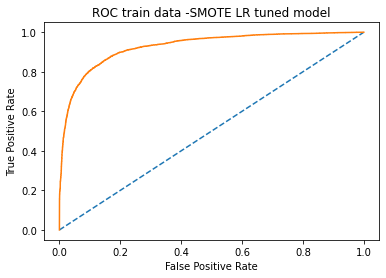

In [268]:
# AUC for the training data

# predict probabilities
probs = lr_smote.predict_proba(X_res_scaled)
# keep probabilities for the positive outcome only
lr_smote_train_probs = probs[:, 1]
# calculate AUC
lr_smote_auc_train = roc_auc_score(y_res_scaled, lr_smote_train_probs)
print('AUC_train: %.3f' % lr_smote_auc_train)

# calculate roc curve
lr_smote_train_fpr,lr_smote_train_tpr,lr_smote_train_thresholds = roc_curve(y_res_scaled, lr_smote_train_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_smote_train_fpr,lr_smote_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC train data -SMOTE LR tuned model')
plt.show()

In [269]:
# Accuracy - Test Data 
lr_smote_test_acc=lr_smote.score(X_test, y_test)
lr_smote_test_acc

0.8380698638247484

AUC_test: 0.867


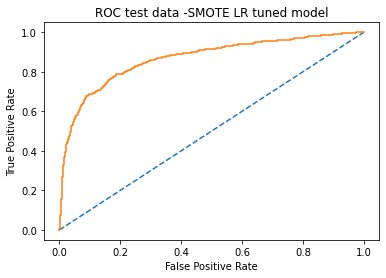

In [270]:
# AUC for the test data

# predict probabilities
probs = lr_smote.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_smote_test_probs = probs[:, 1]
# calculate AUC
lr_smote_test_auc = roc_auc_score(y_test, lr_smote_test_probs)
print('AUC_test: %.3f' % lr_smote_test_auc)

# calculate roc curve
lr_smote_test_fpr,lr_smote_test_tpr,lr_smote_test_thresholds = roc_curve(y_test, lr_smote_test_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_smote_test_fpr,lr_smote_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC test data -SMOTE LR tuned model')
plt.show()

C:\Users\91866\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.85      0.86      0.85      6556
           1       0.86      0.85      0.85      6556

    accuracy                           0.85     13112
   macro avg       0.85      0.85      0.85     13112
weighted avg       0.85      0.85      0.85     13112
 



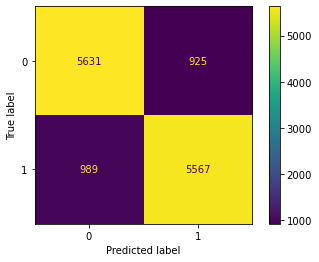

In [271]:
## Confusion matrix on the training data

plot_confusion_matrix(lr_smote,X_res_scaled,y_res_scaled)
print(classification_report(y_res_scaled, pred_train_smote),'\n');

C:\Users\91866\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.94      0.86      0.90      2808
           1       0.51      0.71      0.60       570

    accuracy                           0.84      3378
   macro avg       0.73      0.79      0.75      3378
weighted avg       0.87      0.84      0.85      3378
 



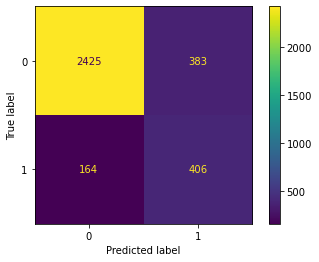

In [272]:
## Confusion matrix on the test data

plot_confusion_matrix(lr_smote,X_test,y_test)
print(classification_report(y_test, pred_test_smote),'\n');

#### 1.b SMOTE LDA Model

In [273]:
lda_smote = lda_model_level_2.fit(X_res_scaled, y_res_scaled)

In [274]:
pred_train_smote = lda_smote.predict(X_res_scaled)
pred_test_smote = lda_smote.predict(X_test)

In [275]:
# Accuracy of Train Data
lda_smote_train_acc = lda_smote.score(X_res_scaled, y_res_scaled)
print('Accuracy : {}'.format(lda_smote_train_acc))

Accuracy : 0.8522727272727273


AUC_train: 0.923


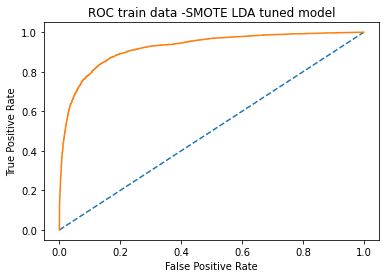

In [276]:
# AUC for the training data

# predict probabilities
probs = lda_smote.predict_proba(X_res_scaled)
# keep probabilities for the positive outcome only
lda_smote_train_probs = probs[:, 1]
# calculate AUC
lda_smote_auc_train = roc_auc_score(y_res_scaled, lda_smote_train_probs)
print('AUC_train: %.3f' % lda_smote_auc_train)

# calculate roc curve
lda_smote_train_fpr,lda_smote_train_tpr,lda_smote_train_thresholds = roc_curve(y_res_scaled, lda_smote_train_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_smote_train_fpr,lda_smote_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC train data -SMOTE LDA tuned model')
plt.show()

In [277]:
# Accuracy - Test Data 
lda_smote_test_acc=lda_smote.score(X_test, y_test)
lda_smote_test_acc

0.8410301953818827

AUC_test: 0.870


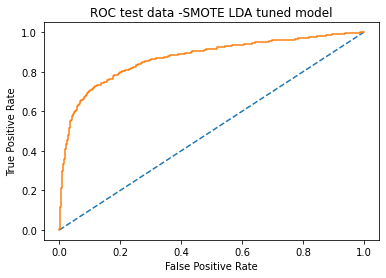

In [278]:
# AUC for the test data

# predict probabilities
probs = lda_smote.predict_proba(X_test)
# keep probabilities for the positive outcome only
lda_smote_test_probs = probs[:, 1]
# calculate AUC
lda_smote_test_auc = roc_auc_score(y_test, lda_smote_test_probs)
print('AUC_test: %.3f' % lda_smote_test_auc)

# calculate roc curve
lda_smote_test_fpr,lda_smote_test_tpr,lda_smote_test_thresholds = roc_curve(y_test, lda_smote_test_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_smote_test_fpr,lda_smote_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC test data -SMOTE LDA tuned model')
plt.show()

C:\Users\91866\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.85      0.86      0.85      6556
           1       0.86      0.85      0.85      6556

    accuracy                           0.85     13112
   macro avg       0.85      0.85      0.85     13112
weighted avg       0.85      0.85      0.85     13112
 



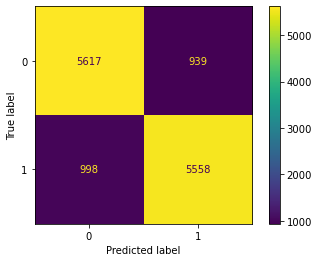

In [279]:
## Confusion matrix on the training data

plot_confusion_matrix(lda_smote,X_res_scaled,y_res_scaled)
print(classification_report(y_res_scaled, pred_train_smote),'\n');

C:\Users\91866\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.94      0.86      0.90      2808
           1       0.52      0.74      0.61       570

    accuracy                           0.84      3378
   macro avg       0.73      0.80      0.76      3378
weighted avg       0.87      0.84      0.85      3378
 



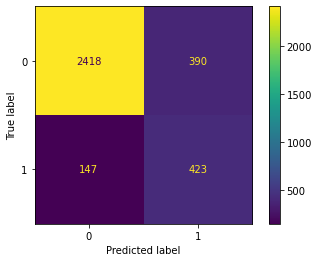

In [280]:
## Confusion matrix on the test data

plot_confusion_matrix(lda_smote,X_test,y_test)
print(classification_report(y_test, pred_test_smote),'\n');

#### 2.Tuned non-linear models with SMOTE

#### 2.a SMOTE Random Forest

In [281]:
# Split the data into train and test dataset
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_unscaled, y, test_size=0.30 , random_state=1)

In [282]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=1)
X_res_unscaled, y_res_unscaled = sm.fit_resample(X_train, y_train)

In [283]:
rfcl_smote = rfcl_model_level_2.fit(X_res_unscaled, y_res_unscaled)

In [284]:
rfcl_smote.n_features_

C:\Users\91866\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


34

In [285]:
pred_train_smote = rfcl_smote.predict(X_res_unscaled)
pred_test_smote = rfcl_smote.predict(X_test)

In [286]:
# Accuracy of Train Data
rfcl_smote_train_acc = rfcl_smote.score(X_res_unscaled, y_res_unscaled)
print('Accuracy for train data Random Forest Model is {}'.format(rfcl_smote_train_acc))

Accuracy for train data Random Forest Model is 1.0


AUC_train: 1.000


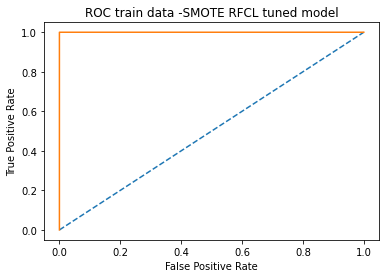

In [287]:
# AUC for the training data

# predict probabilities
probs = rfcl_smote.predict_proba(X_res_unscaled)
# keep probabilities for the positive outcome only
rfcl_smote_train_probs = probs[:, 1]
# calculate AUC
rfcl_smote_auc_train = roc_auc_score(y_res_unscaled, rfcl_smote_train_probs)
print('AUC_train: %.3f' % rfcl_smote_auc_train)

# calculate roc curve
rfcl_smote_train_fpr,rfcl_smote_train_tpr,rfcl_smote_train_thresholds = roc_curve(y_res_unscaled, rfcl_smote_train_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rfcl_smote_train_fpr,rfcl_smote_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC train data -SMOTE RFCL tuned model')
plt.show()

In [288]:
# Accuracy - Test Data 
rfcl_smote_test_acc=rfcl_smote.score(X_test, y_test)
rfcl_smote_test_acc

0.9591474245115453

AUC_test: 0.986


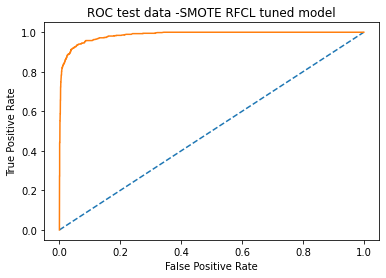

In [289]:
# AUC for the test data

# predict probabilities
probs = rfcl_smote.predict_proba(X_test)
# keep probabilities for the positive outcome only
rfcl_smote_test_probs = probs[:, 1]
# calculate AUC
rfcl_smote_test_auc = roc_auc_score(y_test, rfcl_smote_test_probs)
print('AUC_test: %.3f' % rfcl_smote_test_auc)

# calculate roc curve
rfcl_smote_test_fpr,rfcl_smote_test_tpr,rfcl_smote_test_thresholds = roc_curve(y_test, rfcl_smote_test_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rfcl_smote_test_fpr,rfcl_smote_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC test data -SMOTE RFCL tuned model')
plt.show()

C:\Users\91866\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6556
           1       1.00      1.00      1.00      6556

    accuracy                           1.00     13112
   macro avg       1.00      1.00      1.00     13112
weighted avg       1.00      1.00      1.00     13112
 



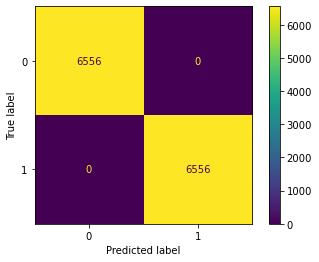

In [290]:
## Confusion matrix on the training data

plot_confusion_matrix(rfcl_smote,X_res_unscaled,y_res_unscaled)
print(classification_report(y_res_unscaled, pred_train_smote),'\n');

C:\Users\91866\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2808
           1       0.89      0.87      0.88       570

    accuracy                           0.96      3378
   macro avg       0.93      0.92      0.93      3378
weighted avg       0.96      0.96      0.96      3378
 



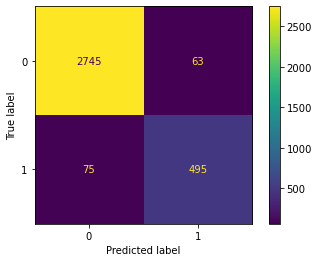

In [291]:
## Confusion matrix on the test data

plot_confusion_matrix(rfcl_smote,X_test,y_test)
print(classification_report(y_test, pred_test_smote),'\n');

#### 2.b SMOTE ANN

In [292]:
# Split the data into train and test dataset
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_lr, y, test_size=0.30 , random_state=1)

In [293]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=1)
X_res_scaled, y_res_scaled = sm.fit_resample(X_train, y_train)

In [294]:
mlp_smote = mlp_model_level_2.fit(X_res_scaled, y_res_scaled)

In [295]:
pred_train_smote = mlp_smote.predict(X_res_scaled)
pred_test_smote = mlp_smote.predict(X_test)

In [296]:
# Accuracy of Train Data
mlp_smote_train_acc = mlp_smote.score(X_res_scaled, y_res_scaled)
print('Accuracy  {}'.format(mlp_smote_train_acc))

Accuracy  0.9999237339841367


AUC_train: 1.000


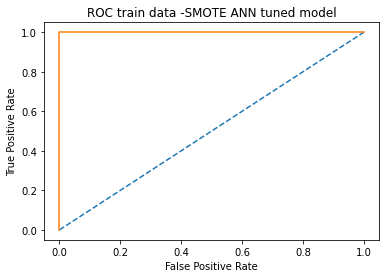

In [297]:
# AUC for the training data

# predict probabilities
probs = mlp_smote.predict_proba(X_res_scaled)
# keep probabilities for the positive outcome only
mlp_smote_train_probs = probs[:, 1]
# calculate AUC
mlp_smote_auc_train = roc_auc_score(y_res_scaled, mlp_smote_train_probs)
print('AUC_train: %.3f' % mlp_smote_auc_train)

# calculate roc curve
mlp_smote_train_fpr,mlp_smote_train_tpr,mlp_smote_train_thresholds = roc_curve(y_res_scaled, mlp_smote_train_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(mlp_smote_train_fpr,mlp_smote_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC train data -SMOTE ANN tuned model')
plt.show()

In [298]:
# Accuracy - Test Data 
mlp_smote_test_acc=mlp_smote.score(X_test, y_test)
mlp_smote_test_acc

0.9606275902901125

AUC_test: 0.983


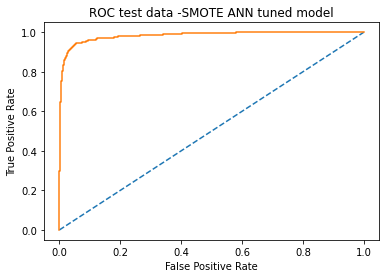

In [299]:
# AUC for the test data

# predict probabilities
probs = mlp_smote.predict_proba(X_test)
# keep probabilities for the positive outcome only
mlp_smote_test_probs = probs[:, 1]
# calculate AUC
mlp_smote_test_auc = roc_auc_score(y_test, mlp_smote_test_probs)
print('AUC_test: %.3f' % mlp_smote_test_auc)

# calculate roc curve
mlp_smote_test_fpr,mlp_smote_test_tpr,mlp_smote_test_thresholds = roc_curve(y_test, mlp_smote_test_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(mlp_smote_test_fpr,mlp_smote_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC test data -SMOTE ANN tuned model')
plt.show()

C:\Users\91866\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6556
           1       1.00      1.00      1.00      6556

    accuracy                           1.00     13112
   macro avg       1.00      1.00      1.00     13112
weighted avg       1.00      1.00      1.00     13112
 



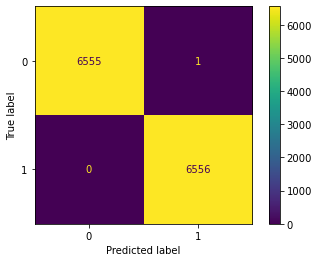

In [300]:
## Confusion matrix on the training data

plot_confusion_matrix(mlp_smote,X_res_scaled,y_res_scaled)
print(classification_report(y_res_scaled, pred_train_smote),'\n');

C:\Users\91866\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2808
           1       0.89      0.88      0.88       570

    accuracy                           0.96      3378
   macro avg       0.93      0.93      0.93      3378
weighted avg       0.96      0.96      0.96      3378
 



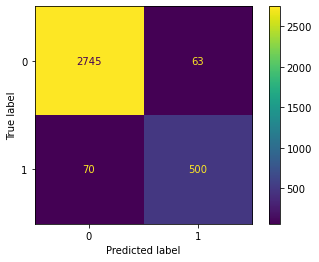

In [301]:
## Confusion matrix on the test data

plot_confusion_matrix(mlp_smote,X_test,y_test)
print(classification_report(y_test, pred_test_smote),'\n');

#### 3. Tuned Ensemble models with SMOTE

#### 3.a SMOTE Ada Boost

In [302]:
# Split the data into train and test dataset
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_unscaled, y, test_size=0.30 , random_state=1)

In [303]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=1)
X_res_unscaled, y_res_unscaled = sm.fit_resample(X_train, y_train)

In [304]:
adb_smote = adb_model_level_2.fit(X_res_unscaled, y_res_unscaled)

In [305]:
pred_train_smote = adb_smote.predict(X_res_unscaled)
pred_test_smote = adb_smote.predict(X_test)

In [306]:
# Accuracy of Train Data
adb_smote_train_acc = adb_smote.score(X_res_unscaled, y_res_unscaled)
print('Accuracy : {}'.format(adb_smote_train_acc))

Accuracy : 0.8879652226967664


AUC_train: 0.957


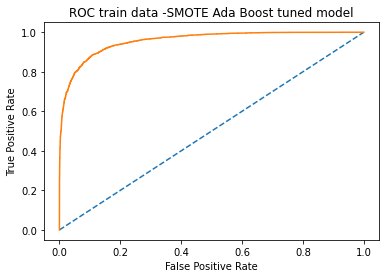

In [307]:
# AUC for the training data

# predict probabilities
probs = adb_smote.predict_proba(X_res_unscaled)
# keep probabilities for the positive outcome only
adb_smote_train_probs = probs[:, 1]
# calculate AUC
adb_smote_auc_train = roc_auc_score(y_res_unscaled, adb_smote_train_probs)
print('AUC_train: %.3f' % adb_smote_auc_train)

# calculate roc curve
adb_smote_train_fpr,adb_smote_train_tpr,adb_smote_train_thresholds = roc_curve(y_res_unscaled, adb_smote_train_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adb_smote_train_fpr,adb_smote_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC train data -SMOTE Ada Boost tuned model')
plt.show()

In [308]:
# Accuracy - Test Data 
adb_smote_test_acc=adb_smote.score(X_test, y_test)
adb_smote_test_acc

0.8747779751332149

AUC_test: 0.897


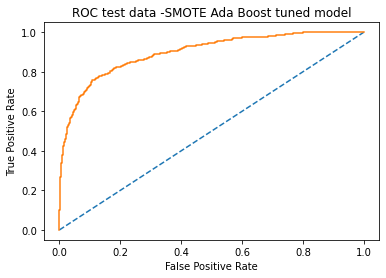

In [309]:
# AUC for the test data

# predict probabilities
probs = adb_smote.predict_proba(X_test)
# keep probabilities for the positive outcome only
adb_smote_test_probs = probs[:, 1]
# calculate AUC
adb_smote_test_auc = roc_auc_score(y_test, adb_smote_test_probs)
print('AUC_test: %.3f' % adb_smote_test_auc)

# calculate roc curve
adb_smote_test_fpr,adb_smote_test_tpr,adb_smote_test_thresholds = roc_curve(y_test, adb_smote_test_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adb_smote_test_fpr,adb_smote_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC test data -SMOTE Ada Boost tuned model')
plt.show()

C:\Users\91866\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.89      0.89      0.89      6556
           1       0.89      0.89      0.89      6556

    accuracy                           0.89     13112
   macro avg       0.89      0.89      0.89     13112
weighted avg       0.89      0.89      0.89     13112
 



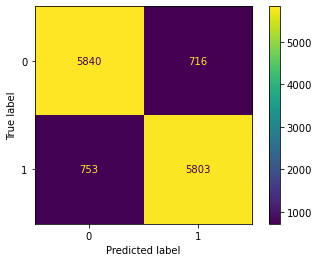

In [310]:
## Confusion matrix on the training data

plot_confusion_matrix(adb_smote,X_res_unscaled,y_res_unscaled)
print(classification_report(y_res_unscaled, pred_train_smote),'\n');

C:\Users\91866\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.94      0.91      0.92      2808
           1       0.61      0.72      0.66       570

    accuracy                           0.87      3378
   macro avg       0.78      0.81      0.79      3378
weighted avg       0.89      0.87      0.88      3378
 



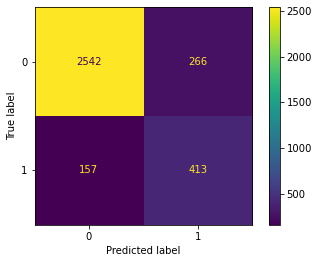

In [311]:
## Confusion matrix on the test data

plot_confusion_matrix(adb_smote,X_test,y_test)
print(classification_report(y_test, pred_test_smote),'\n');

#### 3.b SMOTE XG Boost

In [312]:
xgb_smote = xgb_model_level_2.fit(X_res_unscaled, y_res_unscaled)

[11:39:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [322]:
xgb_model_level_2.feature_importances_

array([0.148372  , 0.01574482, 0.02505472, 0.02678699, 0.01629988,
       0.02246635, 0.02250189, 0.01454002, 0.02472626, 0.0133518 ,
       0.02251005, 0.03025605, 0.03014215, 0.02140709, 0.0392394 ,
       0.03156354, 0.01932187, 0.        , 0.01517373, 0.01356537,
       0.01627071, 0.        , 0.01992918, 0.04463681, 0.04355144,
       0.02988957, 0.04558522, 0.02100976, 0.02475607, 0.02112343,
       0.05773009, 0.01623218, 0.07892191, 0.0273396 ], dtype=float32)

In [313]:
pred_train_smote = xgb_smote.predict(X_res_unscaled)
pred_test_smote = xgb_smote.predict(X_test)

In [314]:
# Accuracy of Train Data
xgb_smote_train_acc = xgb_smote.score(X_res_unscaled, y_res_unscaled)
print('Accuracy for train data Random Forest Model is {}'.format(xgb_smote_train_acc))

Accuracy for train data Random Forest Model is 1.0


AUC_train: 1.000


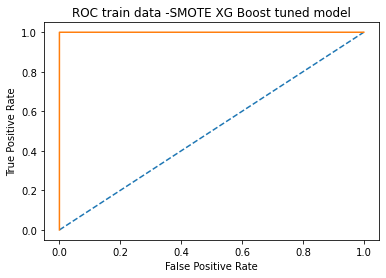

In [315]:
# AUC for the training data

# predict probabilities
probs = xgb_smote.predict_proba(X_res_unscaled)
# keep probabilities for the positive outcome only
xgb_smote_train_probs = probs[:, 1]
# calculate AUC
xgb_smote_auc_train = roc_auc_score(y_res_unscaled, xgb_smote_train_probs)
print('AUC_train: %.3f' % xgb_smote_auc_train)

# calculate roc curve
xgb_smote_train_fpr,xgb_smote_train_tpr,xgb_smote_train_thresholds = roc_curve(y_res_unscaled, xgb_smote_train_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(xgb_smote_train_fpr,xgb_smote_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC train data -SMOTE XG Boost tuned model')
plt.show()

In [316]:
# Accuracy - Test Data 
xgb_smote_test_acc=xgb_smote.score(X_test, y_test)
xgb_smote_test_acc

0.9677323860272351

AUC_test: 0.897


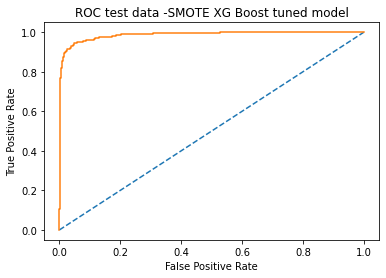

In [317]:
# AUC for the test data

# predict probabilities
probs = xgb_smote.predict_proba(X_test)
# keep probabilities for the positive outcome only
xgb_smote_test_probs = probs[:, 1]
# calculate AUC
xgb_smote_test_auc = roc_auc_score(y_test, xgb_smote_test_probs)
print('AUC_test: %.3f' % adb_smote_test_auc)

# calculate roc curve
xgb_smote_test_fpr,xgb_smote_test_tpr,xgb_smote_test_thresholds = roc_curve(y_test, xgb_smote_test_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(xgb_smote_test_fpr,xgb_smote_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC test data -SMOTE XG Boost tuned model')
plt.show()

C:\Users\91866\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6556
           1       1.00      1.00      1.00      6556

    accuracy                           1.00     13112
   macro avg       1.00      1.00      1.00     13112
weighted avg       1.00      1.00      1.00     13112
 



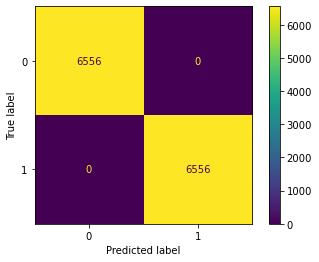

In [318]:
## Confusion matrix on the training data

plot_confusion_matrix(xgb_smote,X_res_unscaled,y_res_unscaled)
print(classification_report(y_res_unscaled, pred_train_smote),'\n');

C:\Users\91866\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2808
           1       0.93      0.88      0.90       570

    accuracy                           0.97      3378
   macro avg       0.95      0.93      0.94      3378
weighted avg       0.97      0.97      0.97      3378
 



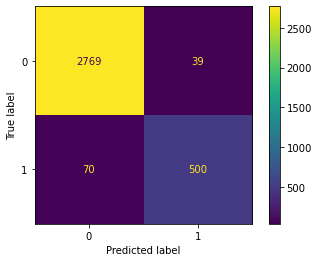

In [319]:
## Confusion matrix on the test data

plot_confusion_matrix(xgb_smote,X_test,y_test)
print(classification_report(y_test, pred_test_smote),'\n');

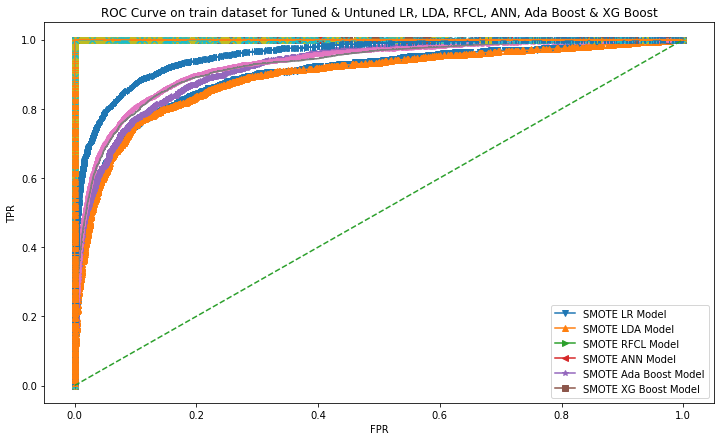

In [320]:
# ROC Curves for all un-tuned models on train dataset
# AUC Comparison
models=[lr_model_level_2 , lda_model_level_2, rfcl_model_level_2, mlp_model_level_2, adb_model_level_2, xgb_model_level_2,
       lr_smote , lda_smote, rfcl_smote, mlp_smote, adb_smote, xgb_smote,]

models_names={lr_model_level_2 : 'Tuned LR Model', lda_model_level_2 : 'Tuned LDA Model', 
              rfcl_model_level_2 : 'Tuned RFCL Model', mlp_model_level_2 : 'Tuned ANN Model', 
              adb_model_level_2 : 'Tuned Ada Boost Model', xgb_model_level_2 : 'Tuned XG Boost Model',
              lr_smote : 'SMOTE LR Model', lda_smote : 'SMOTE LDA Model', 
              rfcl_smote : 'SMOTE RFCL Model', mlp_smote : 'SMOTE ANN Model',
            adb_smote : 'SMOTE Ada Boost Model', xgb_smote : 'SMOTE XG Boost Model'}

plt.figure(figsize=(12,7))
lr_l2_train_fpr,lr_l2_train_tpr,lr_l2_train_thresholds = roc_curve(y_train, lr_l2_train_probs)
plt.plot(lr_l2_train_fpr,lr_l2_train_tpr,marker='v')

lda_l2_train_fpr,lda_l2_train_tpr,lda_l2_train_thresholds = roc_curve(y_train, lda_l2_train_probs)
plt.plot(lda_l2_train_fpr,lda_l2_train_tpr,marker='^')

rfcl_l2_train_fpr,rfcl_l2_train_tpr,rfcl_l2_train_thresholds = roc_curve(y_train, rfcl_l2_train_probs)
plt.plot(rfcl_l2_train_fpr,rfcl_l2_train_tpr,marker='>')

mlp_l2_train_fpr,mlp_l2_train_tpr,mlp_l2_train_thresholds = roc_curve(y_train, mlp_l2_train_probs)
plt.plot(mlp_l2_train_fpr,mlp_l2_train_tpr,marker='<')

adb_l2_train_fpr,adb_l2_train_tpr,adb_l2_train_thresholds = roc_curve(y_train, adb_l2_train_probs)
plt.plot(adb_l2_train_fpr,adb_l2_train_tpr,marker='*')

xgb_l2_train_fpr,xgb_l2_train_tpr,xgb_l2_train_thresholds = roc_curve(y_train, xgb_l2_train_probs)
plt.plot(xgb_l2_train_fpr,xgb_l2_train_tpr,marker='s')

lr_smote_train_fpr,lr_smote_train_tpr,lr_smote_train_thresholds = roc_curve(y_res_scaled, lr_smote_train_probs)
plt.plot(lr_smote_train_fpr,lr_smote_train_tpr,marker='.')

lda_smote_train_fpr,lda_smote_train_tpr,lda_smote_train_thresholds = roc_curve(y_res_scaled, lda_smote_train_probs)
plt.plot(lda_smote_train_fpr,lda_smote_train_tpr,marker=',')

rfcl_smote_train_fpr,rfcl_smote_train_tpr,rfcl_smote_train_thresholds = roc_curve(y_res_unscaled, rfcl_smote_train_probs)
plt.plot(rfcl_smote_train_fpr,rfcl_smote_train_tpr,marker='o')

mlp_smote_train_fpr,mlp_smote_train_tpr,mlp_smote_train_thresholds = roc_curve(y_res_scaled, mlp_smote_train_probs)
plt.plot(mlp_smote_train_fpr,mlp_smote_train_tpr,marker='x')

adb_smote_train_fpr,adb_smote_train_tpr,adb_smote_train_thresholds = roc_curve(y_res_unscaled, adb_smote_train_probs)
plt.plot(adb_smote_train_fpr,adb_smote_train_tpr,marker='+')

xgb_smote_train_fpr,xgb_smote_train_tpr,xgb_smote_train_thresholds = roc_curve(y_res_unscaled, xgb_smote_train_probs)
plt.plot(xgb_smote_train_fpr,xgb_smote_train_tpr,marker='_')

plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC Curve on train dataset for {}'.format('Tuned & Untuned LR, LDA, RFCL, ANN, Ada Boost & XG Boost'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()


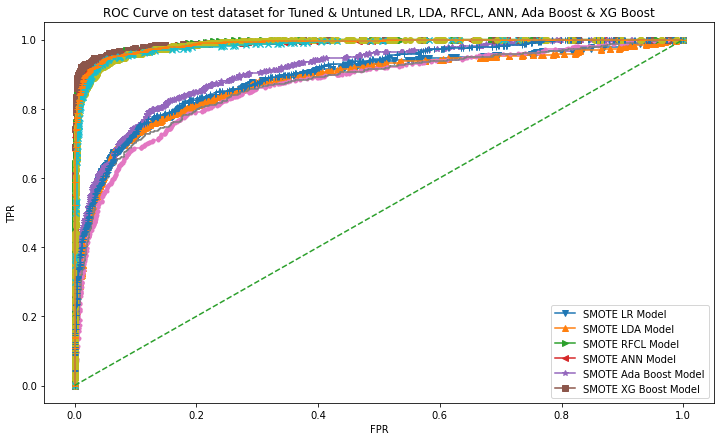

In [321]:
# ROC Curves for all un-tuned models on test dataset
# AUC Comparison
models=[lr_model_level_2 , lda_model_level_2, rfcl_model_level_2, mlp_model_level_2, adb_model_level_2, xgb_model_level_2,
       lr_smote , lda_smote, rfcl_smote, mlp_smote, adb_smote, xgb_smote,]

models_names={lr_model_level_2 : 'Tuned LR Model', lda_model_level_2 : 'Tuned LDA Model', 
              rfcl_model_level_2 : 'Tuned RFCL Model', mlp_model_level_2 : 'Tuned ANN Model', 
              adb_model_level_2 : 'Tuned Ada Boost Model', xgb_model_level_2 : 'Tuned XG Boost Model',
              lr_smote : 'SMOTE LR Model', lda_smote : 'SMOTE LDA Model', 
              rfcl_smote : 'SMOTE RFCL Model', mlp_smote : 'SMOTE ANN Model',
            adb_smote : 'SMOTE Ada Boost Model', xgb_smote : 'SMOTE XG Boost Model'}

plt.figure(figsize=(12,7))
lr_l2_test_fpr,lr_l2_test_tpr,lr_l2_test_thresholds = roc_curve(y_test, lr_l2_test_probs)
plt.plot(lr_l2_test_fpr,lr_l2_test_tpr,marker='v')

lda_l2_test_fpr,lda_l2_test_tpr,lda_l2_test_thresholds = roc_curve(y_test, lda_l2_test_probs)
plt.plot(lda_l2_test_fpr,lda_l2_test_tpr,marker='^')

rfcl_l2_test_fpr,rfcl_l2_test_tpr,rfcl_l2_test_thresholds = roc_curve(y_test, rfcl_l2_test_probs)
plt.plot(rfcl_l2_test_fpr,rfcl_l2_test_tpr,marker='>')

mlp_l2_test_fpr,mlp_l2_test_tpr,mlp_l2_test_thresholds = roc_curve(y_test, mlp_l2_test_probs)
plt.plot(mlp_l2_test_fpr,mlp_l2_test_tpr,marker='<')

adb_l2_test_fpr,adb_l2_test_tpr,adb_l2_test_thresholds = roc_curve(y_test, adb_l2_test_probs)
plt.plot(adb_l2_test_fpr,adb_l2_test_tpr,marker='*')

xgb_l2_test_fpr,xgb_l2_test_tpr,xgb_l2_test_thresholds = roc_curve(y_test, xgb_l2_test_probs)
plt.plot(xgb_l2_test_fpr,xgb_l2_test_tpr,marker='s')

lr_smote_test_fpr,lr_smote_test_tpr,lr_smote_test_thresholds = roc_curve(y_test, lr_smote_test_probs)
plt.plot(lr_smote_test_fpr,lr_smote_test_tpr,marker='.')

lda_smote_test_fpr,lda_smote_test_tpr,lda_smote_test_thresholds = roc_curve(y_test, lda_smote_test_probs)
plt.plot(lda_smote_test_fpr,lda_smote_test_tpr,marker=',')

rfcl_smote_test_fpr,rfcl_smote_test_tpr,rfcl_smote_test_thresholds = roc_curve(y_test, rfcl_smote_test_probs)
plt.plot(rfcl_smote_test_fpr,rfcl_smote_test_tpr,marker='o')

mlp_smote_test_fpr,mlp_smote_test_tpr,mlp_smote_test_thresholds = roc_curve(y_test, mlp_smote_test_probs)
plt.plot(mlp_smote_test_fpr,mlp_smote_test_tpr,marker='x')

adb_smote_test_fpr,adb_smote_test_tpr,adb_smote_test_thresholds = roc_curve(y_test, adb_smote_test_probs)
plt.plot(adb_smote_test_fpr,adb_smote_test_tpr,marker='+')

xgb_smote_test_fpr,xgb_smote_test_tpr,xgb_smote_test_thresholds = roc_curve(y_test, xgb_smote_test_probs)
plt.plot(xgb_smote_test_fpr,xgb_smote_test_tpr,marker='_')

plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC Curve on test dataset for {}'.format('Tuned & Untuned LR, LDA, RFCL, ANN, Ada Boost & XG Boost'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()


## The End